In [ ]:
#pip install -r requirements.txt

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import geopandas as gpd
from prince import mca
import prince 
import requests
import io
import importlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import StackingRegressor, RandomForestRegressor

In [236]:
from scripts import clean_data as cld
from scripts import imputation as ipt
from scripts import data_analysis as dtn
from scripts import stats_desc as std

In [144]:
file_path ="https://minio.lab.sspcloud.fr/emile/Deep_seas/20177113_DS_D3.1-SEAS2-dataset-2022_rev1.csv"
df = pd.read_csv(file_path, sep=';', encoding='utf-8', low_memory=False, na_values=" ", decimal=',')
df.describe() 


Respondent_Serial  INTRO_CATI  INTRO_CAWI          SD_1          SD_2  \
count       5.601400e+04      8810.0     47204.0  56014.000000  56014.000000   
mean        5.782639e+08         1.0         1.0      1.518781     41.056486   
std         1.637197e+09         0.0         0.0      0.501969     12.820770   
min         1.900000e+01         1.0         1.0      1.000000     18.000000   
25%         1.737850e+04         1.0         1.0      1.000000     30.000000   
50%         3.636400e+04         1.0         1.0      2.000000     41.000000   
75%         5.647075e+04         1.0         1.0      2.000000     52.000000   
max         7.600002e+09         1.0         1.0      3.000000     64.000000   

              QSD_2          SD_3      REG_CAT           REG     REG_quota  \
count  56014.000000  56014.000000  1516.000000  56014.000000  56014.000000   
mean       2.073624     16.854197     1.509235    297.832167   1668.286946   
std        0.872051     10.191840     0.982645    187.392295    997.947320   
min        1.000000      1.000000     1.000000      1.000000    101.000000   
25%        1.000000      8.000000     1.000000    114.000000    801.000000   
50%        2.000000     16.000000     1.000000    325.000000   1606.000000   
75%        3.000000     26.000000     2.000000    411.000000   2502.000000   
max        3.000000     43.000000     4.000000   1477.000000   3409.000000   

       ...     cbsqf_alc   c1cbsqf_alc      cRSOD_1a  SD_20_income_type  \
count  ...  55483.000000  55483.000000  47091.000000       47831.000000   
mean   ...    777.543117    763.731402    158.253150           0.280508   
std    ...   1922.011090   1740.420721    134.101578           0.449252   
min    ...     -1.000000     -1.000000      0.000000           0.000000   
25%    ...     27.625000     27.625000     48.500000           0.000000   
50%    ...    195.000000    195.000000    107.600000           0.000000   
75%    ...    727.420000    727.420000    246.400000           1.000000   
max    ...  63119.632500  18250.000000    400.000000           1.000000   

              SD_20        SD_20A        SD_20B        SD_20C    sd_20month  \
count  2.974800e+04  16068.000000  1.270800e+04  4.245600e+04  4.245600e+04   
mean   4.147129e+05   1811.889283  6.781278e+04  3.108782e+05  4.172756e+04   
std    1.872299e+06   3628.254842  1.784258e+05  1.578282e+06  1.432824e+05   
min    1.875000e+02      0.000000  1.875000e+02  1.875000e+02  1.250000e+02   
25%    2.000000e+03     79.000000  1.950500e+03  2.000000e+03  1.500042e+03   
50%    4.500000e+03    169.000000  5.250000e+03  4.500500e+03  3.000500e+03   
75%    3.000000e+04    338.000000  3.499950e+04  3.250050e+04  1.125000e+04   
max    1.656000e+07   9999.000000  1.500000e+06  1.656000e+07  1.380000e+06   

            inc_mth  
count  4.245600e+04  
mean   1.965886e+04  
std    8.073478e+04  
min    1.250000e+01  
25%    6.944444e+02  
50%    1.400000e+03  
75%    4.500000e+03  
max    1.380000e+06  

[8 rows x 186 columns]

In [145]:
df.shape

(56014, 191)

# Sommaire

* [**Partie I : Premier nettoyage**](#partie1)
* [**Partie II : Analyses et traitements**](#partie2)
    * [A. Statistiques descriptives](#partie2a)
    * [B. Imputation des données](#partie2b)
    * [C. Analyses factorielles (ACM & ACP)](#partie2c)
* [**Partie III : Modélisation**](#partie3)
* [**Annexes**](#annexes)

<a id="partie1"></a>
# Partie I : Premier nettoyage

**Sélection des variables**

In [146]:
variables = ["COUNTRY","SD_1", "SD_2", "SD_4","SD_6", "SD_7", 
             "SD_8","SD_9", "SD_10", "sd_20month" ,"social_class",
             "bsqf_alc", "f_1b", "RSOD_5a", "RSOD_5b", "RSOD_5c", "cbsqf_beer", "cbsqf_spir", "cbsqf_wine",
             "RSOD_5d", "RSOD_2b", "RSOD_7b", "CH_1", "WB_1", "WB_2", "WB_3"]
data = df[variables]

Explication de la sélection: Nous avons garder l'ensemble des variables qui faisaient sens du point de vue de la réponse à notre problématique.
La plupart des variables non sélectionnées sont redondantes avec celles ici,
(notamment des variables quantitatives qui avaient été recodées à partir des variables catégorielles que nous incluons ici).
Toutes les variables recueillant l'opinion des interrogés ont été exclues pour leur difficulté potentielle à être traiter, 
par exemple: AP_9: Printed warnings about alcohol-related harm should be displayed on alcohol packaging ? Strongly agree, somewhat agree,...


In [147]:
data.dtypes

COUNTRY           int64
SD_1              int64
SD_2              int64
SD_4              int64
SD_6              int64
SD_7            float64
SD_8              int64
SD_9              int64
SD_10             int64
sd_20month      float64
social_class      int64
bsqf_alc        float64
f_1b              int64
RSOD_5a         float64
RSOD_5b         float64
RSOD_5c         float64
cbsqf_beer      float64
cbsqf_spir      float64
cbsqf_wine      float64
RSOD_5d         float64
RSOD_2b         float64
RSOD_7b         float64
CH_1              int64
WB_1              int64
WB_2              int64
WB_3              int64
dtype: object

**Nettoyage de la base**

In [148]:
#Les pays de la base sont codés de 10 à 43, on les associe à leur nom via le dictionnaire country_mapping de clean_data
if pd.api.types.is_numeric_dtype(data['COUNTRY']):
    data['COUNTRY'] = data['COUNTRY'].map(cld.country_mapping)
else:
    print("Le mapping a déjà été effectué, on ne fait rien.") #Pour éviter de remplacer par NA si on exécute ce code 2 fois par erreur

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18672\1535886202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['COUNTRY'] = data['COUNTRY'].map(cld.country_mapping)


Le questionnaire de Deepseas précise que le salaire mensuel sd_20month a été fourni en monnaie locale par les répondants mais le code book ne précise pas si la variable a été remise dans la même unité monétaire ou non. Regardons la distribution des revenus par pays ci-dessous:

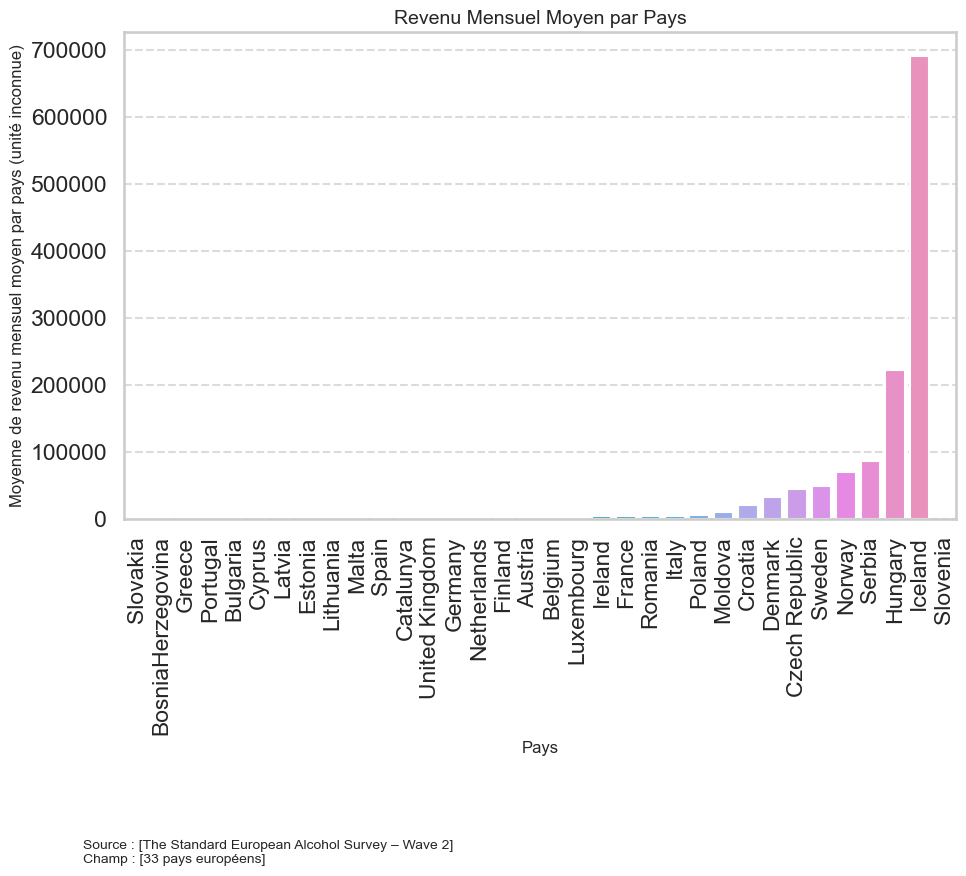

In [149]:
cld.barplot_bycntry(data)

La variable sd_20month du salaire mensuel est restée en monnaie local puisque les pays hors zone euro qui ont presque tous une monnaie plus faible que l'euro se retrouvent à avoir les salaires mensuels les plus élevés, alors que ce ne sont pas nécessairement ceux où le niveau de vie est le plus élevé. On notera que les valeurs manquent pour la Slovénie dû au fait que le questionnaire slovène n'a pas précisé si les répondants devaient donner leur salaire mensuel ou annuel, les sondeurs ont donc supprimer les données de salaire pour ce pays. 

Les entretients pour construire cette base de données ayant été menés en 2019 et 2020, nous choisissons de convertir tous les salaires en euros selon les valeurs publiées au journal officiel de l'Union Européenne pour le 2 janvier 2020. Cette date qui précède la crise Covid peut permettre d'éviter des erreurs d'interprétation des niveaux de vie, la crise Covid ayant fait significativement fluctuer les taux de change, faisant notamment s'apprécier l'euro par rapport à certaines monnaies début 2020 (couronne tchèque, islandaise, etc.).


In [150]:
# On crée une variable avec les taux de changes de 2020 
data['EXCHANGE_RATE_TO_EUR'] = data['COUNTRY'].map(cld.conversion_rates)

# On convertit la variable 'sd_20month'
data['sd_20month_EUR_2020'] = data['sd_20month'] * data['EXCHANGE_RATE_TO_EUR']

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18672\1698145111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EXCHANGE_RATE_TO_EUR'] = data['COUNTRY'].map(cld.conversion_rates)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18672\1698145111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sd_20month_EUR_2020'] = data['sd_20month'] * data['EXCHANGE_RATE_TO_EUR']


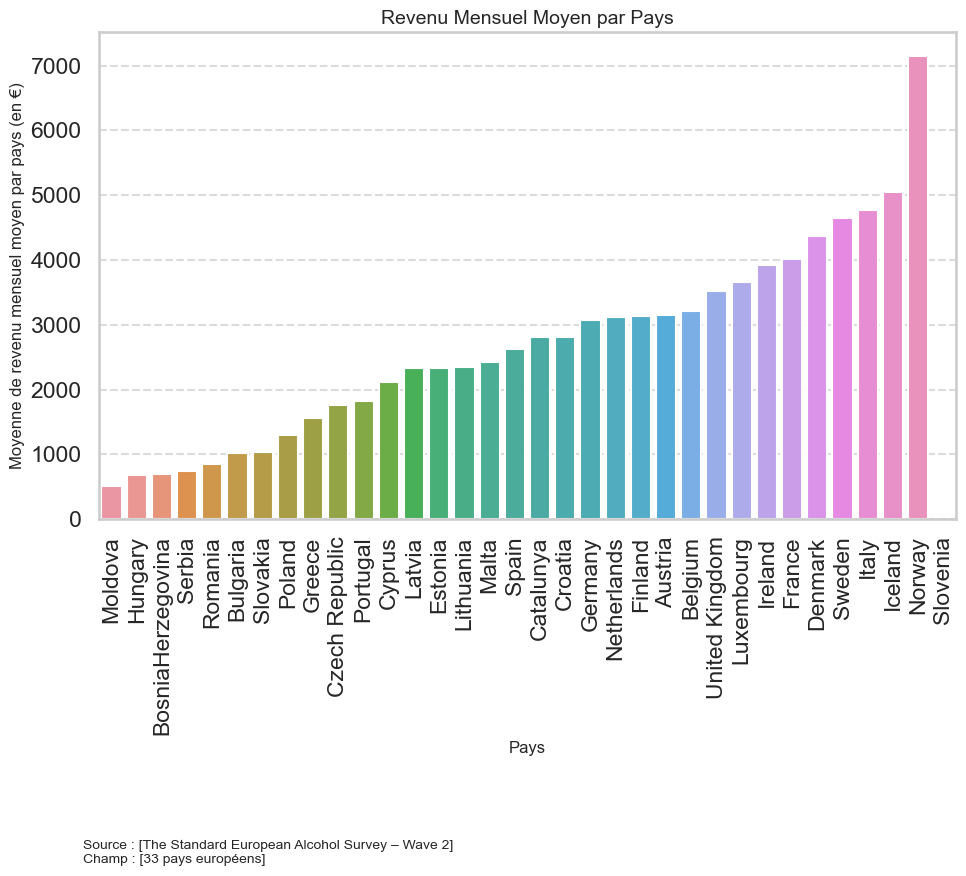

In [151]:
# Barplot des salaires mensuels moyens convertis en €
cld.barplot_bycntry(data, colonne_y='sd_20month_EUR_2020',y_name= "revenu mensuel moyen par pays (en €)")

On remarque que cette distribution des revenus n'est pas toujours cohérente avec la réalité des distributions moyennes de revenus entre les pays européens. Par exemple, le revenu moyen déclaré par les italiens interrogés est supérieur à celui des irlandais interrogés, ce qui n'est pas vrai dans la population totale. Cela témoigne soit d'un biais déclaratif plus élevé dans certains pays que d'autres, soit d'un biais de sélection du fait que les personnes interrogées dans certains pays (en Italie par exemple) font partie d'une partie plus favorisée économiquement de la population de leur pays que les individus interrogés dans d'autres pays (par exemple l'Irlande). Le cas échéant, cela signifie que les personnes interrogées ne sont pas équitablement répartis dans la distribution des revenus, dans certains pays du moins (ce que Kilian et Al. pointent du doigt dans leur papier "The socioeconomic profile of alcohol use in Europe: Findings
from a cross-sectional survey of 33 European countries" qui analyse Deepseas du point de vue européen).

NB: Les salaires extrêmement hauts de la Slovénie sont dû à un oubli de la part des sondeurs de préciser si le salaire était mensuel ou annuel dans les questions posées aux slovènes. On ne pourra donc pas utiliser ce pays pour notre étude.

On décide de créer également une nouvelle variable de salaire mensuel en euros PPA pour pouvoir comparer les pays selon leur pouvoir d'achat.
On liste ci-après les taux PPA donnés par Eurostat et la Banque Mondiale qui correspondent au Taux de change/ Indice des prix.

In [152]:
# Création d'un variable Valeurs brutes de parité (PPA) et conversion des salaires en euros PPA
data['PPA'] = data['COUNTRY'].map(cld.ppa_brut)
data['sd_20month_EUR_2020_PPA']= data['sd_20month'] / data['PPA']

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18672\581596296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PPA'] = data['COUNTRY'].map(cld.ppa_brut)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18672\581596296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sd_20month_EUR_2020_PPA']= data['sd_20month'] / data['PPA']


*Premier traitement des valeurs manquantes*

In [153]:
# Affiche le tableau des données manquantes par variable (en %)
stats_na = cld.tableau_na(data)
stats_na

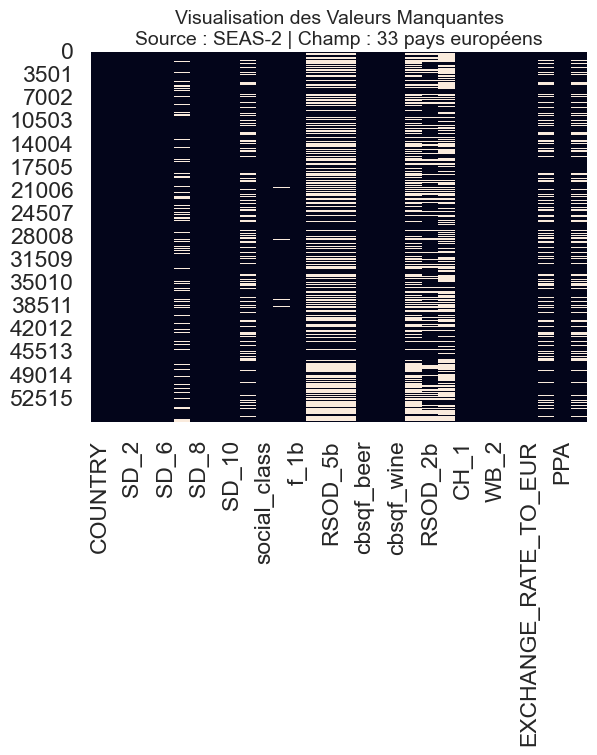

In [154]:
#version plus visuelle du tableau précédent
cld.visu_na(data)

Les variables présentant des valeurs manquantes dans des proportions potentiellement problématiques sont:
- SD_7: le nombre de mineur dans le foyer de l'individu (21% de NA)
- SD_20month : le revenu du ménage par mois (24% de NA)
- Demo_Empl: si temps partiel, temps plein ou autre (31% de NA)
- Les RSOD_5(a à d): les lieux de consommation d'alcool (46% de NA)
- RSOD_2b : Fréquence 4/6+ verres en nombre de jours par an (46% de NA) ;
- RSOD_7b : Fréquence 8/12+ verres en nombre de jours par an (50% de NA)

Nous les traiterons une par une par la suite.

*Traitement de bsqf_alc la consommation d'alcool pur par an et par individu en cl*

In [155]:
#pourcentages de valeurs manquantes pour la quantité d'alcool consommée dans les 12 derniers mois (en cl)
cld.tableau_na_pays(data, "bsqf_alc")

In [156]:
#Peu de valeurs manquantes dans la consommation d'alcool en cl d'alcool pur bsqf_alc (moins de 2% sauf Islande, Allemagne et Malte moins de 3.7%) 
# donc on peut supprimer les individus qui présentent des valeurs manquantes pour cette variable sans créer de biais de sélection.

data= data.dropna(subset=['bsqf_alc'])
sum(data['bsqf_alc'].isna())

0

*Les variables RSOD_5(a à d)*

In [157]:
variables = ['RSOD_5a', 'RSOD_5b', 'RSOD_5c', 'RSOD_5d']

#Pourcentage d'observations où TOUTES les variables RSOD_5(a à d) sont manquantes
pourcentage_observations_manquantes_communes = data[variables].isna().all(axis=1).mean()

print(f"Nombre d'observations où toutes les variables sont manquantes : {pourcentage_observations_manquantes_communes}")

Nombre d'observations où toutes les variables sont manquantes : 0.45266117549519674


Les valeurs manquantes des RSOD_5(a à d) sont les mêmes, donc quand on ne connaît pas la récurrence de consommation d'alcool dans un lieu, on ne la connaît pour aucun. Ces variables présentent un très grand pourcentage de valeurs manquantes (46%) et ne sont pas évoqués dans la littérature que nous avons étudié comme déterminant d'un profil de consommateur d'alcool, nous décidons de ne pas les compléter et d'étudier leur rôle seulement au travers de quelques statistiques descriptives par pays.

Puisque ces variables ne sont pas complémentaires en termes d'individus répondants, qu'il y a plus de 45% de valeurs manquantes et que nous ne les avons trouvé comme typiques de certains consommateurs d'alcool dans aucune étude que nous avons lues, nous décidons de ne pas les étudier et de les retirer de la base pour le traitement.

In [158]:
# Identification et suppression des colonnes RSOD_5(a à d)
cdrop = ["RSOD_5a", "RSOD_5b", "RSOD_5c", "RSOD_5d"]
data = data.drop(columns=cdrop)

print(f"Colonnes supprimées : {cdrop}")

Colonnes supprimées : ['RSOD_5a', 'RSOD_5b', 'RSOD_5c', 'RSOD_5d']


*Traitement de RSOD_2b et RSOD_7b*

Variables catégorielles, respectivement la fréquence de consommation d'alcool supérieure à 4/6 verres et supérieure 8/12 verres.

In [159]:
#regardons si, de façon cohérente, les valeurs manquantes de RSOD_2b sont incluses dans celles de RSOD_7b qui en a davantage

print(f"NA uniquement dans 2b: {(data['RSOD_2b'].isna() & data['RSOD_7b'].notna()).sum()}")
print(f"NA uniquement dans 7b: {(data['RSOD_2b'].notna() & data['RSOD_7b'].isna()).sum()}")

NA uniquement dans 2b: 0
NA uniquement dans 7b: 13000


Donc si des valeurs sont manquantes dans RSOD_2b elles le sont bien aussi dans RSOD_7b, donc les gens qui n'ont pas répondu à leur fréquence de consommation d'alcool de 4/6+ verres n'ont pas non plus répondu à celle de 8/12+ verres .

Les RSOD_2b/7b sont codées comme suit (d'après le code book):

Frequency of
drinking 4/6+ (resp. 8/12+ )
drinks
- 1 = Every day
- 2 = 5-6 days a week
- 3 = 3-4 days a week
- 4 = 1 - 2 days a week
- 5 = 2 - 3 days a month
- 6 = One day in a month
- 7 = 6 - 11 days a year
- 8 = 2 - 5 days a year
- 9 = a single day in the past 12 months
- 10 = I did not drink in the past 12 months



Comme RSOD_7b a 50% de valeurs manquantes, on décide de l'abandonner pour ne garder que RSOD_2b qui en a 27%. On retiendra que, même si RSOD_7b est inclus dans RSOD_2b, on perd tout de même un peu d'information sur les alcoolisations ponctuelles importantes.

In [160]:
# Identification et suppression de la colonne RSOD_7b
cdrop = ["RSOD_7b"]
data = data.drop(columns=cdrop)

In [161]:
#Problème: On a remarqué en ouvrant la base sur excel (ça n'est donc pas une erreur d'interprétation des séparateurs) qu'il y a à la fois des 0 et des NA pour ces variables
#Alors que ce sont des catégorielles sans catégories 0 D'APRES LE CODEBOOK
#Comptons le nombre de 0 et de valeurs manquantes pour RSOD_2b
print(f"nombre de d'individus ayant RSOD_2b = 0: {data.loc[data['RSOD_2b']==0,'RSOD_2b'].count()}",
f", nombre de valeurs manquantes pour RSOD_2b: {data['RSOD_2b'].isna().sum()}")

nombre de d'individus ayant RSOD_2b = 0: 5286 , nombre de valeurs manquantes pour RSOD_2b: 14650


In [162]:
# Le codebook pourrait-il se tromper ?
# Essayons de voir combien d'individus correspondent à chaque code catégoriel de 1 à 10 possible:
print(data['RSOD_2b'].value_counts(dropna=False).sort_index())

RSOD_2b
0.0     5286
1.0      939
2.0      963
3.0     2597
4.0     4244
5.0     5590
6.0     3055
7.0     4499
8.0     6383
9.0     7277
NaN    14650
Name: count, dtype: int64


Il n'y a pas d'observation codée 10, il est cohérent de penser que le code book contient une erreur et que c'est le code 0 qui correspond à "I did not drink in the past 12 months [4/6+ drinks]" et non pas le code 10. 
Pour le vérifier, on va essayer de voir si les individus codés 0 sont bien ceux codés 10 dans le code book et si les codes des autres catégories sont restés inchangés ou non. Pour cela, on utilise la variable de fréquence de consommation d'alcool f_1b qui n'est pas un excellent proxy de RSOD_2b la fréquence de consommation de plus de 4/6 verres mais qui est le meilleur que nous ayons.

Rappel:codage de f_1b

generic
frequency of
drinking
- 1 = Every day
- 2 = 5-6 days a week
- 3 = 3-4 days a week
- 4 = 1 - 2 days a week
- 5 = 2 - 3 days a month
- 6 = One day in a month
- 7 = 6 - 11 days a year
- 8 = 2 - 5 days a year
- 9 = a single day in the past 12 months
- 10 = I did not drink but I drank earlier
- 11 = I never drank in my life

In [163]:
#On regarde quelle est la distribution de la variable f_1b
print(data['f_1b'].value_counts(dropna=False).sort_index())

f_1b
1      3703
2      4461
3      5614
4     13722
5      8881
6      3581
7      4341
8      4583
9      1311
10     2399
11     2887
Name: count, dtype: int64


In [164]:
print(f"Le nombre d'individus où RSOD_2b=0 et f_1b=10 ou 11 est : {data.loc[(data['RSOD_2b']==0) & ((data['f_1b'] == 10) |  (data['f_1b'] == 11)), 'RSOD_2b'].count()}",
f", Le nombre d'individus ou RSOD_2b=0 est {data['RSOD_2b'].value_counts(dropna=False)[0]}")

Le nombre d'individus où RSOD_2b=0 et f_1b=10 ou 11 est : 5286 , Le nombre d'individus ou RSOD_2b=0 est 5286


Les individus ayant n'ayant jamais consommé d'alcool dans les 12 derniers mois ou durant toute leur vie (catégorie 10 et 11 de f_1b) sont biens les mêmes qui ont RSOD_2b=0.
Le code 10 est bien devenu 0.

Pour vérifier la concordance des codes 1 à 9 avec les labels du codebook, on crée une table de contingence entre RSOD_2b et f_1b.

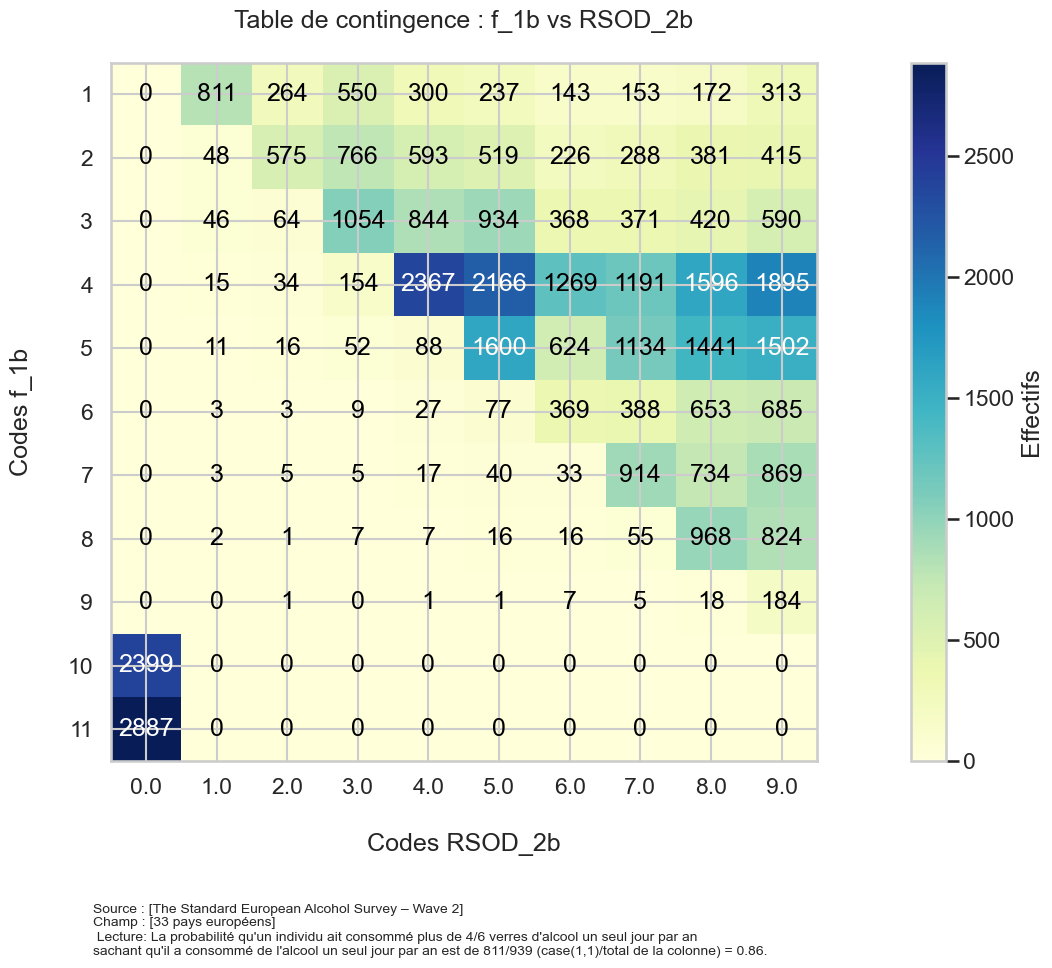

In [173]:
# Table de contingence de la fréquance générique de consommation d'alcool 
# et de la fréquence de + de 4 verres
#NB: On est obligé de remplacer les RSOD_2b manquants par 0, ce qui est une limite à notre analyse
cld.trace_table_contingence(data)


Exemple d'interprétation: Tous les individus qui n'ont jamais consommé d'alcool dans leur vie ou durant les 12 derniers mois (f1_b=10 (2399 individus) ou 11(2887 individus)) n'ont jamais consommé plus de 4/6 verres d'alcool dans les 12 derniers mois. On valide de nouveau notre labelisation 0 = I did not drink in the past 12 month.


Puisque les codes 1 à 9 ont les mêmes labels pour les variables RSOD_2b et f_1b et que la diagonale de la table de contingence contient globalement dans les effectifs les plus élevés, en supposant une corrélation significative entre ces deux variables, on peut conclure que l'ordre  pas été décallé par rapport au codebook (hormis 10 évidemment). Si les codes avaient été décalés (par exemple si le 1 était devenu 2), nous verrions un décalage systématique de la diagonale, ce qui n'est pas le cas ici.

NB: On notera qu'on a remplacé les RSOD_2b manquants par 0 pour construire cette table ce qui est une légère limite à cette analyse.

Cela nous permet de confirmer assez sûrement l'hypothèse suivante:
La bonne distribution de RSOD_2b est:
Frequency of
drinking 4/6+ (resp. 8/12+ )
drinks
- 0 = I did not drink in the past 12 months
- 1 = Every day
- 2 = 5-6 days a week
- 3 = 3-4 days a week
- 4 = 1 - 2 days a week
- 5 = 2 - 3 days a month
- 6 = One day in a month
- 7 = 6 - 11 days a year
- 8 = 2 - 5 days a year
- 9 = a single day in the past 12 months


On peut par ailleurs utiliser cette table pour faire quelques commentaires sur la distribution statistique de RSOD_2b:


1. Dans nos deux échelles, plus le chiffre est petit, plus la fréquence est élevée (1 = tous les jours, 9 = 1 jour par an).

Or, on voit qu'il n'y a quasiment aucune observation dans la zone "sud-ouest" du tableau.

Ce qui est bon car cela signifie que personne n'a une fréquence de "forte consommation" (RSOD_2b) supérieure à sa fréquence de "consommation générale" (f_1b).Par exemple, personne n'est codé f_1b =4 (boit 1-2 fois/semaine) tout en étant RSOD_2b = 1 (boit 4/6+ verres tous les jours). C'est logiquement impossible, et la base respecte cela.

2. La distribution des "Binge Drinkers" (def: alcoolisation ponctuelle importante dans un temps très court, avec recherche d’ivresse)

Les points les plus denses pour les codes 1 à 9 se situent sur la diagonale ou légèrement à droite de celle-ci.

Exemple sur la ligne 4 (f_1b) : Le pic est au croisement avec la colonne 4 de RSOD_2b. Cela indique que les gens qui boivent 1 à 2 jours par semaine boivent souvent 4/6+ verres à chaque fois qu'ils consomment.

3. Les lignes 4 et 5 sont plus foncées:

Cela signifie que les consommateurs "intermédiaires" en terme de fréquence de consommation (entre 2 jours par semaine et deux jours par mois), consomment des quantités importantes d'alcool moins réguliérement que leur fréquence générale de consommation. Comme les effectifs sont relativement proches pour ces lignes, ces consommateurs intermédiaires ont des profils très hétérogènes dans leur attitude de "binge drinking", presque autant la pratiquent 2 à 3 fois par mois (2166 individus) que une fois par an (1895).

In [174]:
# On compte les NA
print(f"Nombre de NA dans RSOD_2b : {data['RSOD_2b'].isna().sum()}")

Nombre de NA dans RSOD_2b : 14650


Avant de traiter ces valeurs manquantes, nous regardons si les répondants diffèrent selon s'ils ont répondu ou non à la question sur leur consommation excessive d'alcool.

In [175]:
#création d'une variable valant 1 si RSOD_2b est manquante et 0 sinon
data['RSOD_2bisna'] = data['RSOD_2b'].isna().astype(int)

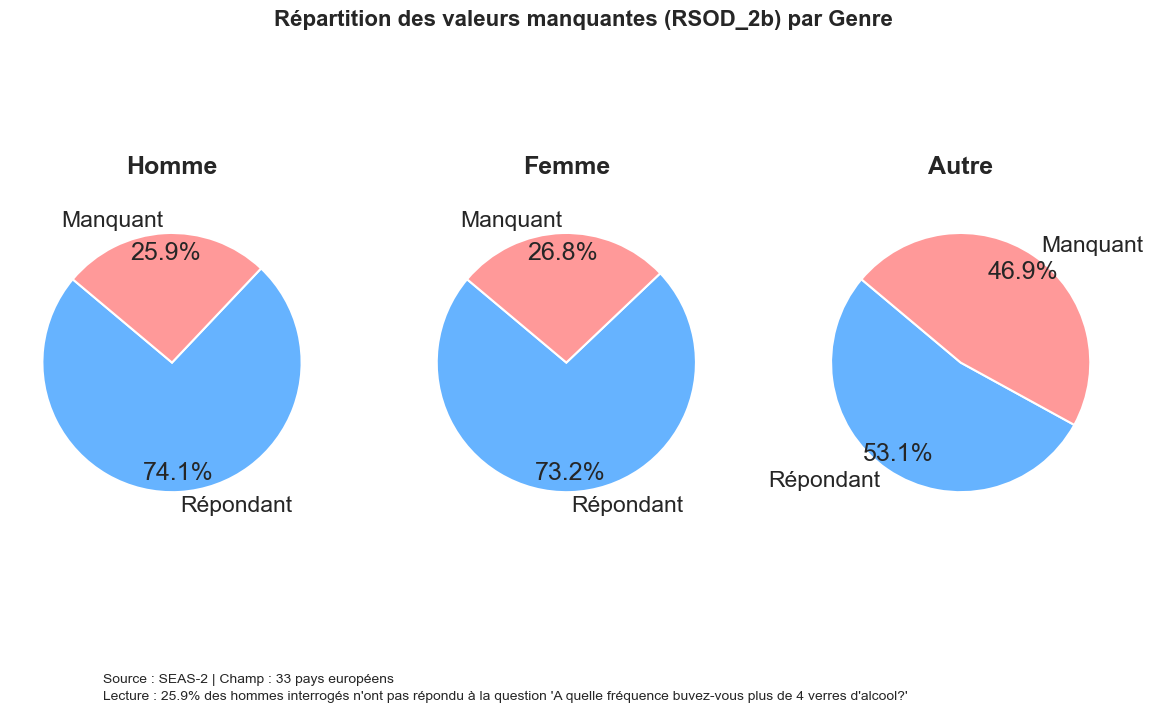

In [176]:
# Diagrammes circulaires des parts de valeurs manquantes pour RSOD_2b selon le genre

labels_sexe = {1.0: "Homme", 2.0: "Femme", 3.0: "Autre"}
source_sexe = "Source : SEAS-2 | Champ : 33 pays européens\nLecture : 25.9% des hommes interrogés n'ont pas répondu à la question 'A quelle fréquence buvez-vous plus de 4 verres d'alcool?'"

cld.trace_camemberts_na(data, var_na='RSOD_2bisna', var_groupe='SD_1', 
                         dict_labels=labels_sexe, 
                         titre_general="Répartition des valeurs manquantes (RSOD_2b) par Genre",
                         source_texte=source_sexe)

On remarque que les personnes ne se déclarant ni homme, ni femme répondent presque deux fois moins à la question sur leur consommation ponctuelle excessive d'alcool. Les interrogés se déclarant comme homme ou femmme répondent dans les mêmes proportion (~26%).
On peut l'interpréter de deux manières: 
- soit certaines personnes sont réticentes à dévoiler toute sorte d'information, que ce soit le genre ou la consommation excessive d'alcool;
- soit les personnes qui négligent le questionnaire négligent en particulier ces deux questions;
- soit les personnes ne s'identifiant à aucun genre sont plus réticent à dévoiler leur consommation d'alcool.
DANGEREUX REVOIR

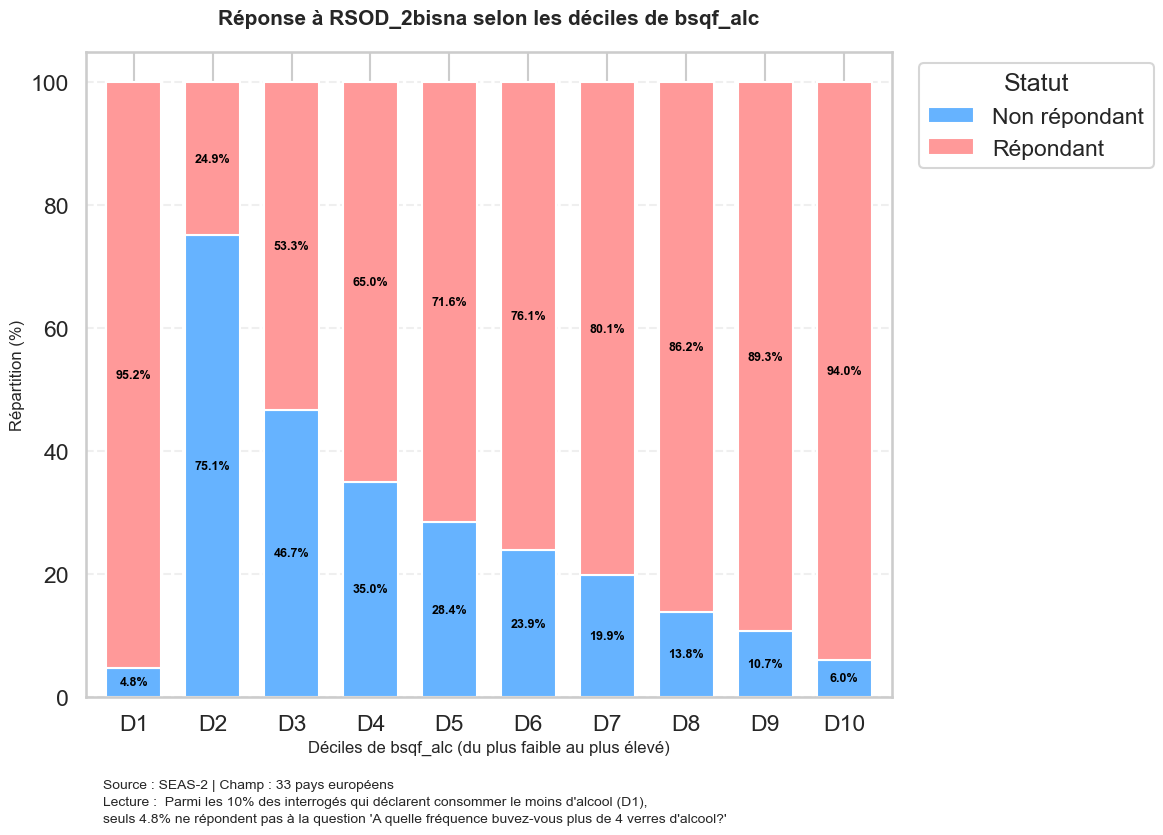

In [223]:
# source et lecture spécifique
lecture = ("Source : SEAS-2 | Champ : 33 pays européens\n"
           "Lecture :  Parmi les 10% des interrogés qui déclarent consommer le moins d'alcool (D1),\n"
    "seuls 4.8% ne répondent pas à la question 'A quelle fréquence buvez-vous plus de 4 verres d'alcool?'")

# Crée barres empilées avec le % de répondants à la fréquence de consommation excessive d'alcool (4 verres et +) par déciles de la distribution de consommation d'alcool 
cld.trace_barplot_na(data, var_quanti='bsqf_alc', var_na='RSOD_2bisna', source_texte=lecture)

In [178]:
seuils = data['bsqf_alc'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(seuils)

0.1       1.375
0.2      18.910
0.3      53.000
0.4     117.900
0.5     216.750
0.6     370.510
0.7     612.000
0.8    1061.150
0.9    2206.948
Name: bsqf_alc, dtype: float64


Relation en "U inversé" pour la non-réponse:
On observe que la part des "Non-répondants" (en bleu) n'est pas distribuée de manière uniforme :

Aux extrémités (D1 et D10) : Le taux de réponse est maximal. Les personnes qui consomment pas ou très peu d'alcool ou beaucoup répondent presque toutes à la question RSOD_2b.

On observe un pic de non-réponse, culminant à 75.1% pour le décile 2 et 46.7% pour le décile 3.

Proposition d'interprétation: (observation difficilement interprétable)

L'hypothèse explicative pourrait être que les gros consommateurs répondent plus facilement car ils identifient clairement ce comportement dans leur quotidien et sont donc plus enclins à déclarer une fréquence, même si elle est élevée. Et inversement pour les faibles consommateurs. 
Pour les très faibles consommateurs du 1er décile, ils consomment moins de 1.375 cl d'alcool par an, et savent donc qu'ils n'ont jamais consommé plus de 4 verres soit 40/7.89= 5 cl d'alcool. 

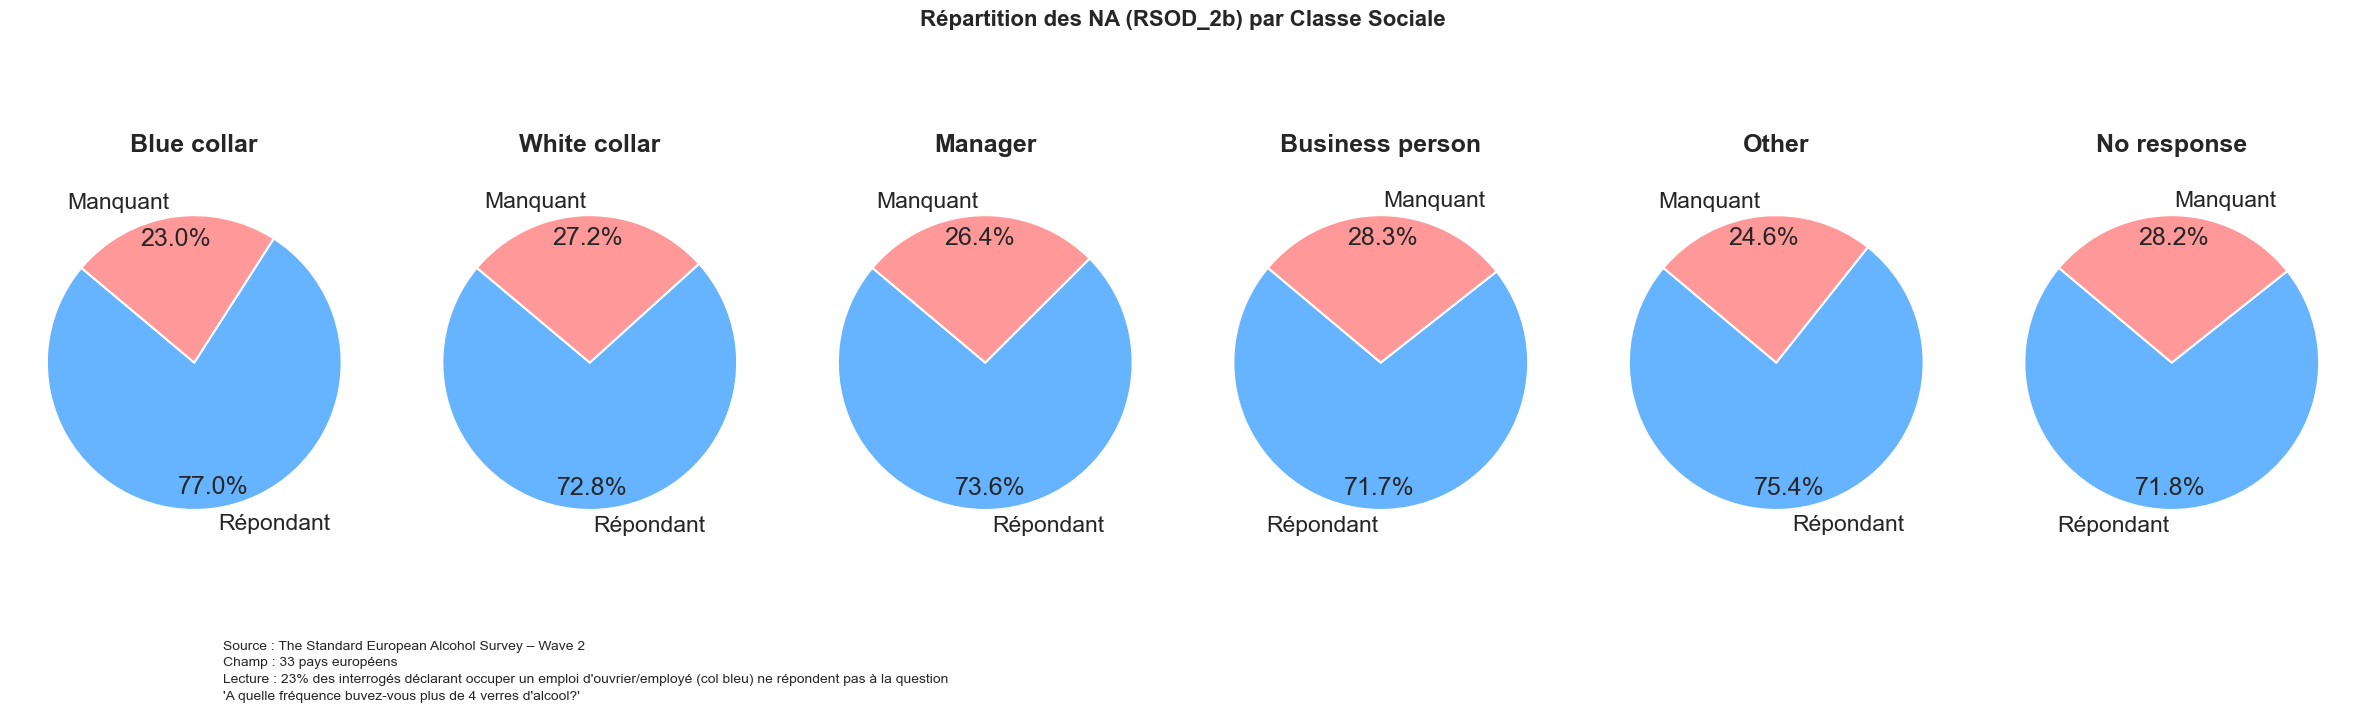

In [179]:
labels_social = {1.0: "Blue collar", 2.0: "White collar", 3.0: "Manager", 
                 4.0: "Business person", 5.0: "Other", 9.0: "No response"}
source_social = (
    "Source : The Standard European Alcohol Survey – Wave 2\n"
    "Champ : 33 pays européens\n"
    "Lecture : 23% des interrogés déclarant occuper un emploi d'ouvrier/employé (col bleu) ne répondent pas à la question\n"
    "'A quelle fréquence buvez-vous plus de 4 verres d'alcool?'"
)
cld.trace_camemberts_na(data, var_na='RSOD_2bisna', var_groupe='social_class', 
                         dict_labels=labels_social, 
                         titre_general="Répartition des NA (RSOD_2b) par Classe Sociale",
                         source_texte=source_social)

On observe pas de différence significative dans les taux de non réponse pour RSOD_2b entre les différentes classes sociales.
Une séquence de diagrammes circulaires l'illustre en annexe

In [180]:
# Ratio de valeurs manquantes par pays pour RSOD_2b
cld.tableau_na_pays(data, var="RSOD_2b")

Le pourcentage de valeurs manquantes pour RSOD_2b varie aussi selon les pays allant de  0.11 pour la Bulgarie à 0.71 pour Chypre. On notera que ces pays ont respectivement la plus forte et la plus faible consommation moyenne d'alcool en cl parmi les pays de la base. De manière générale, les pays qui consomment en moyenne le moins d'alcool ont aussi les plus hauts taux de non réponses et inversement.

Les personnes ayant RSOD_2b en valeur manquante ont donc bien un profil particulier, notamment en ce qui concerne leur consommation d'alcool. Les personnes qui consomment le moins d'alcool, répondent moins souvent à leur fréquence de consommation excessive. Ces valeurs manquantes engendrent donc un biais de sélection qu'il faudra prendre en compte dans nos interprétation. Ce qui est rassurrant pour notre analyse par pays, c'est que les pays qui consomment en moyenne le moins d'alcool ont bien aussi les plus hauts taux de non réponses et inversement. Si la baisse de la consommation de toute la population est proportionnelle à la hausse du nombre de valeur manquante, on peut se dire que le biais engendré sera environ le même peu importe les pays, ce qui pourrait ne pas trop impacter la comparaison entre pays.

*RSOD_2b - premiers traitement des valeurs manquantes*

Pour gérer les valeurs manquantes de RSOD_2b, on décide d'utiliser les variables de fréquence de consommation d'alcool par an (rf_1b) et de quantité consommée en gramme d'alcool pur (bsqf_alc).
Nous choisirons, comme les auteurs de la base le font dans leur conversions (cf. document "database guidelines" du github), de considérer qu'un verre d'alcool représente en moyenne 10 grammes d'alcool pur. 



Algorithme naïf :

0.  On prend toutes les valeurs manquantes de RSOD_2b
1.  diviser bsqf par masse volumique de l'alcool 0.789 kg/L
2.  diviser cela par rf_1b (recodé en quantitive en jour de consommation d'alcool par an)= on obtient la consommation moyenne en gramme d'alcool par jour où on a consommé de l'alcool sur l'année passée
3.  si celle-ci est inférieure à 40g (c'est à dire 4 verres), on met RSOD_2b = 0, sinon on met RSOD_2b= même valeur que fréquence générique rf1_b

On ne peut pas appliquer cet algorithme naïf qui réduirait la variance de consommation d'alcool des individus ayant une valeur manquante pour RSOD_2b à zéro.
Cependant, il y a deux cas de valeurs manquantes que l'on peut traiter facilement:
1) les individus qui ont consommé moins de 40g (soit 4 verres) d'alcool pur dans l'année et auxquels on peut attribuer RSOD_2b=0;
2) les individus qui ont consommé une seule fois par an plus de 40g d'alcool pur auxquels on peut attribuer RSOD_2b=9;

Pour le reste des valeurs manquantes sur cette variable, nous utiliserons la méthode d'imputation par "le plus proche voisin" après avoir sélectionner nos pays d'intérêt.

In [181]:
# 1
# On regarde le nombre d'individu qui consomme moins de 40g par an soit 4 verre d'alcool selon notre critère de conversion, 
# ceux là sont forcément dans la catégorie 0 de RSOD_2b

print(len(data.loc[data['RSOD_2b'].isna() & (data['bsqf_alc'] < 40/7.89)])) # On divise par la masse volumique de l'alcool pur en gramme/cl car bsqf_alc est en cl

#On remplace ces valeurs manquantes de RSOD_2b par 0 
data['RSOD_2b'] =data['RSOD_2b'].copy()
data.loc[data['RSOD_2b'].isna() & (data['bsqf_alc'] < 40/7.89),'RSOD_2b'] = 0

1591


In [182]:
#2
print(len(data.loc[data['RSOD_2b'].isna() & (data['bsqf_alc'] > 40/7.89) & (data['f_1b']==9)]))
data.loc[data['RSOD_2b'].isna() & (data['bsqf_alc'] > 40/7.89) & (data['f_1b']==9),'RSOD_2b'] = 9

146


*SD_7 et Demo_Empl*


Les valeurs manquantes des variables SD_7  (nombre d'enfant mineur dans le ménage) et Demo_Empl (Temps plein, temps partiel ou autre) seront traités par pays si des relations intéressantes sont trouvées sur les statistiques descriptives nationales concernant celles-ci. Elles ne sont pas évoquées comme majeures dans la détermination de la consommation d'alcool par la littérature. 

In [183]:
#distribution du nombre de mineur par foyer
cld.afficher_tableau_distribution(data, "Environ 24 000 interrogés, soit 55.2% des interrogés vivent dans un foyer où n'habite aucun mineur.")


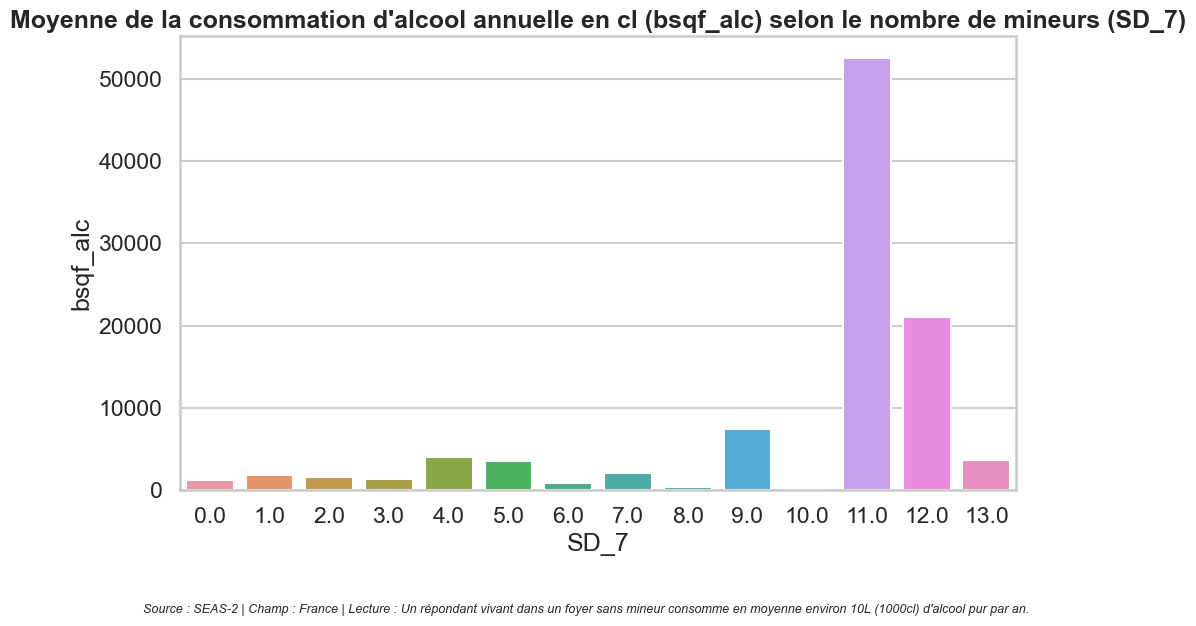

In [184]:
# Barplot de la consommation d'alcool moyenne annuel par individus ayant le même nombre de mineur dans leur foyer
cld.tracer_barplot_vsbscqf(data, "Un répondant vivant dans un foyer sans mineur consomme en moyenne environ 10L (1000cl) d'alcool pur par an.", var_x="SD_7", var_y="bsqf_alc")

On remarque qu'il y a une assez forte variation de la consommation d'alcool selon le nombre de mineur dans le foyer. Les personnes qui ont un mineur dans leur foyer (y compris eux), parmi les répondants, consomment en moyenne plus d'une fois et demi plus que ceux qui n'ont pas de mineur dans leur foyer.  On remarquera qu'il n'est pas pertinent de prendre en compte les individus déclarant avoir plus de 6 enfants dans leurs foyers, qui sont trop peu nombreux et contiennent des outliers en termes de consommateurs d'alcool. 
Néanmoins on retiendra qu'il est intéressant de traiter les valeurs manquantes pour cette variable pour l'étudier, ce que l'on fera par la suite.
Encore une fois, une partie de l'effet constaté peut être dû à un biais de sélection sur les répondants/non répondants à SD_7, mais on suppose que cela ne crée pas tout l'effet.

*sd_20month - salaire mensuel*

Il est important de traiter le cas de la variable salaire sd_20month, car les facteurs économiques jouent, selon la littérature, un rôle important dans la consommation d'alcool (les plus favorisés auraient notamment tendance à consommer plus régulièrement de l'alcool mais en moins grande quantité). Le salaire étant la seule variable quantitative indiquant la situation économique des individus que nous ayont, nous devons traiter le problème de valeur manquante sur cette variable.

In [185]:
missing_by_country = data.groupby('COUNTRY').apply(lambda x: x.isna().mean()) #on le remet car data a changé 
missing_by_country['sd_20month']
observation_count = data.groupby('COUNTRY').size()

# Ajouter le nombre d'observation par pays
missing_by_country['Observation_Count'] = observation_count

print(missing_by_country.loc[:, ["sd_20month", "Observation_Count"]])

                   sd_20month  Observation_Count
COUNTRY                                         
Austria              0.262257               3039
Belgium              0.251678               1490
BosniaHerzegovina    0.146015               1493
Bulgaria             0.208139               2998
Catalunya            0.295728               1498
Croatia              0.223632               1498
Cyprus               0.156691               1487
Czech Republic       0.168343               1491
Denmark              0.245198               1562
Estonia              0.524476               2145
Finland              0.166334               1503
France               0.128725               1678
Germany              0.153220               1475
Greece               0.230263               1520
Hungary              0.174987               1983
Iceland              0.094810               1445
Ireland              0.215962               1491
Italy                0.210280               1498
Latvia              

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18672\1508566044.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = data.groupby('COUNTRY').apply(lambda x: x.isna().mean()) #on le remet car data a changé


In [186]:
# 1.Voir combien de personnes ont été interrogées par pays
display(cld.tableau_effectifs_pays(data))

# 2. Voir le taux de non-réponse au revenu (sd_20month)
display(cld.tableau_na_pays(data, var="sd_20month"))

Tous les pays ont un nombre conséquent d'observations (+de 1400). Nous obtiendrions donc des résultats statistiquements significatifs avec l'étude de chacun d'eux, ça n'est donc pas un critère pour sélectionner quel pays nous allons étudier.
Ils ont cependant des ratio de valeurs manquantes différents pour la variable salaire mensuelle sd_month, ce qui représentera un critère de sélection.
L'imputation des valeurs manquantes par sera ensuite faite seulement pour les pays sélectionnés.

**Choix des pays à étudier**

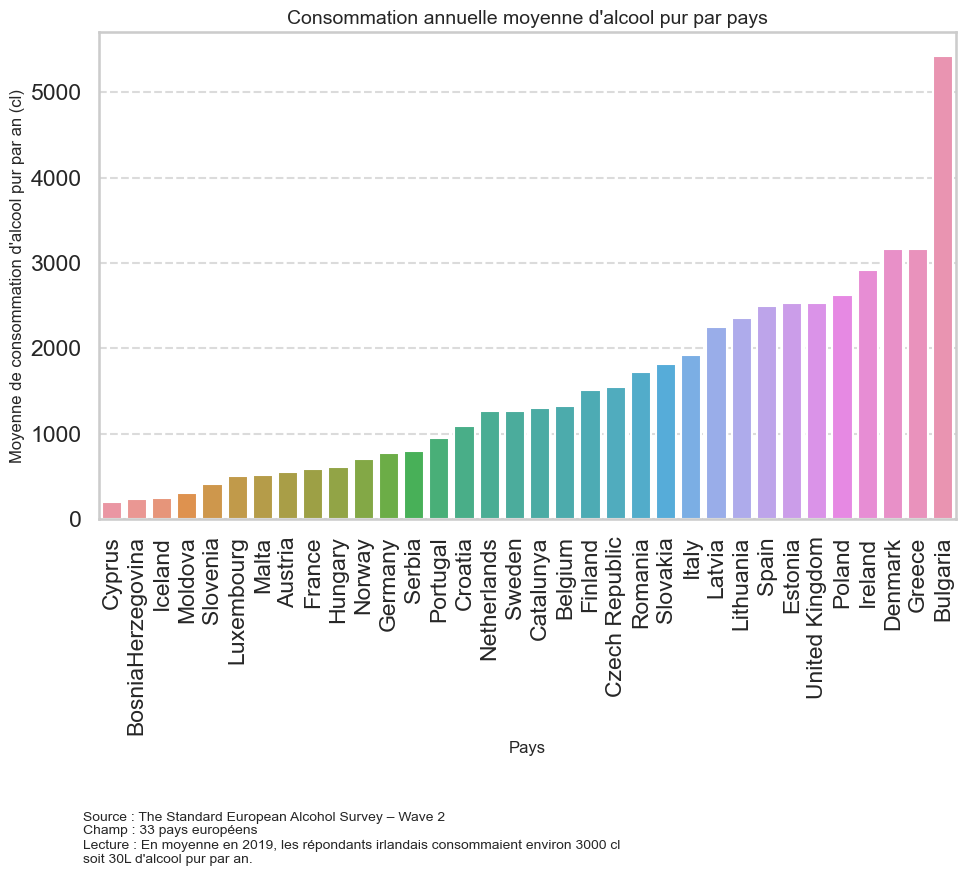

In [187]:
#diagramme de la moyenne de consommation d'alcool par pays (en cl d'alcool pur par an)
# lecture spécifique pour ce graphique
note_lecture = (
    "Source : The Standard European Alcohol Survey – Wave 2\n"
    "Champ : 33 pays européens\n"
    "Lecture : En moyenne en 2019, les répondants irlandais consommaient environ 3000 cl\n"
    "soit 30L d'alcool pur par an."
)

# Appel de la fonction 
cld.barplot_bycntry(
    data, 
    colonne_y='bsqf_alc', 
    y_name="consommation d'alcool pur par an (cl)", 
    titre="Consommation annuelle moyenne d'alcool pur par pays",
    source = note_lecture
)

On notera que la consommation bulgare devra être étudiée en détail du fait de la très grande différence en consommation absolue par rapport aux autres pays. Nous avons choisi de prendre la version non capée de bsqf_alc, il s'agira donc de voir si certains outliers ne tirent pas la consommation moyenne vers le haut.

In [188]:
#URL du GeoJSON - fond de carte europe
url = "https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson"

try:
    response = requests.get(url)
    #on lit le contenu JSON
    world = gpd.read_file(io.StringIO(response.text))
except Exception as e:
    print(f"Erreur : {e}")


world.columns = [c.upper() for c in world.columns]
europe = world[world['CONTINENT'] == 'Europe'].copy() # Filtrer l'Europe

# Fusion fond de carte/ données
# On associe les COUNTRY de notre dataset aux NAME de Geojson
map_data = europe.merge(pd.DataFrame(data), left_on='NAME', right_on='COUNTRY', how='left')

europe = europe.set_geometry('GEOMETRY')

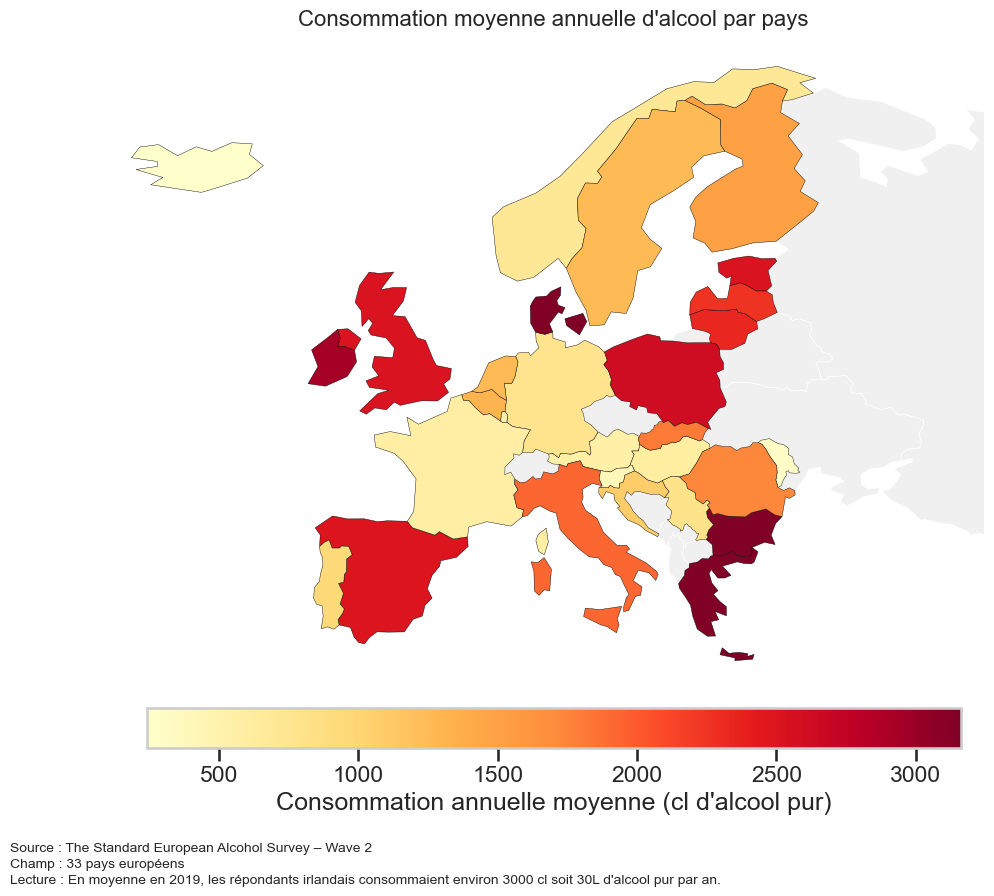

In [189]:
# --- CARTE 1 : ALCOOL ---
texte_alc = (
    "Source : The Standard European Alcohol Survey – Wave 2\n"
    "Champ : 33 pays européens\n"
    "Lecture : En moyenne en 2019, les répondants irlandais consommaient environ 3000 cl soit 30L d'alcool pur par an."
)
cld.trace_carte_europe(data, europe, 'bsqf_alc', 
                        "Consommation moyenne annuelle d'alcool par pays", 
                        "Consommation annuelle moyenne (cl d'alcool pur)", texte_alc)



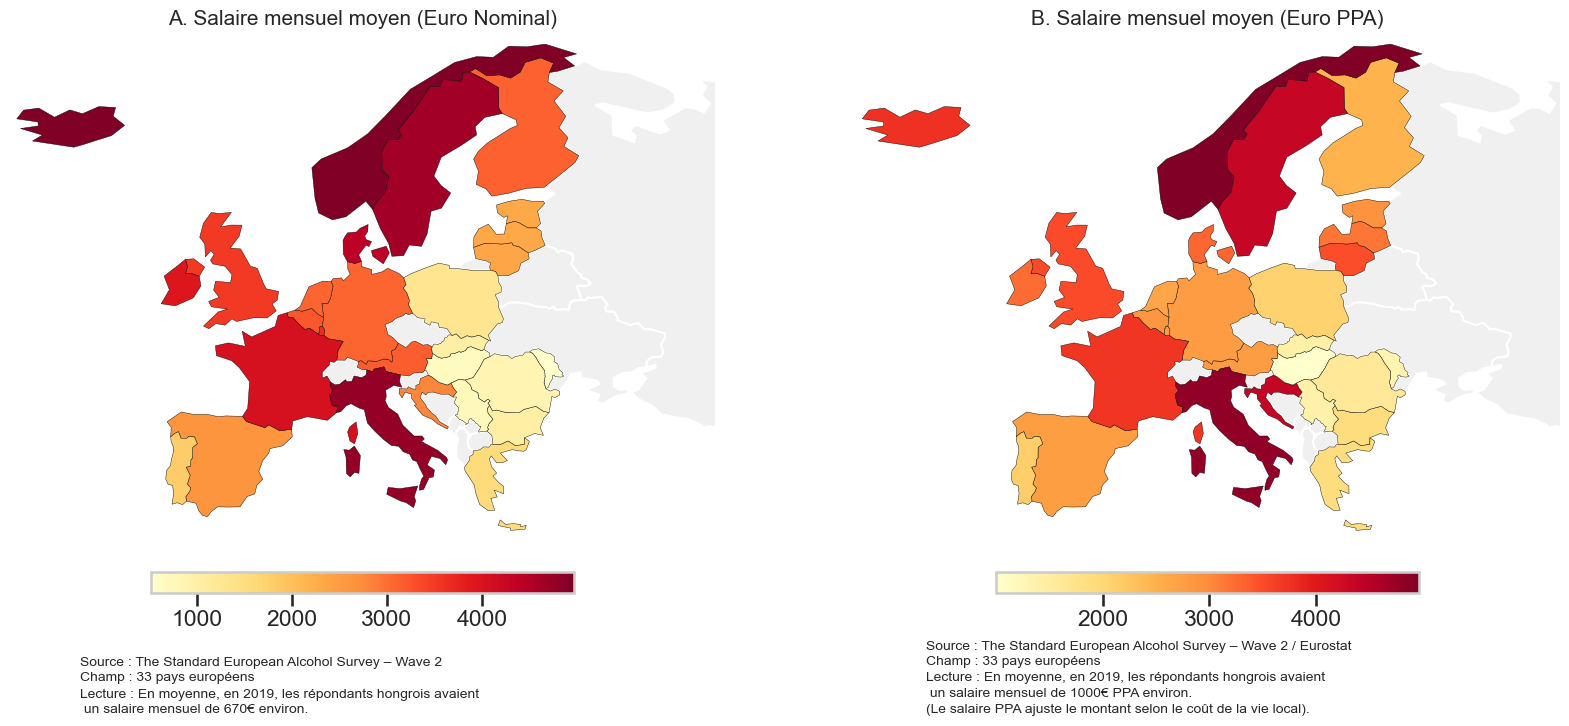

In [ ]:
# CARTE COMPARATIVE PPA vs nomial
txt_a = (
    "Source : The Standard European Alcohol Survey – Wave 2\n"
    "Champ : 33 pays européens\n"
    "Lecture : En moyenne, en 2019, les répondants hongrois avaient\n un salaire mensuel de 670€ environ."
)
txt_b = (
    "Source : The Standard European Alcohol Survey – Wave 2 / Eurostat\n"
    "Champ : 33 pays européens\n"
    "Lecture : En moyenne, en 2019, les répondants hongrois avaient\n un salaire mensuel de 1000€ PPA environ.\n(Le salaire PPA ajuste le montant selon le coût de la vie local)."
)
cld.compare_cartes_ppa(data, europe, 'sd_20month_EUR_2020', 'sd_20month_EUR_2020_PPA', txt_a, txt_b)

Il y a peu de différence entre la distribution des salaires par pays en nominal et en PPA (notamment dû au large gradient de couleur qui rend moins importantes des variations de quelques centaines d'euros). La hiérarchie semble néanmoins rester la même, on utilisera donc l'une ou l'autre des unités indifféremment pour comparer les pays (en l'occurence pour nous l'euro nominal).

In [199]:
data_na = data.copy()
data_na['sd_20month_EUR_2020'] = data_na['sd_20month_EUR_2020'].isna()
data_na['RSOD_2b'] = data_na['RSOD_2b'].isna()

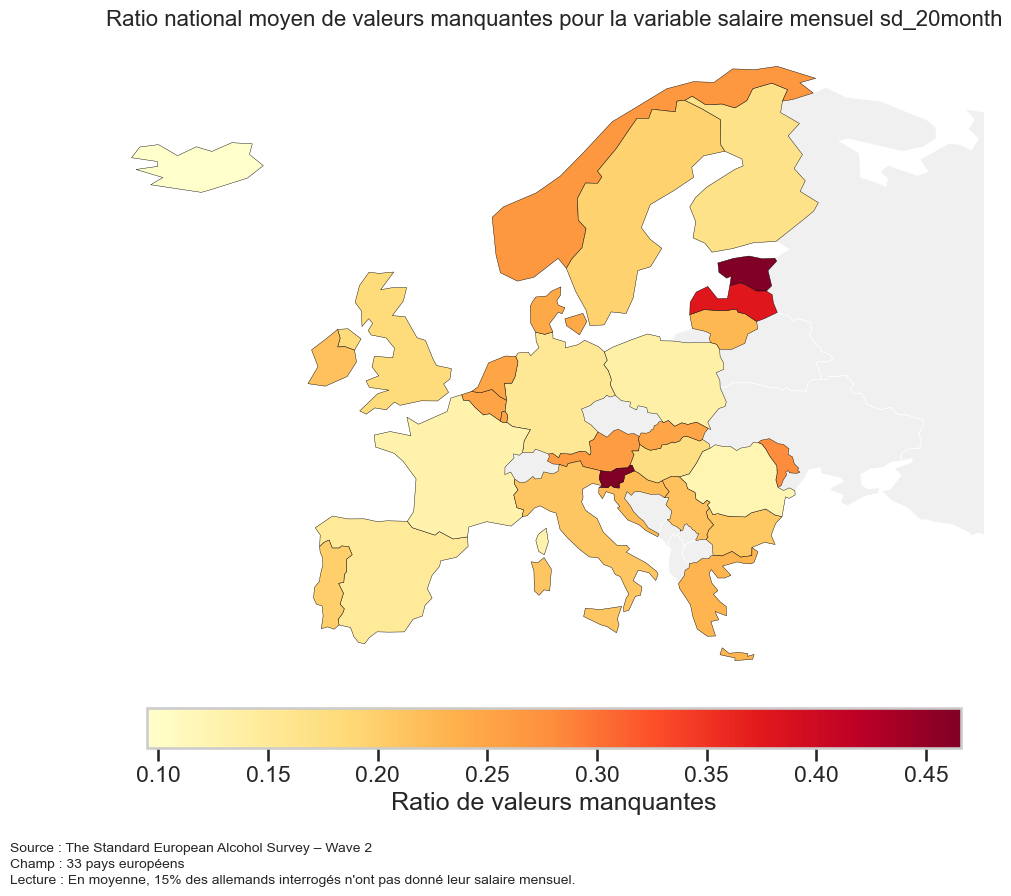

In [200]:
# CARTE 4 : VALEURS MANQUANTES (NA) 
texte_na = (
    "Source : The Standard European Alcohol Survey – Wave 2\n"
    "Champ : 33 pays européens\n"
    "Lecture : En moyenne, 15% des allemands interrogés n'ont pas donné leur salaire mensuel."
)

cld.trace_carte_europe(
    data=data_na, # On utilise ici le dataframe des moyennes de NA
    europe=europe, 
    colonne='sd_20month_EUR_2020', 
    titre="Ratio national moyen de valeurs manquantes pour la variable salaire mensuel sd_20month", 
    label_legende="Ratio de valeurs manquantes", 
    texte_info=texte_na
)

On veut étudier des pays culturellement et économiquement suffisamment différents, pour voir s'il s'en dégagent aussi des profils de consommateurs d'alcool différents.
On essaye donc de choisir au moins un pays où, dans nos données, 
1. la consommation d'alcool moyenne:
    -  est faible (France, Allemagne, Autriche, Islande, Chypre,etc.);
    -  est élevée voire très élevée (Pologne, UK, Irlande, Grèce, Bulgarie, Estonie, Espagne,etc.);
2. les salaires sont en moyenne:
    - élevés (Islande, Suède, Norvège,Irlande)
    - intermédiaires (France, Allemagne, Finlande, Pays- Bas, etc.)
    - faible (Hongrie, Portugal, Pologne, Serbie, etc.)
Parmi ces pays, on essaye de choisir ceux qui n'ont pas trop de valeurs manquantes surtout pour la variables sd_20month pour les raisons évoquées ci-avant.
On essaye également de choisir des pays à différents endroits du continents européens pour voir l'influence des caractéristiques culturelles (ex: type de boissons consommées selon les espaces géographiques).

Ces considérations nous conduisent à choisir les quatres pays suivants: la Bulgarie, la France, l'Islande et la Pologne. 

<a id="partie2"></a>
# Partie II : Analyses et traitements

<a id="partie2a"></a>
## A. Statistiques descriptives

In [203]:
country = ['France', 'Poland', 'Iceland', 'Bulgaria']
data1 = data[data['COUNTRY'].isin(country)].copy()

#style général pour l'affichage des stats desc
sns.set_theme(style="whitegrid", context="talk")

In [204]:
vars_audit = [
    'SD_1', 'SD_2', 'SD_9', 'social_class',  
    'sd_20month_EUR_2020',                            
    'bsqf_alc', 'RSOD_2b',      
]
std.tableau_qualite_par_pays(data1, vars_audit)

 RAPPORT QUALITÉ DES DONNÉES PAR PAYS


N_Total                       % Manquant (NaN)         \
Pays                Bulgaria France Iceland Poland         Bulgaria France   
Variable                                                                     
RSOD_2b                 2998   1678    1445   1559              9.4   38.7   
SD_1                    2998   1678    1445   1559              0.0    0.0   
SD_2                    2998   1678    1445   1559              0.0    0.0   
SD_9                    2998   1678    1445   1559              0.0    0.0   
bsqf_alc                2998   1678    1445   1559              0.0    0.0   
sd_20month_EUR_2020     2998   1678    1445   1559             20.8   12.9   
social_class            2998   1678    1445   1559              0.0    0.0   

                                   % Refus (Refusal)                        
Pays                Iceland Poland          Bulgaria France Iceland Poland  
Variable                                                                    
RSOD_2b                33.2    9.8               0.0    0.0     0.0    0.0  
SD_1                    0.0    0.0               0.0    0.0     0.0    0.0  
SD_2                    0.0    0.0               0.0    0.0     0.0    0.0  
SD_9                    0.0    0.0               0.0    0.0     0.0    0.0  
bsqf_alc                0.0    0.0               0.0    0.0     0.0    0.0  
sd_20month_EUR_2020     9.5   13.4               0.0    0.0     0.0    0.0  
social_class            0.0    0.0               0.0    0.0     0.0    0.0

In [205]:
vars_audit= ['WB_1', 'WB_2', 'WB_3']
codes_refus = [6]
std.tableau_qualite_par_pays(data1, vars_audit, codes_refus)

 RAPPORT QUALITÉ DES DONNÉES PAR PAYS


N_Total                       % Manquant (NaN)                 \
Pays     Bulgaria France Iceland Poland         Bulgaria France Iceland   
Variable                                                                  
WB_1         2998   1678    1445   1559              0.0    0.0     0.0   
WB_2         2998   1678    1445   1559              0.0    0.0     0.0   
WB_3         2998   1678    1445   1559              0.0    0.0     0.0   

                % Refus (Refusal)                        
Pays     Poland          Bulgaria France Iceland Poland  
Variable                                                 
WB_1        0.0               0.3    0.6     0.1    0.3  
WB_2        0.0               0.2    0.5     0.1    0.2  
WB_3        0.0               0.3    0.6     0.0    0.1

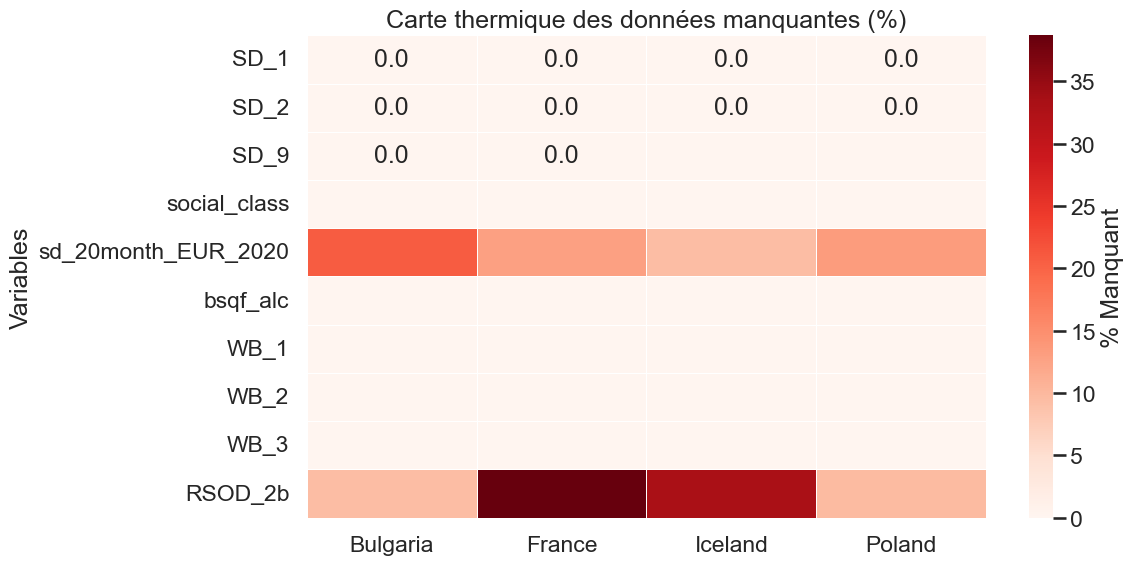

In [207]:
vars_audit = [
    'SD_1', 'SD_2', 'SD_9', 'social_class',  
    'sd_20month_EUR_2020',                            
    'bsqf_alc', 'WB_1', 'WB_2', 'WB_3', 'RSOD_2b',      
]
std.heatmap_manquants(data1, vars_audit)


Avant de lancer les analyses, un audit rapide de la base montre que les données sont globalement très saines. En effet, on peut voir que nous n'avons aucune valeur manquante sur les variables clés (âge, sexe, éducation, classe sociale) pour les quatre pays. Cela nous facilitera la comparaison des profils de consommateurs entre les pays.

Cependant,Comme souvent dans les enquêtes, le revenu mensuel (sd_20month_EUR_2020) comporte beaucoup de trous, surtout en Bulgarie (21 % de manquants) et en Pologne/France. Plutôt que de supprimer ces individus, nous procederons a une imputation par des regressions, de meme que pour les variables de binge drinking (RSOD_2b).

In [208]:
# Matching des variables
map_marital = {
    1: "Married/Living together",
    2: "Married/Living apart",
    3: "Never married",
    4: "Divorced",
    5: "Widowed"
}

map_residence = {
    1: "Village/Farm",
    2: "Small city (<50k)",
    3: "Medium city (50k-250k)",
    4: "Large city (250k-1M)",
    5: "Very large city (>1M)"
}

map_education = {
    1: "Primary",
    2: "Secondary",
    3: "Vocational",
    4: "University/Higher",
    5: "No schooling"
}

map_pro_status = {
    1: "Active",
    2: "Non-active"
}

map_social_class = {
    1: "Blue collar",
    2: "White collar",
    3: "Manager/Professional",
    4: "Business person",
    5: "Other",
    9: "No answer"
}


data1['Marital_Label'] = data1['SD_4'].map(map_marital)
data1['Residence_Label'] = data1['SD_8'].map(map_residence)
data1['Education_Label'] = data1['SD_9'].map(map_education)
data1['Activity_Label'] = data1['SD_10'].map(map_pro_status)
data1['Class_Label'] = data1['social_class'].map(map_social_class)


 ANALYSE : Statut Marital (Marital_Label)
>>> Tableau des Pourcentages (%) :
Marital_Label  Divorced  Married/Living apart  Married/Living together  \
COUNTRY                                                                  
Bulgaria            8.9                   5.0                     52.7   
France              8.5                   4.1                     51.9   
Iceland             6.2                   2.1                     58.0   
Poland              6.4                   7.3                     63.0   

Marital_Label  Never married  Widowed  
COUNTRY                                
Bulgaria                31.2      2.2  
France                  34.3      1.3  
Iceland                 32.6      1.2  
Poland                  22.1      1.2  

>>> Tableau des Effectifs (N) :
Marital_Label  Divorced  Married/Living apart  Married/Living together  \
COUNTRY                                                                  
Bulgaria            267                   149           

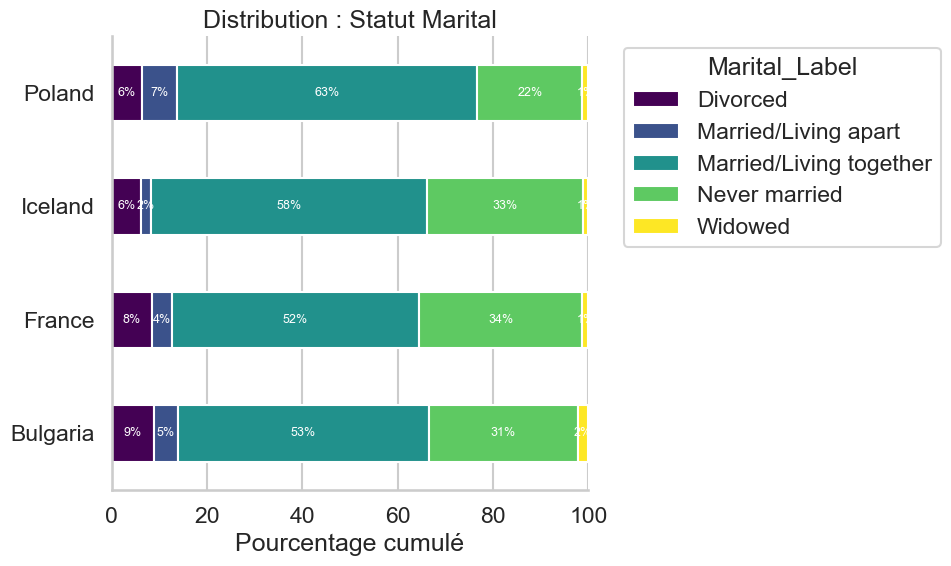


 ANALYSE : Type de Résidence (Residence_Label)
>>> Tableau des Pourcentages (%) :
Residence_Label  Large city (250k-1M)  Medium city (50k-250k)  \
COUNTRY                                                         
Bulgaria                         20.6                    21.8   
France                            9.2                    22.1   
Iceland                           9.6                    37.9   
Poland                           20.3                    26.6   

Residence_Label  Small city (<50k)  Very large city (>1M)  Village/Farm  
COUNTRY                                                                  
Bulgaria                      21.3                   29.7           6.5  
France                        35.0                    6.4          27.3  
Iceland                       42.5                    1.9           8.2  
Poland                        24.2                   10.1          18.8  

>>> Tableau des Effectifs (N) :
Residence_Label  Large city (250k-1M)  Medium cit

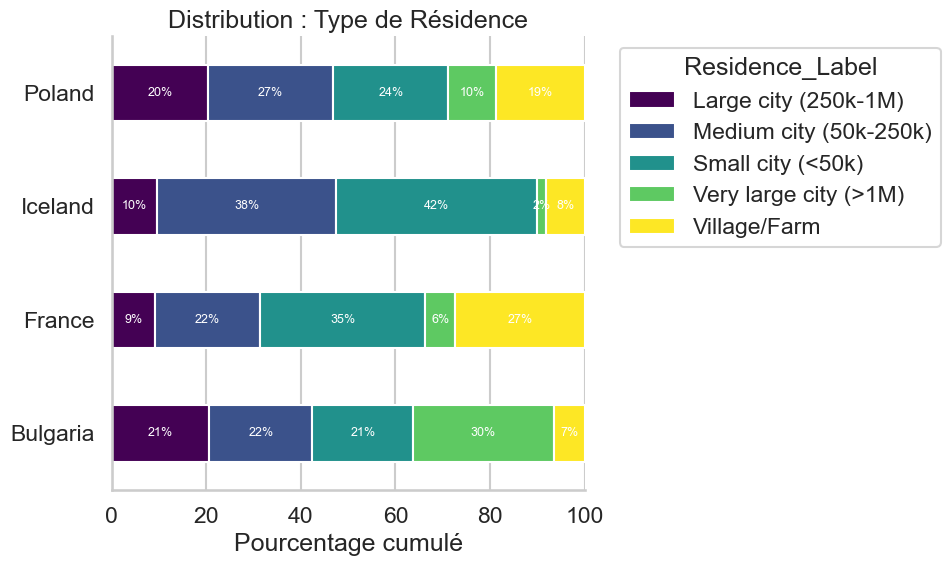


 ANALYSE : Niveau d'Éducation (Education_Label)
>>> Tableau des Pourcentages (%) :
Education_Label  No schooling  Primary  Secondary  University/Higher  \
COUNTRY                                                                
Bulgaria                  0.2      0.3        1.5               59.1   
France                    0.1      0.6       18.8               56.0   
Iceland                   0.1      4.9        9.9               69.8   
Poland                    0.3     10.0       35.5               45.2   

Education_Label  Vocational  
COUNTRY                      
Bulgaria               38.9  
France                 24.6  
Iceland                15.2  
Poland                  9.1  

>>> Tableau des Effectifs (N) :
Education_Label  No schooling  Primary  Secondary  University/Higher  \
COUNTRY                                                                
Bulgaria                    6        8         46               1773   
France                      1       10        316     

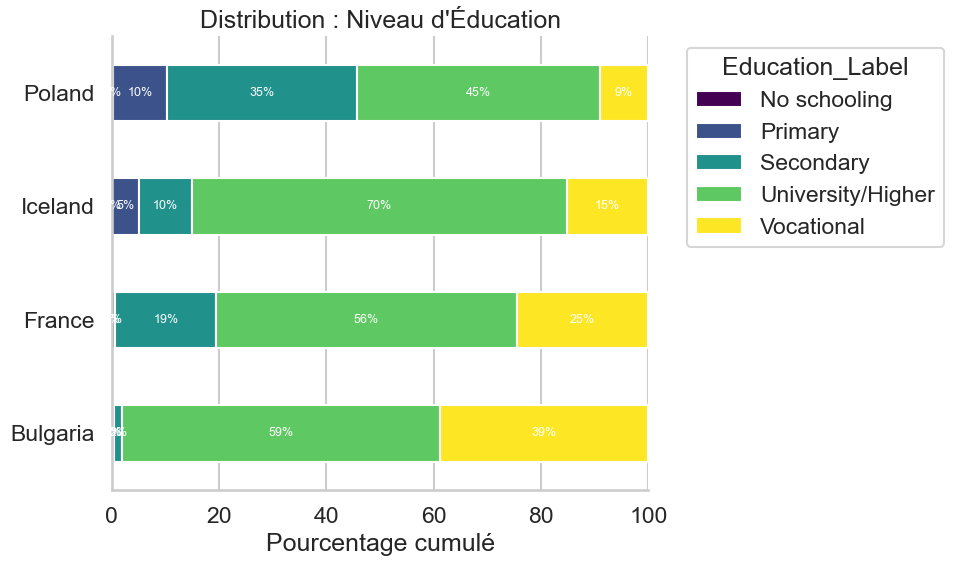


 ANALYSE : Statut Professionnel (Activity_Label)
>>> Tableau des Pourcentages (%) :
Activity_Label  Active  Non-active
COUNTRY                           
Bulgaria          75.9        24.1
France            72.2        27.8
Iceland           72.7        27.3
Poland            74.1        25.9

>>> Tableau des Effectifs (N) :
Activity_Label  Active  Non-active
COUNTRY                           
Bulgaria          2275         723
France            1212         466
Iceland           1051         394
Poland            1155         404


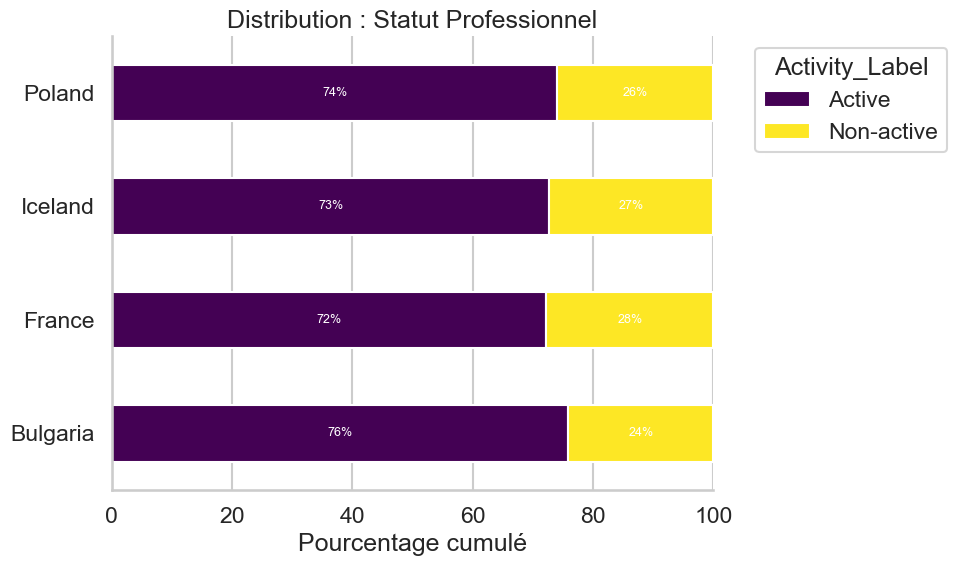


 ANALYSE : classe sociale (Class_Label)
>>> Tableau des Pourcentages (%) :
Class_Label  Blue collar  Business person  Manager/Professional  No answer  \
COUNTRY                                                                      
Bulgaria            22.5              6.4                  23.4       24.1   
France              18.7              5.2                  22.5       27.8   
Iceland             11.6             12.3                  37.9       27.3   
Poland              25.8              3.1                  21.8       25.9   

Class_Label  Other  White collar  
COUNTRY                           
Bulgaria       8.8          14.7  
France         5.3          20.5  
Iceland        0.2          10.7  
Poland         3.7          19.6  

>>> Tableau des Effectifs (N) :
Class_Label  Blue collar  Business person  Manager/Professional  No answer  \
COUNTRY                                                                      
Bulgaria             675              192               

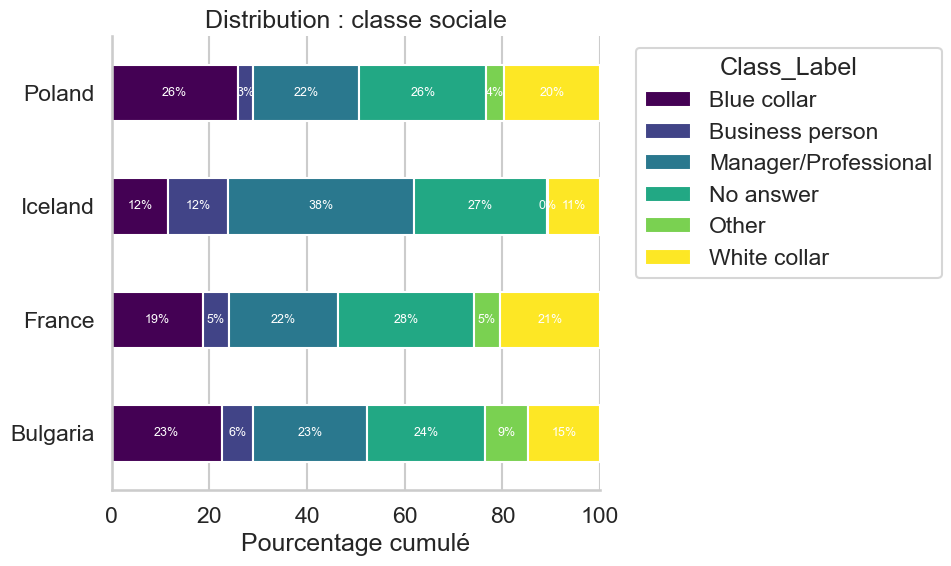

In [209]:
std.analyse_cat(data1, 'Marital_Label', 'Statut Marital')
std.analyse_cat(data1, 'Residence_Label', 'Type de Résidence')
std.analyse_cat(data1, 'Education_Label', "Niveau d'Éducation")
std.analyse_cat(data1, 'Activity_Label', 'Statut Professionnel')
std.analyse_cat(data1, 'Class_Label', 'classe sociale')

Synthese des profils socio-demographiques:

On observe ci-dessus des structures culturelles bien distinctes selon les pays. La Pologne se détache comme le pays le plus « traditionnel », avec une nette majorité de personnes mariées (63 %), là où la France et l'Islande comptent beaucoup plus de célibataires. Géographiquement, c'est la Bulgarie qui surprend par sa polarisation extrême : ses habitants vivent soit dans la capitale et les très grandes villes, soit au village, sans grand entre-deux.

Le niveau d'éducation est un autre facteur de différenciation majeur. L'échantillon islandais est particulièrement instruit (70 % de niveau universitaire), ce qui contraste avec une Pologne dont le socle principal reste l'enseignement secondaire. Cela aura forcément un impact sur l'analyse des comportements de santé, même si le taux d'emploi, lui, est identique partout (environ 75 % d'actifs).


 ANALYSE : Âge des répondants (SD_2)
          Moyenne  Médiane  Ecart-Type   IQR  Min  Max   P10   P90
COUNTRY                                                           
Bulgaria    40.51     41.0       11.62  18.0   18   64  24.0  56.0
France      42.01     42.0       12.86  22.0   18   64  25.0  60.0
Iceland     40.04     38.0       11.56  14.0   18   64  26.0  56.0
Poland      39.91     40.0       12.78  20.5   18   64  22.0  58.0


c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Utilis

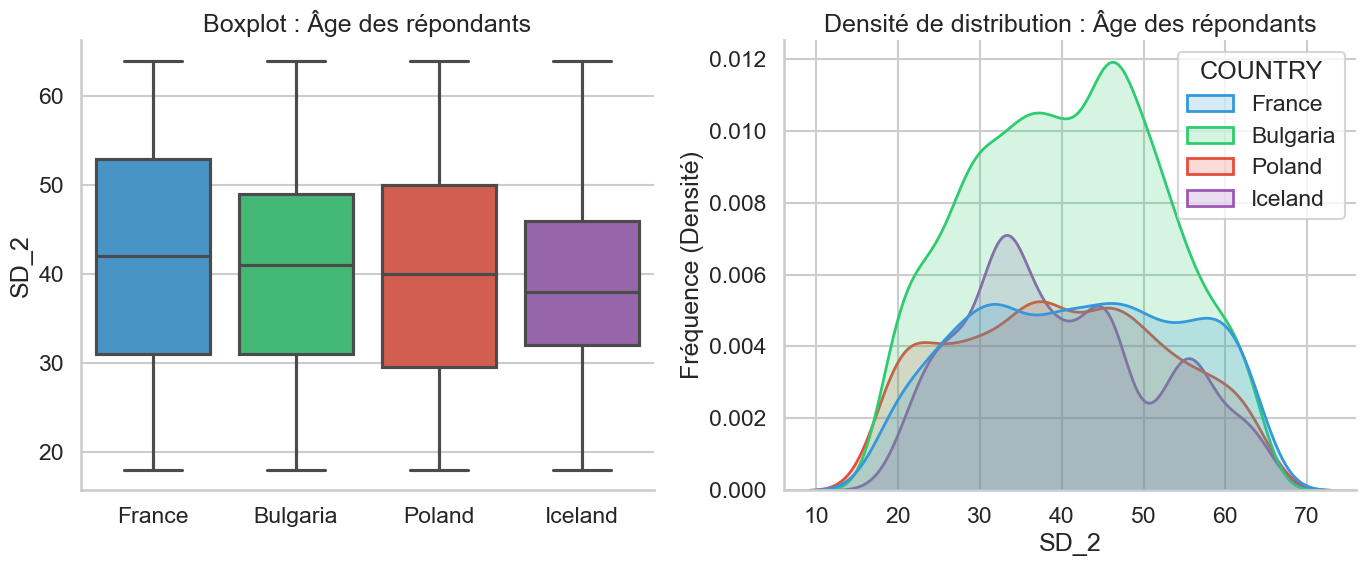


 ANALYSE : Revenu Mensuel (en Euros) (sd_20month_EUR_2020)
          Moyenne  Médiane  Ecart-Type      IQR      Min       Max      P10  \
COUNTRY                                                                       
Bulgaria  1020.47   895.03      587.47   715.56    95.87   2300.85   409.04   
France    4041.78  3000.00     2743.40  3450.00  1500.00   9000.00  1500.00   
Iceland   5070.42  4869.73     2151.62  2130.51  1533.97  10080.35  1533.97   
Poland    1301.35  1175.25      592.81   940.20   264.43   2291.75   587.63   

              P90  
COUNTRY            
Bulgaria  2045.20  
France    9000.00  
Iceland   7304.60  
Poland    2291.75  


c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Utilis

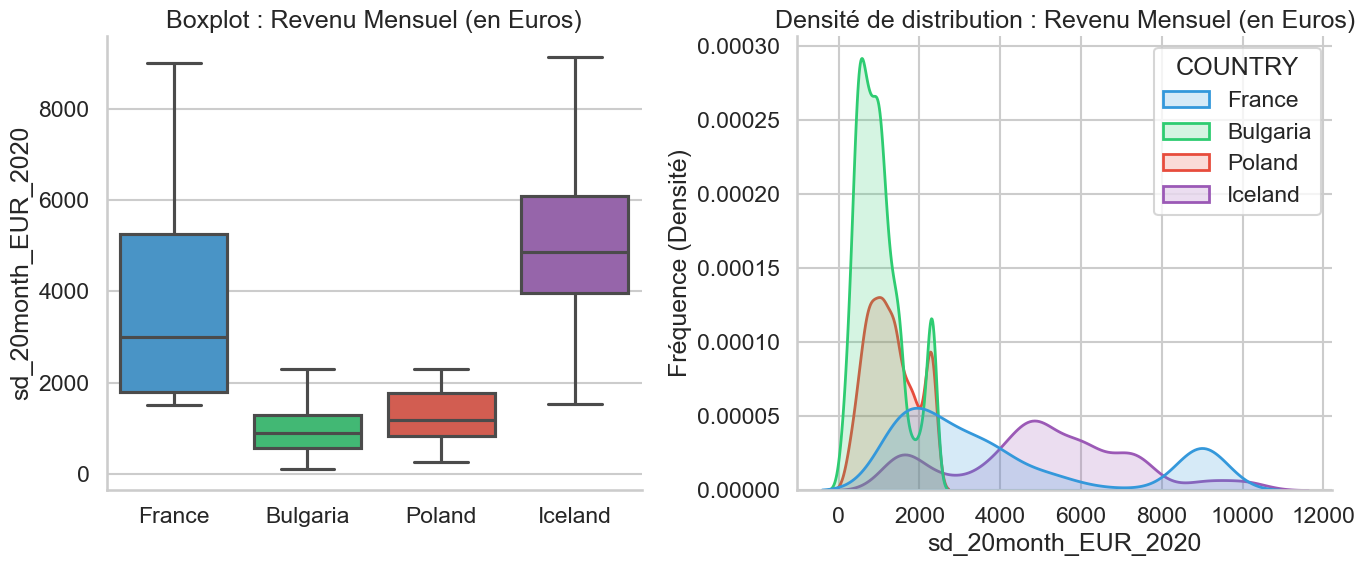

In [210]:
std.analyse_num(data1, 'SD_2', 'Âge des répondants')
std.analyse_num(data1, 'sd_20month_EUR_2020', 'Revenu Mensuel (en Euros)')

On observe une structure d'age relativement homogene, les échantillons sont parfaitement alignés entre les quatre pays. La moyenne d'âge gravite partout autour de 40-42 ans, avec une couverture stricte de la population active (de 18 à 64 ans). On note une légère nuance pour l'Islande, qui présente une population un peu plus jeune (médiane à 38 ans contre 42 en France) et une densité plus forte sur les trentenaires. Cependant, ces écarts sont minimes. Ainsi, si l'on observe des différences de consommation d'alcool, elles ne seront pas dues à un effet de structure (par exemple, un pays qui serait beaucoup plus "vieux" qu'un autre).

À l'inverse de l'âge, la distribution des revenus mensuels (convertis en euros) illustre le fossé économique entre les pays étudiés. On distingue clairement deux groupes : -Le groupe "Hauts Revenus" : L'Islande domine largement avec un revenu médian autour de 4 800 €, suivie par la France (médiane à 2 925 €). La France se distingue par une forte inégalité : la moyenne (4 020 €) est bien supérieure à la médiane, tirée par des hauts revenus, ce qui se voit sur l'étalement de la courbe de densité. -Le groupe "Revenus Modestes" : La Pologne et la Bulgarie présentent des distributions beaucoup plus resserrées et concentrées vers le bas, avec des médianes respectives de 1 175 € et 895 €.

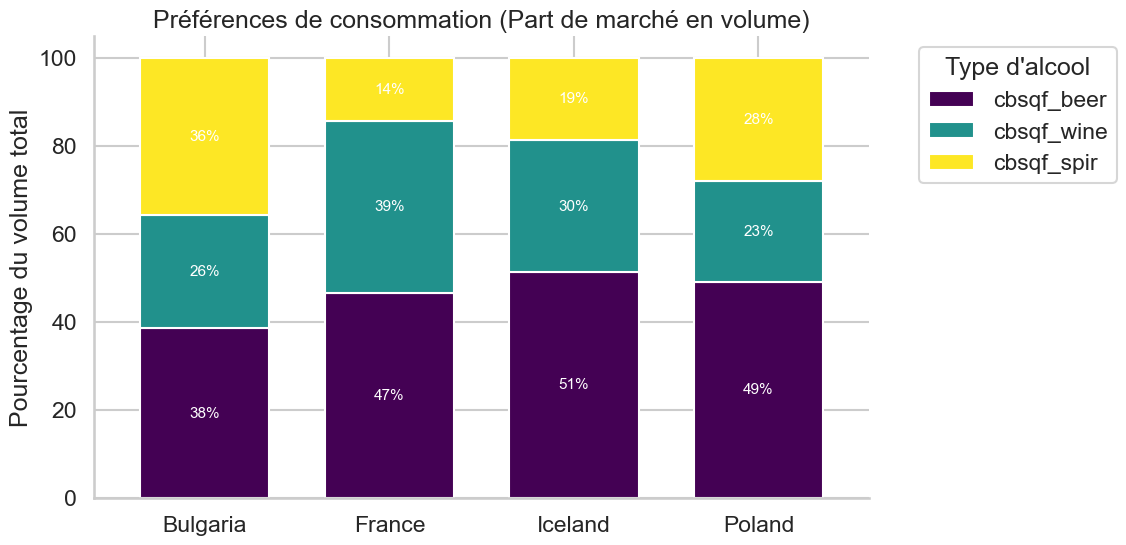

In [214]:
std.preferences_alcool(data1)

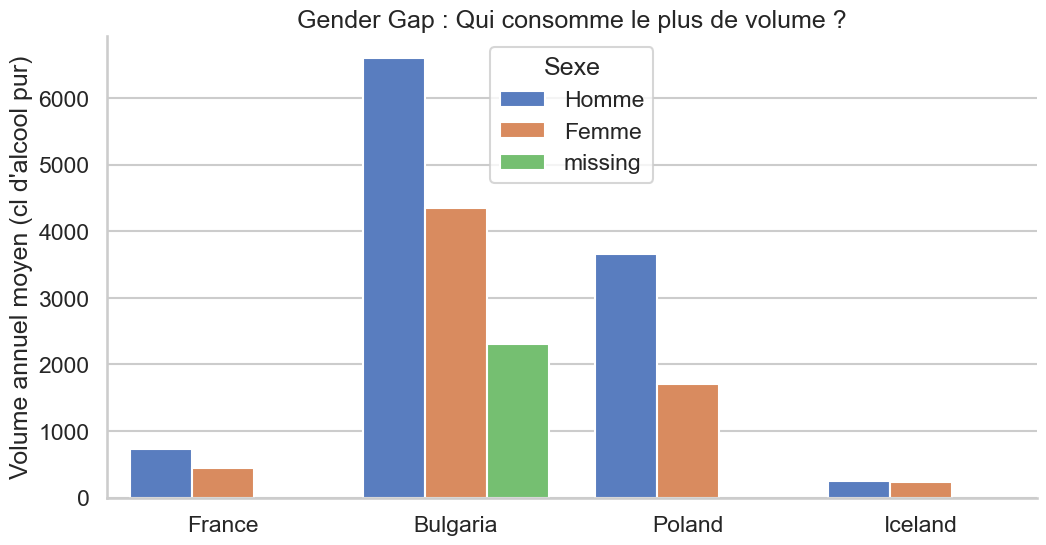

In [215]:
std.ecart_hommes_femmes(data1)

Les hommes consomment plus d'alcool que les femmes dans tous les pays mais dans des proportion très différentes selon les pays. Les polonais consomment environ deux fois plus que les polonaises mais les islandais consomment presque le même volume que les islandaises.
Le sexe semble donc être davantage un déterminant de la consommation d'alcool en Pologne et en Bulgarie. 

c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\si

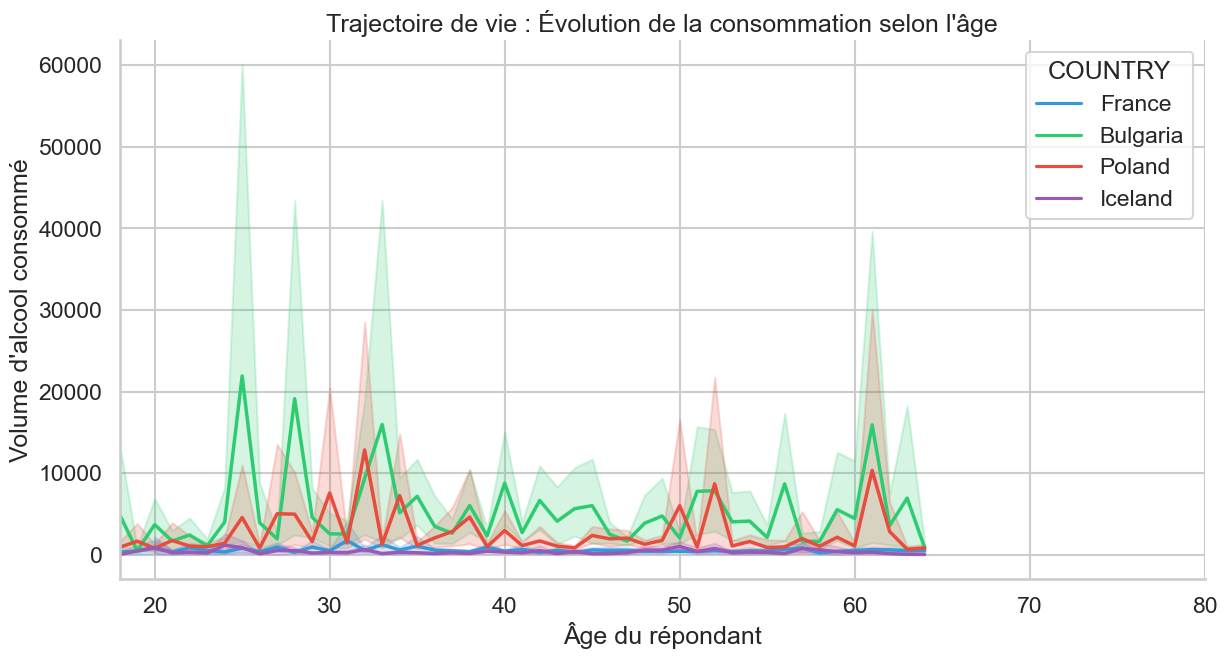

In [216]:
std.evolution_par_age(data1)


(a) INTENSITÉ ANNUELLE (bsqf_alc)
>>> Indicateurs de distribution :
            mean  median     iqr     p90      p95
COUNTRY                                          
Bulgaria  5429.0   660.1  2020.0  6420.9  14448.4
France     585.7   179.1   555.6  1434.7   2309.1
Iceland    242.6    60.0   181.6   577.3   1133.5
Poland    2627.6   537.3  1302.5  3555.6   6418.6


c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


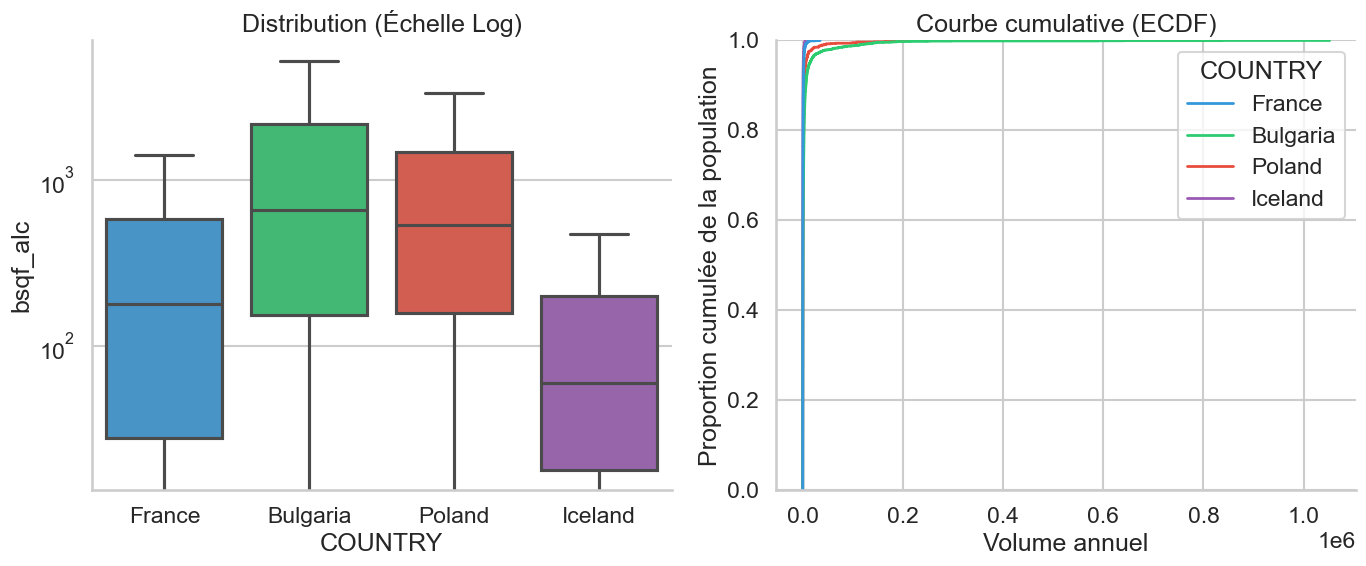

In [224]:

std.analyse_intensite_annuelle(data1, log_scale=True)

On voit ici que la Bulgarie et la Pologne se distinguent par les médianes de consommation les plus élevées et des distributions étalées vers le haut, signalant une part importante de gros consommateurs. À l'opposé, l'Islande affiche une consommation globale très faible, avec une médiane écrasée vers le bas.


(d-1) FRÉQUENCE BINGE DRINKING (RSOD_2b)
Distribution des fréquences RSOD (%) :
RSOD_Simple  1 - 2 days a week  1 day in a month  2-3 days a month  \
COUNTRY                                                              
Bulgaria                  10.7               6.8              14.8   
France                     7.8               7.7              11.1   
Iceland                    6.3               3.4               7.7   
Poland                    19.0              14.0              15.4   

RSOD_Simple  2-5 days a year  3-4 days a week  5-6 days a week  \
COUNTRY                                                          
Bulgaria                12.4             11.7              7.2   
France                  16.2              6.1              1.1   
Iceland                 11.8              2.5              0.7   
Poland                  14.1              6.0              2.8   

RSOD_Simple  6-11 days a year  Every day  \
COUNTRY                                    
Bulgaria     

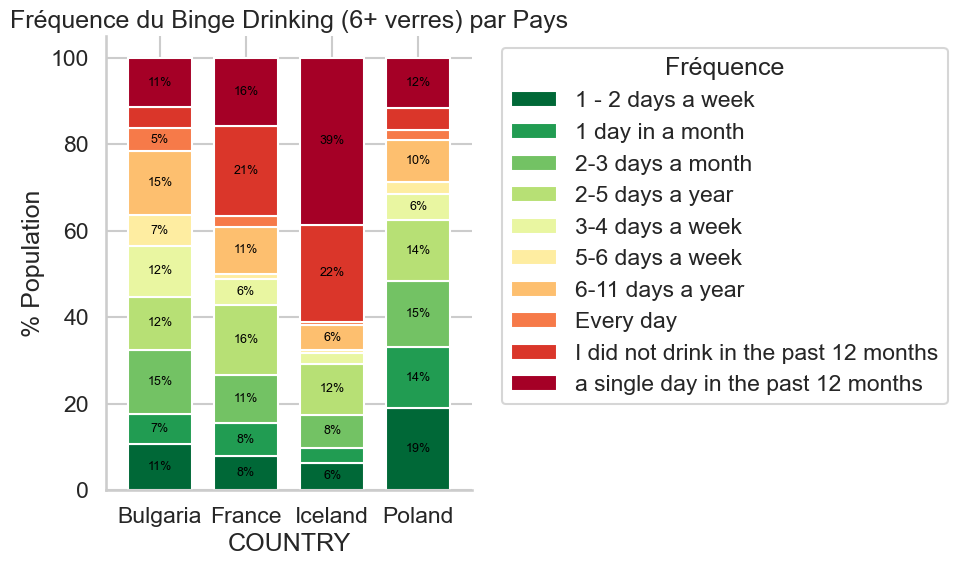

In [225]:
std.analyse_rsod_frequence(data1)


(c) COMPOSITION DU PANIER (Mix Alcool)
>>> Mix Moyen (%) par Pays :
          Share_Beer  Share_Wine  Share_Spir
COUNTRY                                     
Bulgaria        37.1        31.2        31.7
France          43.8        42.6        13.6
Iceland         47.2        35.0        17.8
Poland          49.9        26.8        23.3


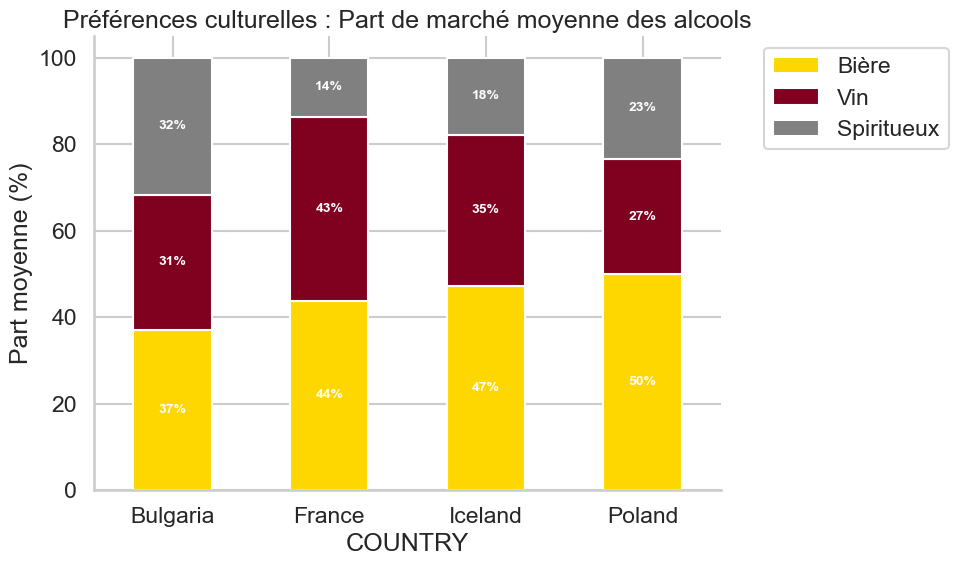

In [219]:
std.analyse_composition(data1)

En matiere de type d'alcool consommé, la France reste incontestablement le pays du vin, qui représente 43 % du volume d'alcool ingéré, loin devant les autres pays. La Pologne (50 %) et l'Islande (47 %) en revanche sont des terres de bière. La Bulgarie quant a elle est le seul pays où les spiritueux (alcools forts) occupent une place aussi massive (32 % du marché), talonnant la bière.

<a id="partie2b"></a>
## B. Imputation des données

### Stratégie d'Imputation des Données Manquantes

### 1. Contexte et Approche Stratifiée par Pays

La base de données traitée présente une forte hétérogénéité structurelle due à la diversité des pays inclus.

Afin d'éviter **le biais d'écrasement** qu'aurait provoqué une imputation globale, nous avons opté pour une approche **stratifiée par pays**.

* **Justification :** Un revenu de 2000€ n'a pas la même signification économique ni le même pouvoir prédictif en France qu'en Pologne. De même, les modèles de consommation d'alcool sont fortement culturels.
* **Décision :** Chaque modèle d'imputation a été entraîné et appliqué exclusivement sur les sous-ensembles de données nationaux, garantissant le respect des distributions et des corrélations locales.


### 2. Imputation du Salaire mensuel ('sd_20month_EUR_2020): Approche par Modélisation Prédictive

Pour la variable **Salaire** (variable quantitative continue), nous avons rejeté les imputations univariées simplistes (moyenne/médiane) qui réduisent la variance et faussent les analyses de corrélation ultérieures.

Nous avons privilégié une approche par **Régression Supervisée (Random Forest )** pour les raisons suivantes :

* **Préservation de la Structure de Corrélation :** Le salaire est fortement déterminé par des variables explicatives présentes dans la base. L'utilisation d'un modèle prédictif permet de reconstruire le salaire théorique d'un individu en fonction de son profil socio-démographique précis.
* **Gestion de la Non-Linéarité :** Contrairement à une régression linéaire simple, les modèles d'ensemble comme le randaom Forest capturent les effets de seuil et les interactions complexes.

### 3. Imputation de la Fréquence de Consommation et du Nombre d'enfant de moins de 18 ans dans le ménage : Approche par KNN

Pour les variables **Fréquence de grosse consommation (RSOD_2b)** et **Nombre de mineurs dans le ménage (SD_7)**, nous avons opté pour l'algorithme des **K-Plus Proches Voisins (KNN)**.

Ce choix se justifie par la nature de ces variables et la logique sociologique sous-jacente :

* **Nature des Variables (Ordinales/Discrètes) :**
* La fréquence de consommation est une variable ordinale (échelle de 1 à 10).
* Le nombre de mineurs est une variable discrète.
* L'utilisation d'une régression aurait produit des valeurs continues aberrantes. Le KNN, en faisant la moyenne locale, reste plus cohérent avec des valeurs discrètes.


* **Logique de "Profils Similaires" :** les comportements (boire de l'alcool) et les structures familiales (avoir des enfants) tendent à être partagés par des individus ayant des caractéristiques proches (même âge, même milieu social).


In [226]:
data = ipt.imputer_salaire_pays(data)

Début de l'imputation pour 4 pays...

--- Performances du modèle pour France ---
Score R² : 0.9512
RMSE : 0.14
--------------------------------------------

--- Performances du modèle pour Iceland ---
Score R² : 0.9315
RMSE : 0.13
--------------------------------------------

--- Performances du modèle pour Bulgaria ---
Score R² : 0.9182
RMSE : 0.18
--------------------------------------------

--- Performances du modèle pour Poland ---
Score R² : 0.9333
RMSE : 0.13
--------------------------------------------


--- Imputation terminée pour tous les pays ---


In [227]:
data = ipt.imputer_knn(data)


 Imputation terminée.


In [228]:
pays_selectionnes = ["France", "Bulgaria", "Poland", "Iceland"]
data = data[data["COUNTRY"].isin(pays_selectionnes)]
stats_na = cld.tableau_na(data)
stats_na

<a id="partie2c"></a>
## C. Analyses factorielles (ACM & ACP)

### *ACP/ACM France* ###

*ACP France*

In [229]:
# Sélection des variables quantitatives 
quanti = data[[
    "SD_2",          # Âge 
    "SD_7",          # Nombre de mineurs au foyer 
    "sd_20month_EUR_2020",    # Revenu mensuel 
    "bsqf_alc",      # Consommation annuelle totale d'alcool 
    "cbsqf_beer",    # Consommation annuelle de bière(plafonnée) 
    "cbsqf_spir",    # Consommation annuelle de spiritueux (plafonnée) 
    "cbsqf_wine"     # Consommation annuelle de vin (plafonnée) 
]]

# Sélection des variables qualitatives 
quali = data[[
    "COUNTRY",       # Pays de résidence
    "SD_1",          # Genre 
    "SD_4",          # Statut matrimonial 
    "SD_6",          # vie seul ou non
    "SD_8",          # Type de lieu de résidence 
    "SD_9",          # Niveau d'éducation 
    "SD_10",         # Statut d'activité professionnelle 
    "social_class",  # Classe sociale auto-déclarée 
    "f_1b",          # Fréquence générique de consommation 
    "RSOD_2b",       # Fréquence de consommation de 4/6+ verres 
    "CH_1",          # Contact avec un gros buveur durant l'enfance 
    "WB_1",          # État de santé général 
    "WB_2",          # Bien-être psychologique 
    "WB_3"           # Satisfaction des relations sociales
]]

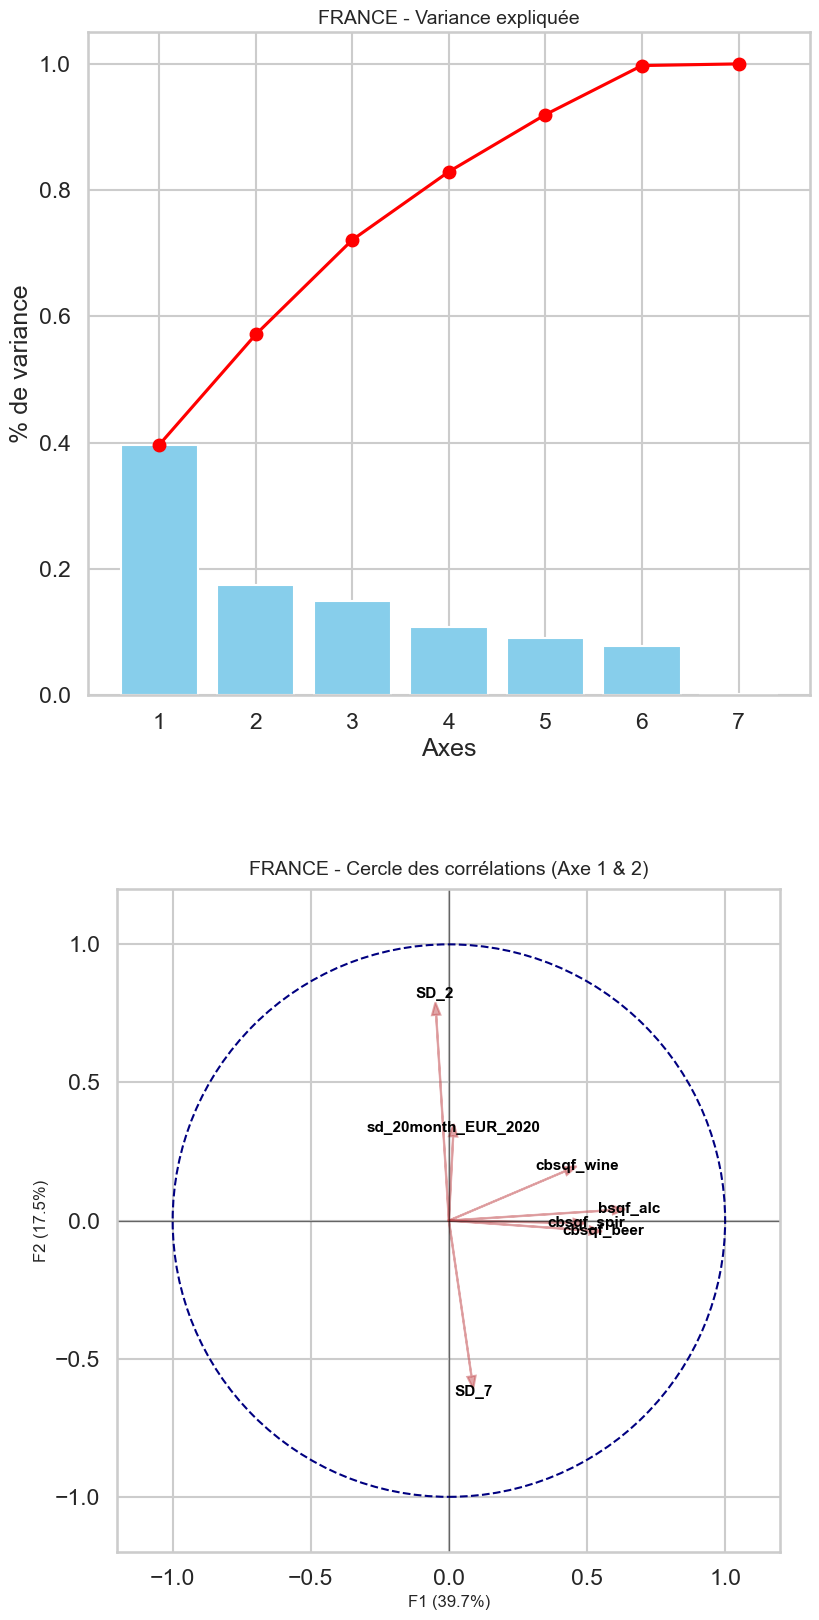

In [231]:


# On calcule l'ACP sur les quanti.colums/ variables quantitatives
pca_fr, feat_fr, cols_fr = dtn.calculer_acp_pays(data, "France", quanti.columns)

# Et on trace
if pca_fr is not None:
    dtn.trace_cercle_et_variance(pca_fr, cols_fr, "FRANCE")


La première dimension explique 40% de la variance et la deuxième environ 17.5%, on capture donc déjà beaucoup de variabilité en étudiant ces deux premières dimensions notamment la première.
On voit sur le cercle des corrélations qu'aucune variable n'explique extrêmement bien la première dimension, les variables qui lui sont les plus corrélées sont la consommation d'alcool annuelle (bsqf_alc) et de bière en particulier (bsqf__beer).
Les variables SD_7 (le nombre de mineur dans le foyer) et l'âge SD_2 sont très bien représentées sur le second axe. 
On remarquera logiquement que SD_2 et SD_7 ont la même direction mais des sens totalement opposés sur l'axe 2, c'est logique plus on avance en âge, moins on a d'enfants à charge au foyer, cette ACP capte bien une structure démographique logique dans les données française.

Le fait que le vecteur associé à la consommation de vin (cbsqf_wine) pointe légèrement plus vers le haut que celle de bière ou de spiritueux (vers le sens de l'âge SD_2 qui explique très bien l'axe 2) suggère qu'en France, la consommation de vin est plus corrélée aux profils plus âgés.

Les matrices de variance des ACP de chaque pays sont dans la partie II de l'annexe.

On va maintenant calculer les cos^2 des individus sur les deux premiers axes, c'est à dire la qualité de leur représentation sur ces axes.

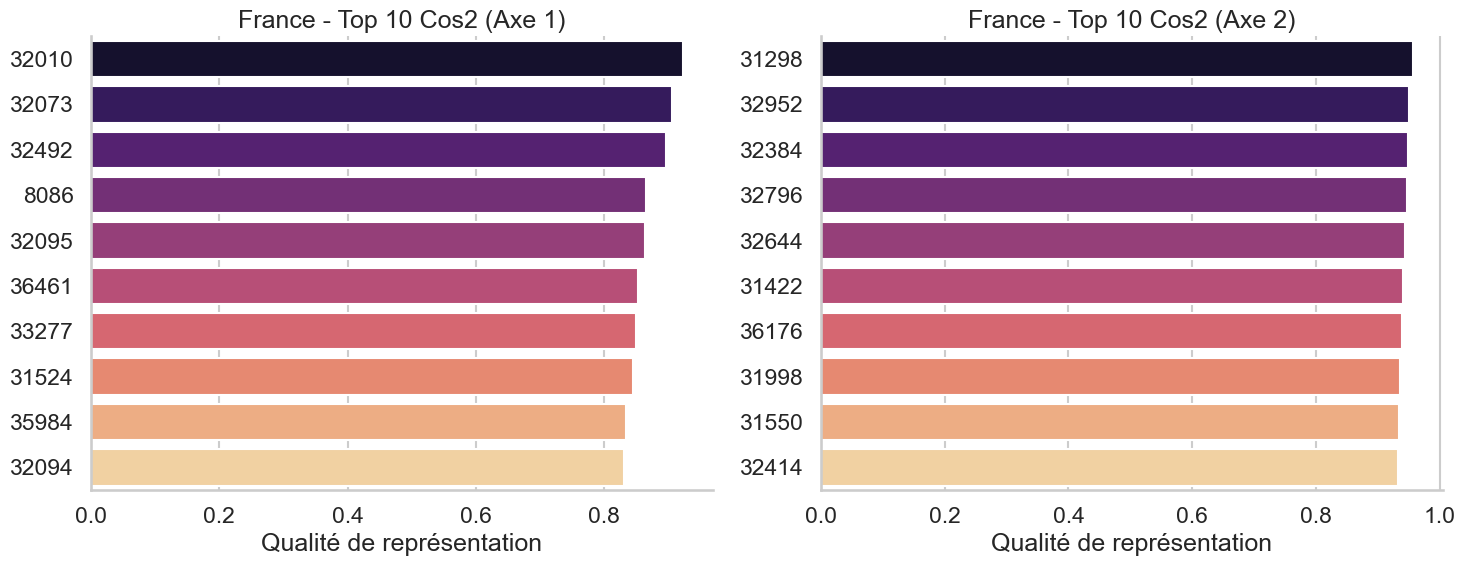

In [248]:
meilleur_index1, meilleur_index2 = dtn.tracer_cos2_individus(data, "France", quanti.columns, pca_fr, n_top=10)

On voit que le cos^2 des individus les mieux projetés sur chaque axe sont entre 0.8 et 1 ce qui est assez proche de 1, ces individus sont donc très représentatifs d'un de ces deux premiers axes. Par exemple, l'individu 32010 est très représentatif de l'axe 1 et l'individu 36176 est très représentatif de l'axe 2.

In [249]:
# On lève la limite sur le nombre de colonnes affichées
pd.set_option('display.max_columns', None)
# On affiche le profil / la ligne dans le dataset pour les individus ayant les plus gros cos2 pour l'axe 1 et 2
display(data.loc[[meilleur_index1]], data.loc[[meilleur_index2 ]] )

COUNTRY  SD_1  SD_2  SD_4  SD_6  SD_7  SD_8  SD_9  SD_10  sd_20month  \
32010  France     2    31     2     2   2.0     2     4      1      2750.0   

       social_class  bsqf_alc  f_1b  cbsqf_beer  cbsqf_spir  cbsqf_wine  \
32010             1   34711.5     1     18250.0      9855.0      4380.0   

       RSOD_2b  CH_1  WB_1  WB_2  WB_3  EXCHANGE_RATE_TO_EUR  \
32010      1.0     1     2     2     2                   1.0   

       sd_20month_EUR_2020      PPA  sd_20month_EUR_2020_PPA  RSOD_2bisna  
32010               2750.0  1.08489              2534.819198            0

COUNTRY  SD_1  SD_2  SD_4  SD_6  SD_7  SD_8  SD_9  SD_10  sd_20month  \
31298  France     2    19     2     1   2.0     2     4      1      2250.0   

       social_class  bsqf_alc  f_1b  cbsqf_beer  cbsqf_spir  cbsqf_wine  \
31298             4      68.5     4        42.5         8.5        17.5   

       RSOD_2b  CH_1  WB_1  WB_2  WB_3  EXCHANGE_RATE_TO_EUR  \
31298      8.0     1     1     1     2                   1.0   

       sd_20month_EUR_2020      PPA  sd_20month_EUR_2020_PPA  RSOD_2bisna  
31298               2250.0  1.08489               2073.94298            0

Individu 32010 : Le profil de l'Axe 1
Identité : 
- C'est une femme de 31 ans.

- Foyer : Elle vit avec 2 enfants mineurs.

- Revenu : Elle gagne 2 750 € par mois.

- Consommation : Elle boit 347 L d'alcool par an au total (ce qui est, disons le, beaucoup trop pour être crédible)!!

- Détail : Sa consommation d'alcool est en majorité de la bière.

- Santé : Elle a un score de bien-être physique et mental de 2 (= "good" sur une échelle où 1 (="very good") est le maximum).

Individu 36176 : Le profil de l'Axe 2 

- Identité : C'est un homme de 56 ans.

- Foyer : Il n'a aucun enfant mineur à charge.

- Revenu : Il gagne 5 550 € par mois.

- Consommation : Il boit 615 cl soit 6.15L d'alcool par an au total.

- Détail : Sa consommation est plus diversifiée mais beaucoup plus faible en volume que l'individu précédent.

- Santé : Il a un score de bien-être physique et santé mental de 1 ("Very good"), et un score de satistaction dans les relations sociales de 2 ("good")


Puisque sur l'axe 1, ne sont bien représentées que des variables liées à l'alcool et sur l'axe 2 ne sont bien représentées que des variables non relatives à la consommation d'alcool, il nous semble difficile de déduire une interprétation généralisable sur le profil des consommateurs français via cette ACP. En effet, par exemple, l'individu 32010 est archétypique d'une forte consommatrice d'alcool tandis que le 36176 est archétypique d'une liaison entre haut revenu, âge élevé et baisse du nombre d'enfant dans le foyer mais ne dit pas grand chose sur la consommation d'alcool.

Mais donc l'ACP semble révéler que le profil de consommation (Axe 1) et le profil de vie (Axe 2) sont déconnectés. Cela suggère que la consommation d'alcool en France est un phénomène qui traverse toute la distribution de revenu et tous les âges : on peut être un 'gros consommateur' (Axe 1+) quel que soit son profil familial/économique (Axe 2).

*ACM France*

In [250]:
#On recode certaines variables pour rendre l'ACM plus facilement interprétable

# Recodage du REVENU (sd_20month)
# On le découpe en quartiles
df_acm= data.copy()
df_acm['sd_20month_EUR_2020'] = pd.qcut(df_acm['sd_20month_EUR_2020'], q=4, labels=['Revenu_quartile1', 'Revenu_quartile2', 'Revenu_quartile3','Revenu_quartile4'])
df_acm['RSOD_2b'] = df_acm['RSOD_2b'].apply(dtn.simplifier_rsod)#recodage du binge drinking en 4 catégories (cf Data_analysis.py)
df_acm['f_1b'] = df_acm['f_1b'].apply(dtn.recoder_f1b)#recodage de la fréquence de consommation d'alcool en 4 catégories


Avant de faire l'ACM, on doit choisir les variables qui sont actives, c'est à dire qui participent à la construction des axes. Elles permettront alors de comprendre les liens entre les modalités (la plus ou moins forte consommation d'alcool ou le genre par exemple) et de repérer la prévalence de ces modalités pour des groupes d'individus par exemple. On fixe ce que l'on cherche : trouver des liens entre la consommation d'alcool et des caractéristiques intrinsèques des individus (socio-économique notamment). C'est donc les variables qui décrivent cela que l'on doit prendre comme variables actives. Ensuite, nous choisissons quelques variables illustratives pertinentes au vue de la littérature et des analyses descriptives précédentes (elles peuvent être qualitatives ou quantitatives - donc on peut y mettre la consommation d'alcool bsqf_alc notamment). Ces variables ne sont pas utilisées pour la construction des axes, mais sont projetées a posteriori sur les axes pour enrichir, si possible, l'interprétation. En suivant cette idée, on fait les choix suivant:

In [251]:
# Variables Actives
actives = [
    "sd_20month_EUR_2020", "f_1b", "RSOD_2b", "SD_9", "SD_1", 
    "social_class", "WB_1", "WB_2", "WB_3",]
    
# Variables Illustratives
illustratives = [ "SD_2", "SD_6", "SD_8"," SD_7", "cbsqf","cbsqf_beer", "cbsqf_spir", "cbsqf_wine"]

On a choisi un peu arbitrairement de réduire l'ACM à trois dimensions, cela permet de dégager les grandes tendances en étudiant les deux premières. Nous avons essayé avec 8 dimensions et les résultats/interprétations qui s'en suivaient ne changeaient pas significativement.

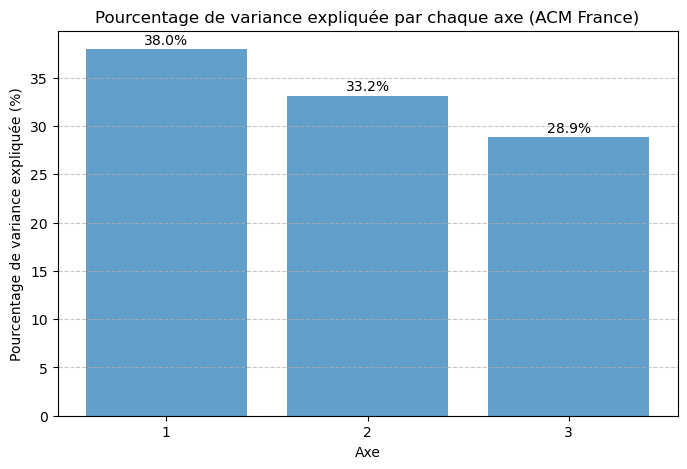

In [264]:
mca_fr = dtn.fait_acm(df_acm, "France", actives)
dtn.plot_var_acm(mca_fr, "France")

La première dimension explique 38% de la variance des données des variables actives et la seconde 33 %. Ces deux dimensions expliquent une grande part de la variance et on peut se concentrer sur elles. 

Comme le nombre de modalités est trop important pour être bien lisible en représantation graphique, on regarde plutôt pour commencer le lien entre chacune des deux premières dimensions et les variables actives.

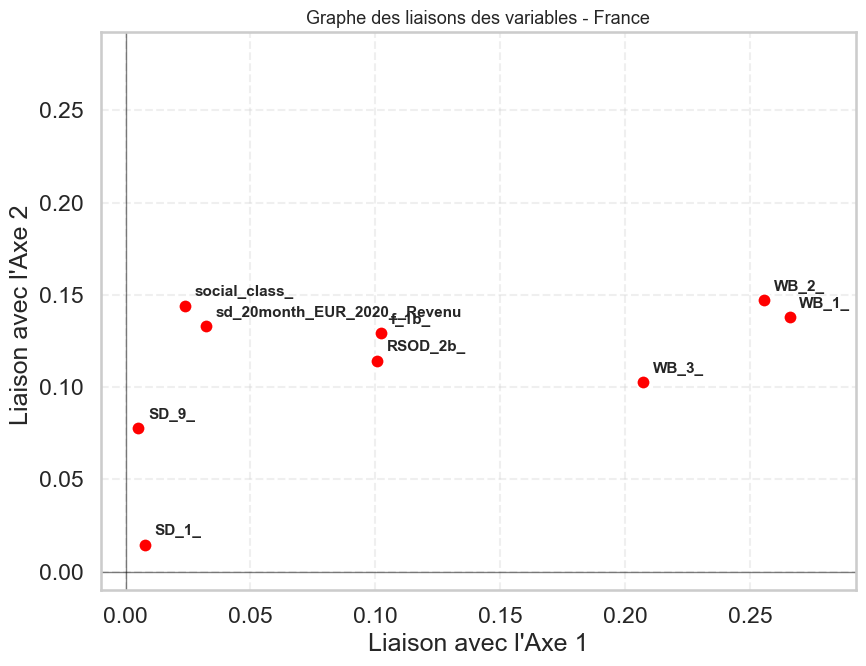

In [253]:
#graphe des contributions de chaque variables aux 2 premiers axes
dtn.tracer_graphe_liaisons(mca_fr, "France")

On voit que la première dimension est surtout liée ( mais pas très fortement ~0.25) aux variables WB_1à3 c'est à dire respectivement l'état de santé, l'état psychologique et la satisfaction dans les rapports sociaux déclarés et un petit peu à la fréquence de consommation d'alcool et au salaire. La seconde dimension est davantage liée à la fréquence de consommation d'alcool (générique et binge drinking), au revenu et à la classe sociale.

On sait que l'axe 1 permet de distinguer selon les modalités des variables wb_1à3 mais on a besoin de savoir si le fait d'être sur la droite de l'axe 1 correspond à des modalités extrêmes faibles ou fortes des wb_1à3, autrement dit si un individu à droite se sentira plutôt "very good" socialement, physiquement et psychologiquement ou "very bad".
Pour cela, on trace quand même le graphe des modalités (en brouillon).

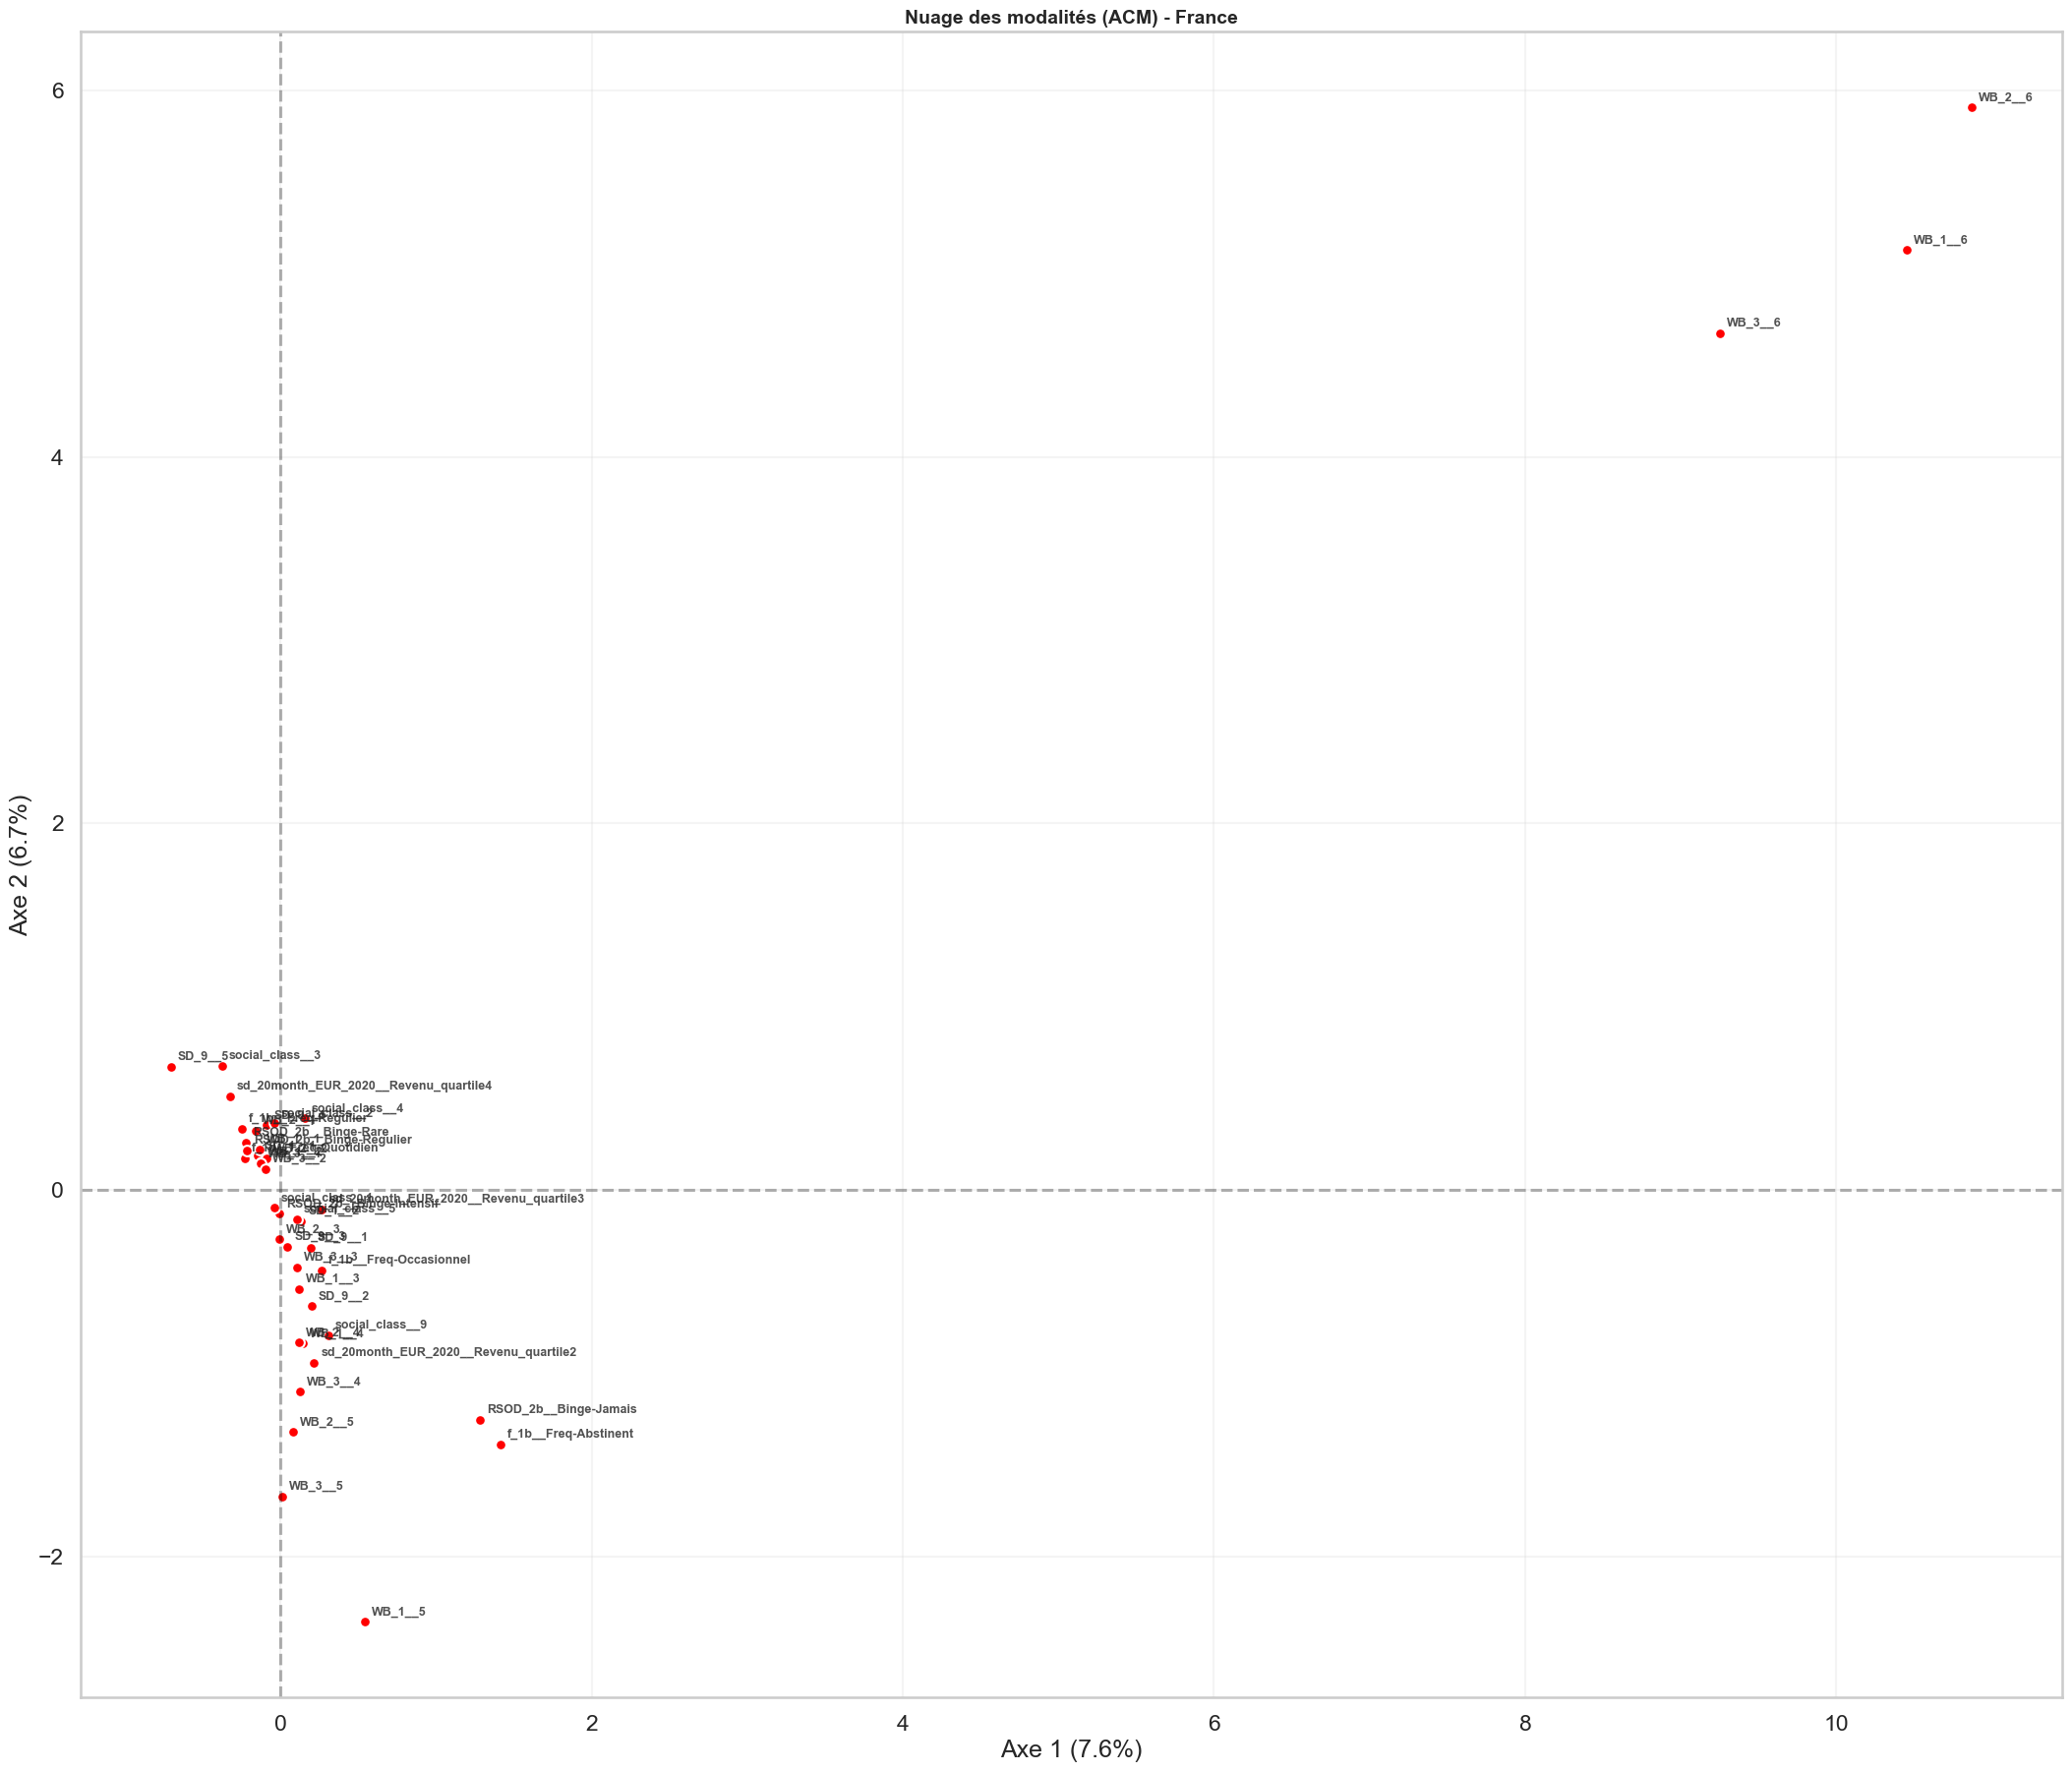

In [254]:
dtn.plot_modalites_acm_simple(df_acm,mca_fr, actives, "France")

On voit que les modalités 6 des variables wb_1à3 sont largement les plus à droite, et les modalités 1 à 5 semblent triées plus ou moins dans l'ordre mais sont beaucoup plus proches des unes des autres. Or la modalité 6 correspond pour ces variables à " I prefer not to answer". L'axe 1 sépare donc en majorité les individus qui souhaitent répondre sur leur état de santé ou psychologique ou relationnel de ceux qui ne répondent pas.
On remarque que l'axe 2 sépare les hauts salaires en haut des bas salaires en bas (puisque le 2ème quartile des revenus est le plus bas et les 3 et 4èmes plus hauts).
Il sépare aussi mais de façon moins tranchée les fréquences de consommation occasionnelle (modalité la plus basse de f_1b) de la consommation régulière (plus en haut).
L'axe 2 sépare aussi selon l'état de santé, psychologique et des relations sociales meilleur en haut et moins bon en bas.
Les modalités sur le binge drinking (RSOD_2b) nous semblent trop proches pour être interprétées.

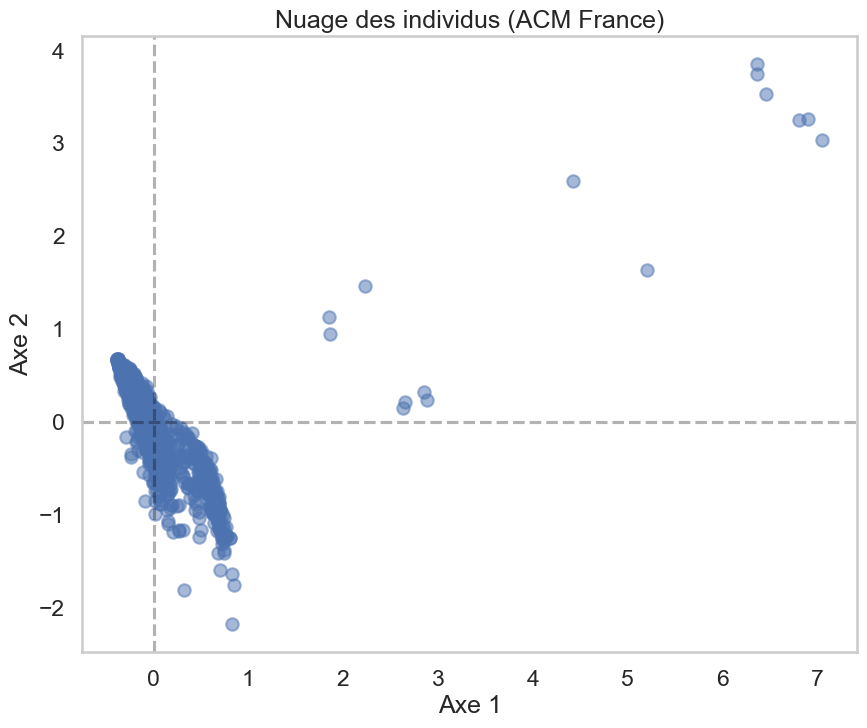

In [255]:
# Nuage des individus dans le plan des deux premiers axes de l'ACM
dtn.plot_individus_acm(mca_fr, df_acm, "France", actives)


Les individus isolés à droite de l'axe 1 sont des profils "atypiques", ils se distinguent non pas par leur mode de consommation, mais par leur refus de dévoiler leur état de santé ou psychologique ou de relations sociales. Cela participe sans doute à écraser le reste des données vers la gauche.


Voici l'interprétation de ton nuage des individus pour l'ACM France, basée sur les comportements que tu as identifiés (l'effet "non-réponse" sur l'axe 1 et le gradient socio-économique sur l'axe 2) :

La répartition en "peloton" par rapport à l'axe 2 permet (enfin) de cerner un tendance. Les individus situés dans la partie supérieure du nuage sont ceux qui cumulent les revenus les plus élevés (3ème et 4ème quartiles). Visuellement, on peut déduire que ce sont des profils plus "intégrés" socialement avec une consommation d'alcool régulière. L'aisance financière est corrélée à une consommation de routine et/ou sociale (car la fréquence de consommation d'alcool est plus haute et les répondants sont légèrement plus en haut à gauche vers les modalité plus "fair" "good", "very good" (respectivement 3,2,1) de l'état de vie social/sanitaire/psychologique). 
Inversement, les individus plus en bas du  nuage principal représente la tendance d'une consommation d'alcool moins fréquente avec des revenus plus faibles.

Enfin, on distingue un petit nuage au Sud-Est du principal sans doute tiré par les abstinents d'après le nuage des modalités.


### *ACM Bulgarie* ###

**NB :L'ACP de la Bulgarie, de la Pologne et de l'Islande sont disponibles en annexe mais puisque les résultats sont très similaires à ceux de la France, eux même décevant, nous n'en faisons pas l'interprétation.**

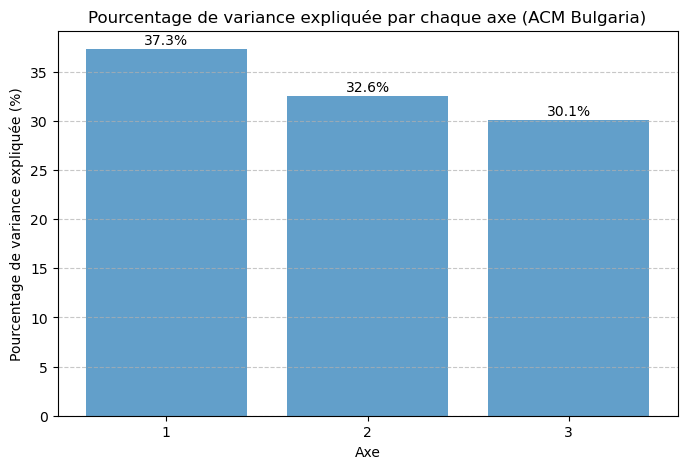

In [263]:
mca_bg = dtn.fait_acm(df_acm, "Bulgaria", actives)
dtn.plot_var_acm(mca_bg, "Bulgaria")

La première dimension explique 36% de la variance et la deuxième 33%, on se concentre sur ces deux là pour simplifier l'analyse (même si la troisième en explique aussi beaucoup).

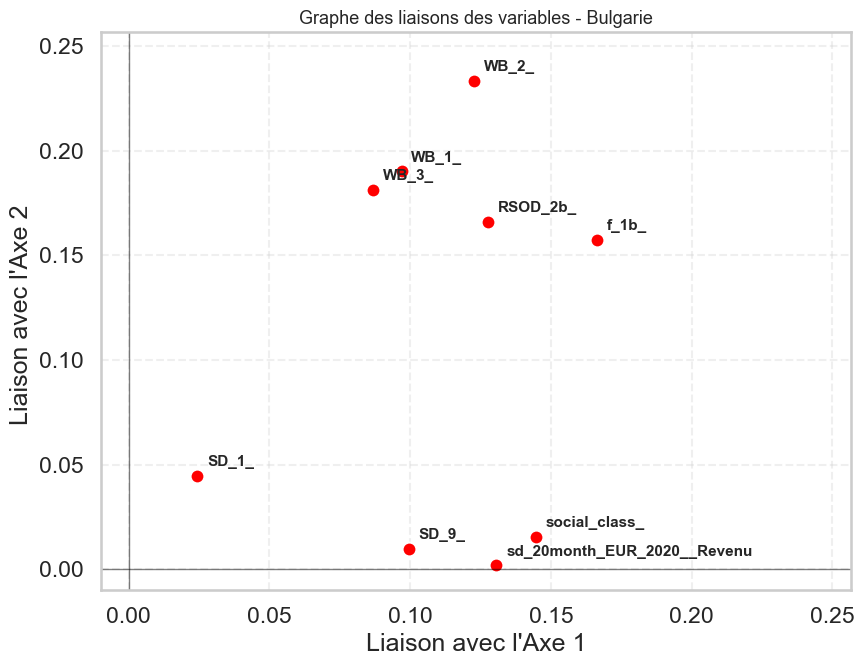

In [257]:
#graphe des contributions de chaque variables aux 2 premiers axes
dtn.tracer_graphe_liaisons(mca_bg, "Bulgarie")

Le premier axe est lié à beaucoup de variable mais pas très fortement, on retiendra qu'il est notamment bien représenté par la fréquence générique et de consommation excessive d'alcool (RSOD_2b et f_1b) et à la classe sociale, tandis que le second axe est surtout lié à la qualité de l'état psychologique (WB_2) et dans un second temps social et de santé (WB_1 et WB_3), voire à la fréquence de consommation d'alcool générique et binge de manière moins significative.

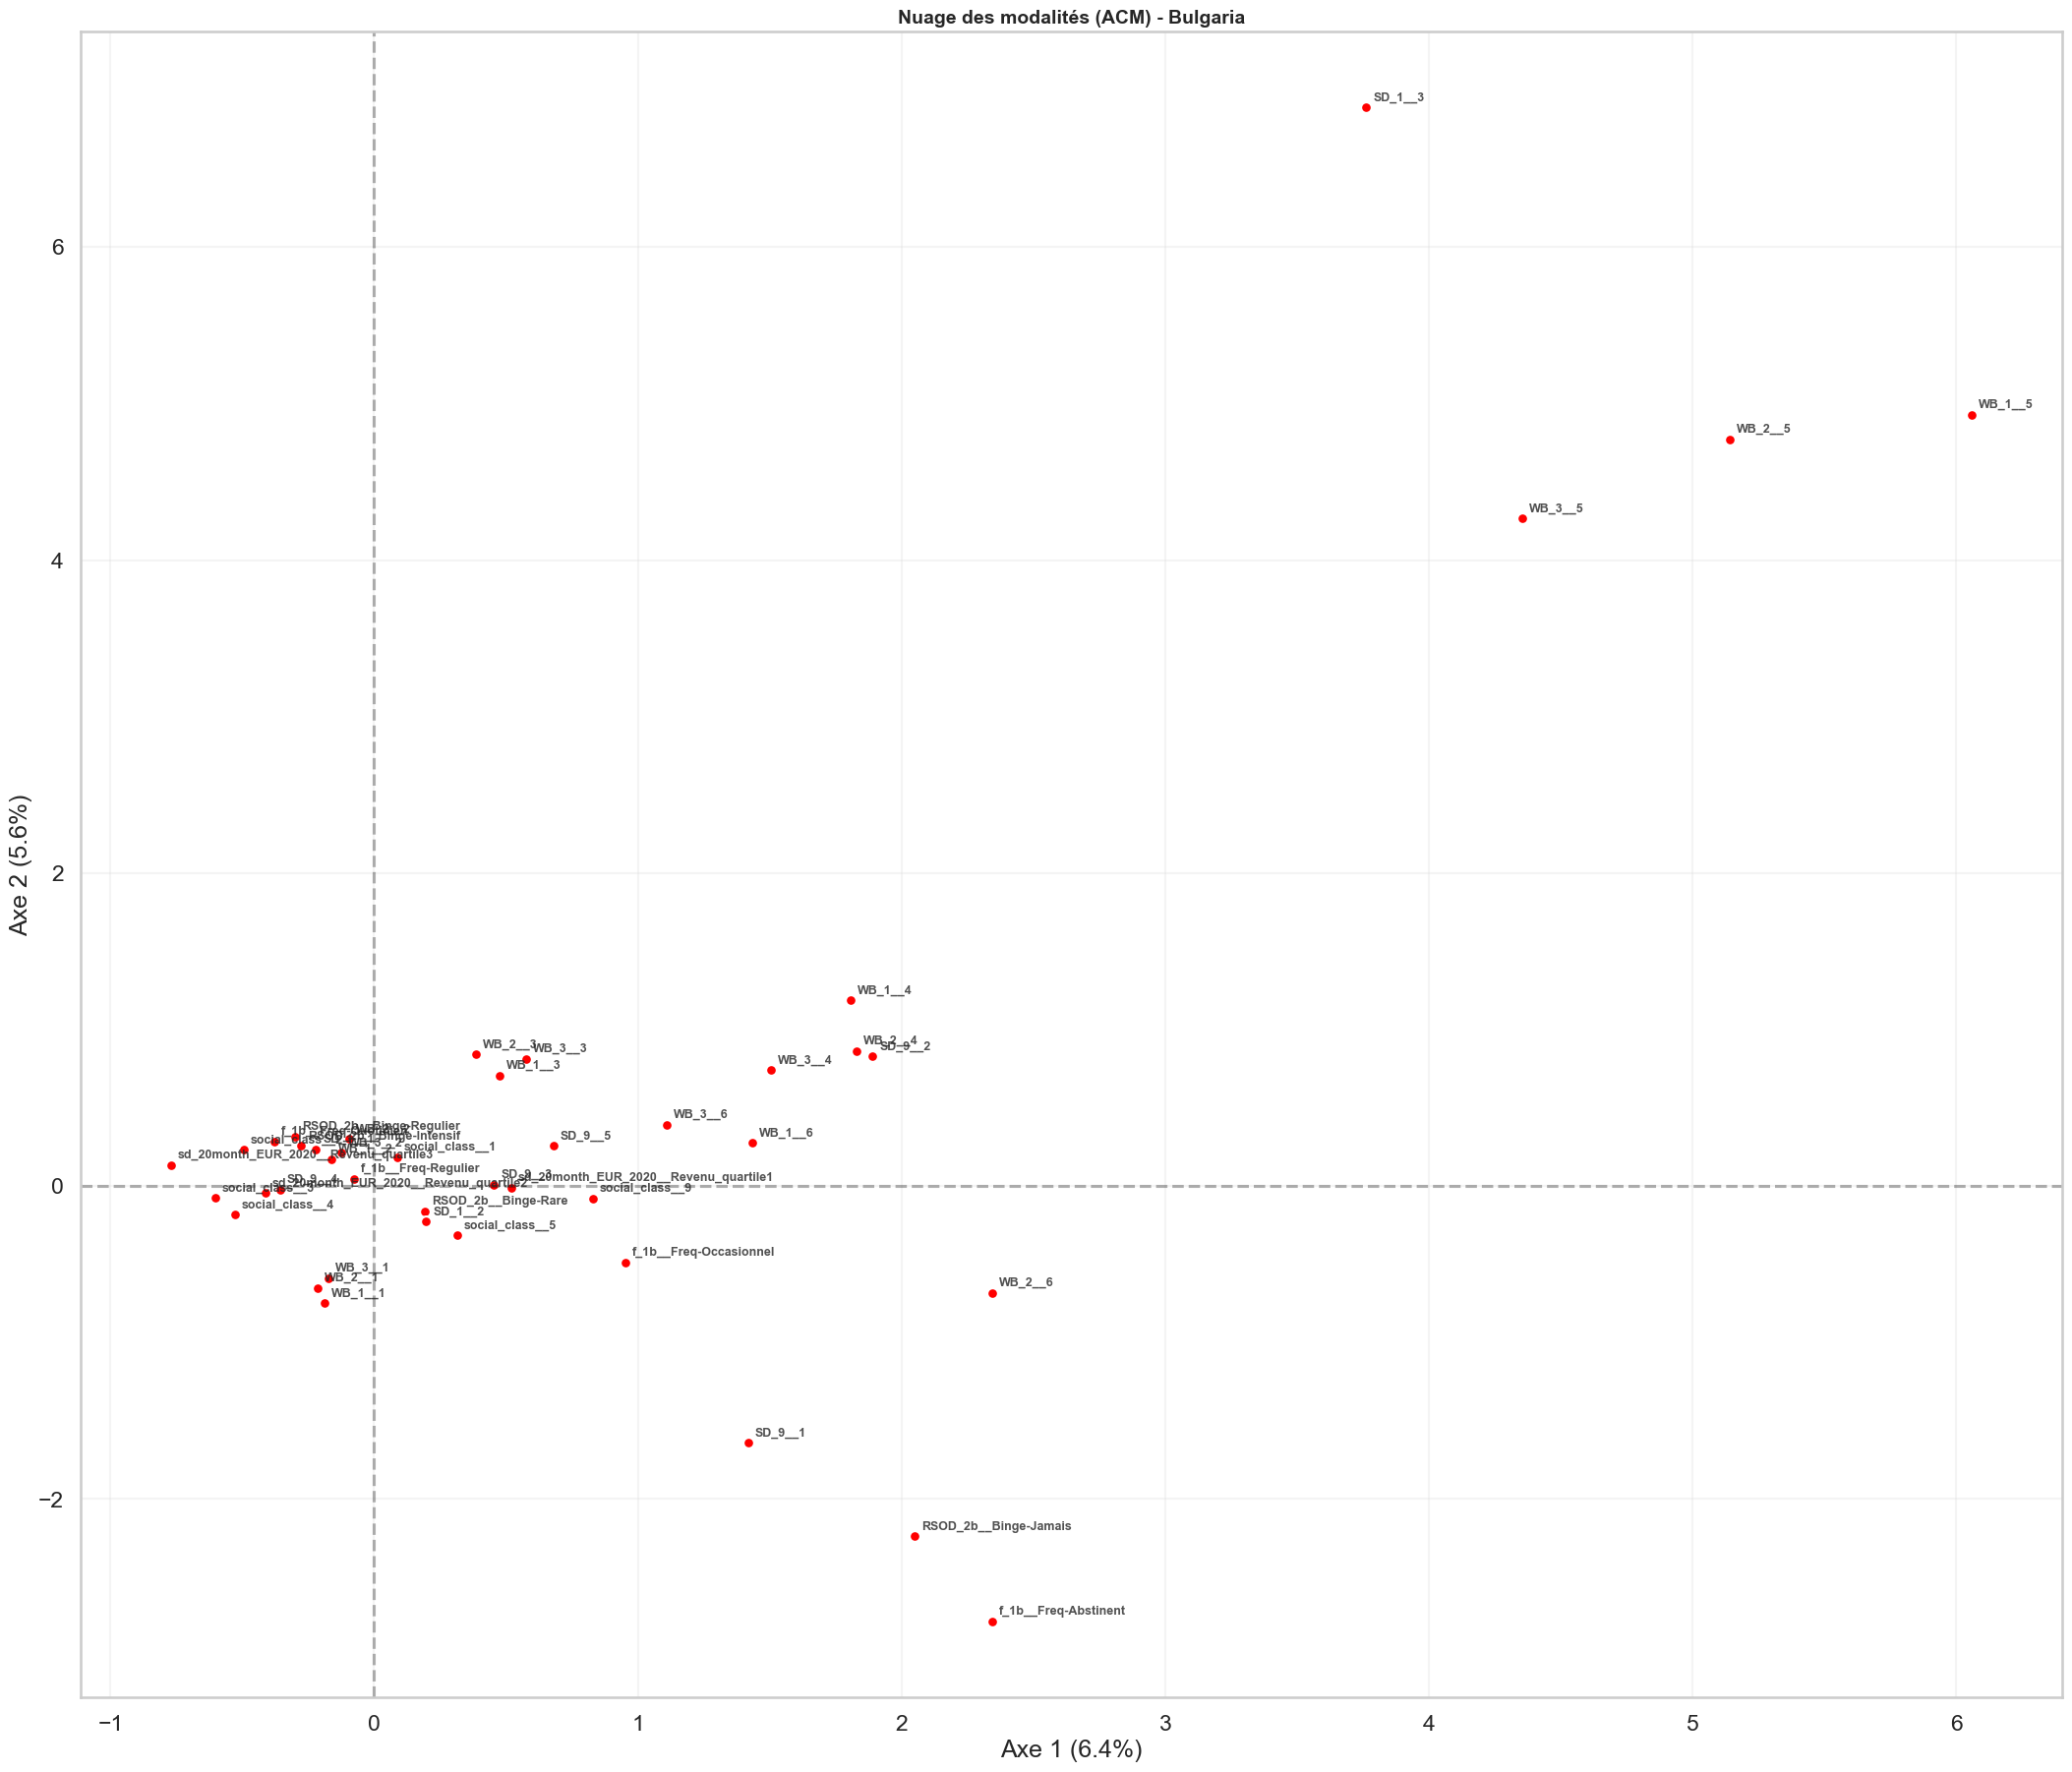

In [258]:
dtn.plot_modalites_acm_simple(df_acm,mca_bg, actives, "Bulgaria")

Le nuage des modalités nous montre que les tendances en haut à droite du graphe sont celles de la modalité 5 des variables WB_1à3 soit des "very bad" état psychologiques, de santé et de relation sociale. L'axe 1, comme l'axe 2 séparent donc les "very good" au centre, des "very bad" au Nord-Est pour ces variables.
Comme pour la France, la tendance pour la consommation se lit au Sud-Est pour les abstinent mais sur un axe plus prononcé suivant la 4ème bissectrice (axe Sud-Est/ Nord-Ouest), où plus on est au Nord-Ouest, plus la fréquence de consommation est régulière et dans une moindre mesure, plus le binge drinking est aussi régulier.
Sur l'axe 1, la distribution des modalités pour les classes sociales est moins prononcée même si les "cols blancs" (social_class_2) et les "business person"(social_class_4) sont plus à gauche et les non répondnats et "other" (social_class_5 et 9) sont plus à droite. Les modalités des revenus représentent des revenus plus élevés à gauche qu'à droite de l'axe 1.

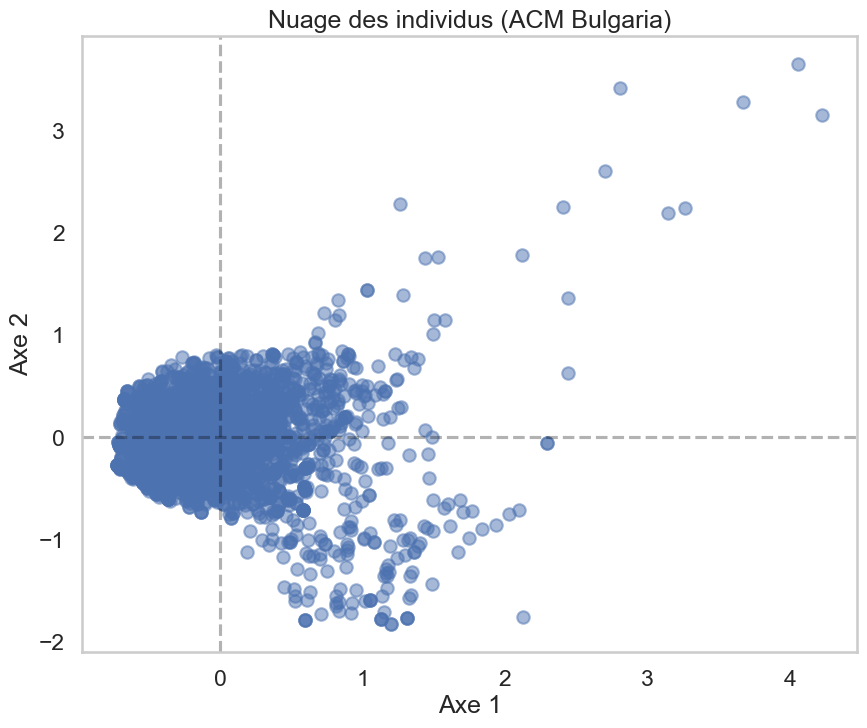

In [259]:
# Nuage des individus dans le plan des deux premiers axes de l'ACM
dtn.plot_individus_acm(mca_bg, df_acm, "Bulgaria", actives)

Le nuage des individus forme une masse centrale de points répartis de façon assez homogène, cela indique que les variables utilisées pour l'analyse ne parviennent pas à structurer des groupes d'individus distincts.

On observe bien une trainée d'individus rares vers le Nord-Est qui sont typiques des individus ayant un mauvais état de santé général ou psychologique ou de relation social. Cependant comme WB_1à3 sont bien représentés sur les 2 premiers axes il est difficile de dire si ces individus sont aussi tirés vers cette direction par d'autres variables et notamment la consommation d'alcool.

Comme pour la France, on observe une autre trainée d'individu vers le Sud-Est représentatifs des profils abstinent qui sont sans doute tiré vers la droite par leur mauvais état de santé ou de qualité relationnelle.

Finalement, la forme du nuage suggère que les liens entre santé, revenus/classe sociale et alcool sont plus hétérogènes en Bulgarie qu'en France. De plus, la mauvaise santé ou la mauvaise qualité des relations sociales semblent être des facteurs de différenciations beaucoup plus puissant chez les Bulgares que chez les Français.

### *ACM Islande* ###

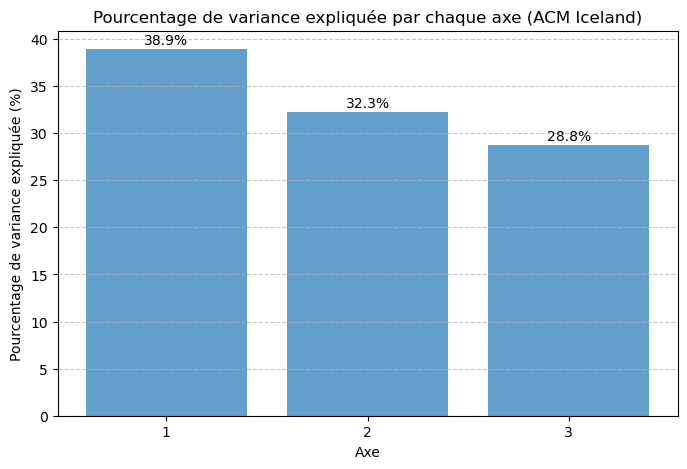

In [262]:
mca_ic = dtn.fait_acm(df_acm, "Iceland", actives)
dtn.plot_var_acm(mca_ic, "Iceland")

Comme avant, on se concentre sur les deux premières dimensions.

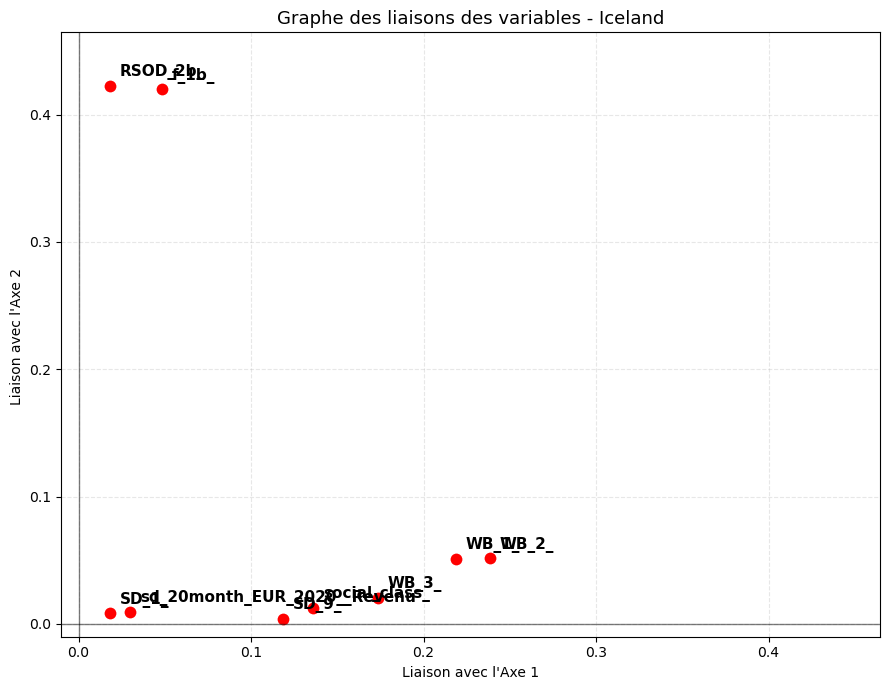

In [87]:
#graphe des contributions de chaque variables aux 2 premiers axes
dtn.tracer_graphe_liaisons(mca_ic, "Iceland")

Les WB_1à3 sont toujours les variables les plus liées au premier axe, suivies par la classe sociale et le niveau d'éducation (SD_9). 
Ce qui change c'est que RSOD_2b et f_1b, la fréquence de binge drinking et de consommation d'alcool sont très liées au second axe et qu'aucune autre variable n'y est vraiment liée.

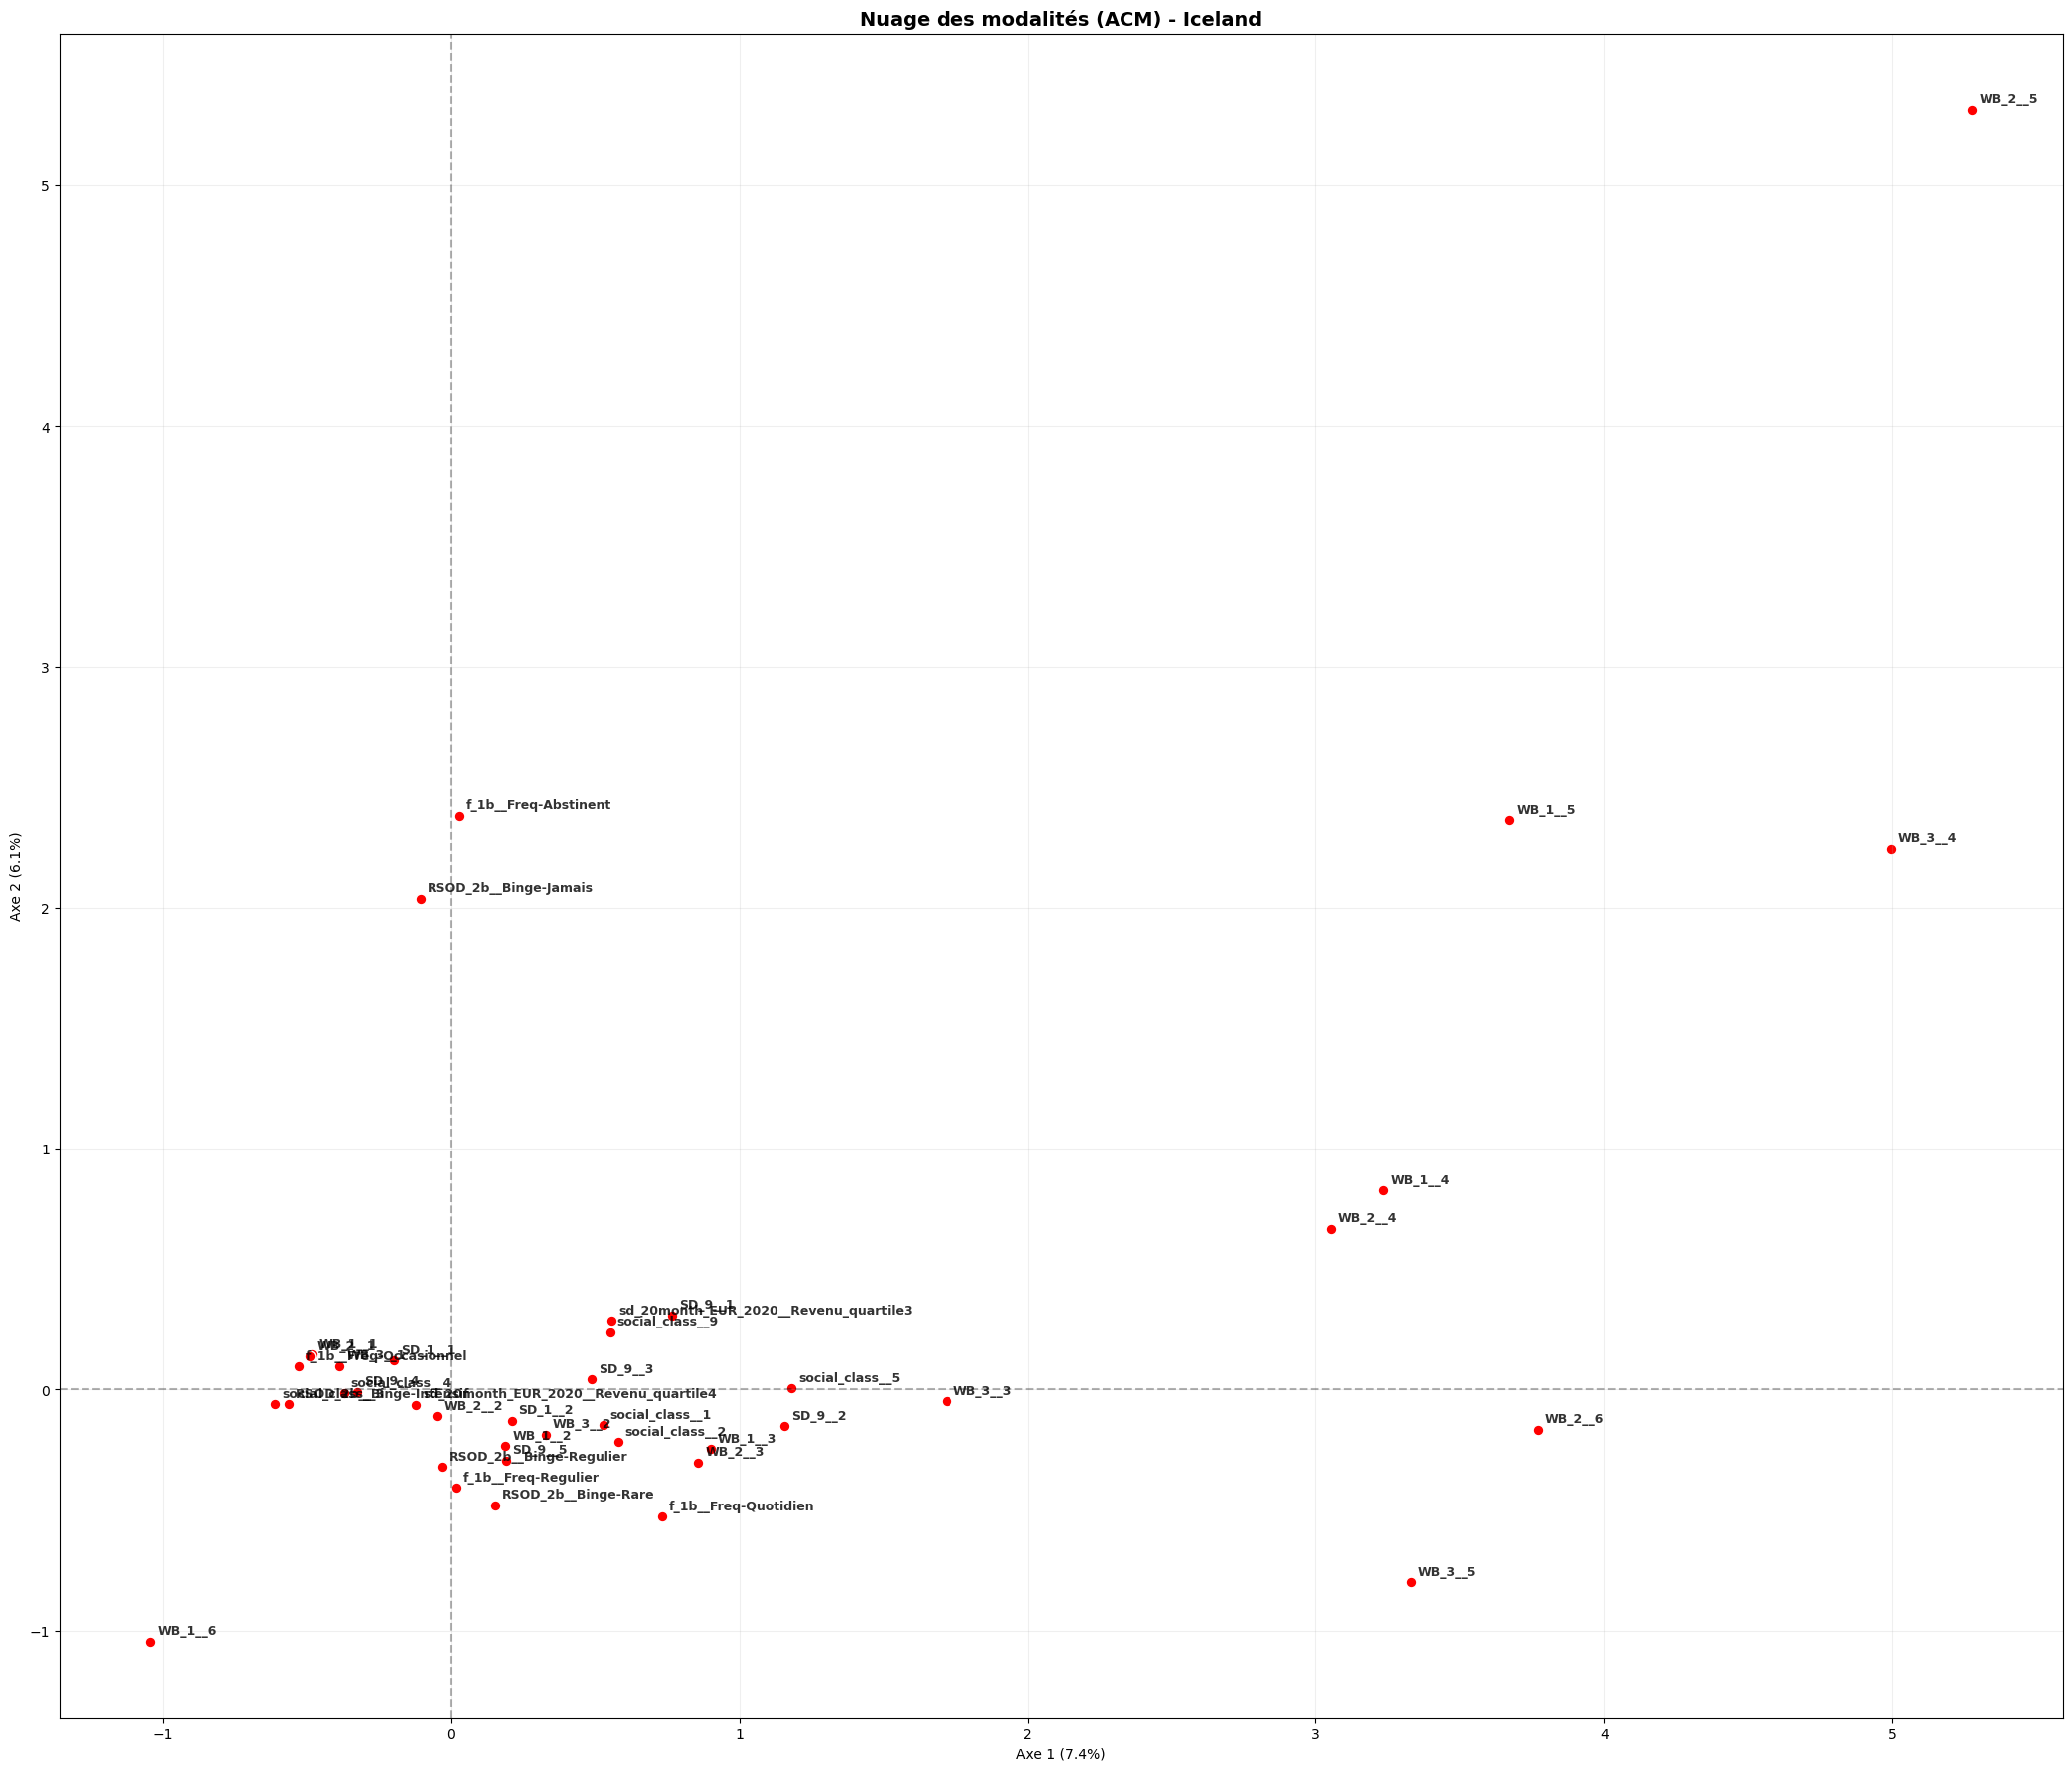

In [89]:
dtn.plot_modalites_acm_simple(df_acm,mca_ic, actives, "Iceland")

Les modalités de fréquence de consommation d'alcool se répartissent de bas (les abstinents) en haut( les consommateurs quotidiens).
Les modalités de fréquence de binge drinking sont moins ordonnées (binge rare en dessous de binge jamais mais aussi en dessous de binge intensif et régulier). 
On peut donc penser que le Binge drinking n'est pas vraiment caractéristique d'un type de consommateur d'alcool en terme de fréquence générique (puisque les deux sont très liés à l'axe 2 et que la fréquence est, elle, ordonnée).

Les niveaux d'éducations sont aussi répartis aussi d'une manière non ordonnée (difficilement interprétable). 
Les mauvais états de santé, de psychologie et de relation social sont généralement plus à droite et les bons plus à gauche.

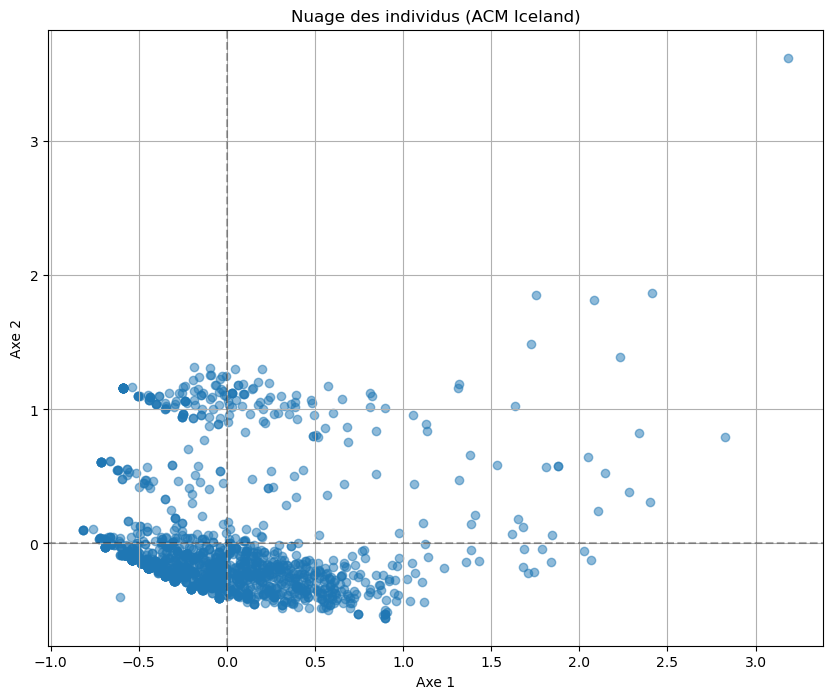

In [90]:
# Nuage des individus dans le plan des deux premiers axes de l'ACM
dtn.plot_individus_acm(mca_ic, df_acm, "Iceland", actives)

Rappel: L'axe horizontal sépare les individus selon leur qualité de vie déclarée.
L'axe vertical les sépares selon leur rapport à l'alcool.

La forme applatie et horizontale du nuage principol semble indiquer que peu importe le ressenti en terme d'état de santé/psychologique ou de relation social, tant qu'il reste dans des proportions raisonnables, la consommation des islandais est relativement similaire. Un second nuage, plus petit et translaté vers le haut semble indiquer qu'une part des islandais interrogés consomment un peu plus d'alcool que la population générale mais garde le même profil.

Cette ACM nous permet de dire que la consommation d'alcool des islandais ne varie que peu en fonction des caractéristiques socio-économiques et psychologiques.

### *ACM Pologne* ###

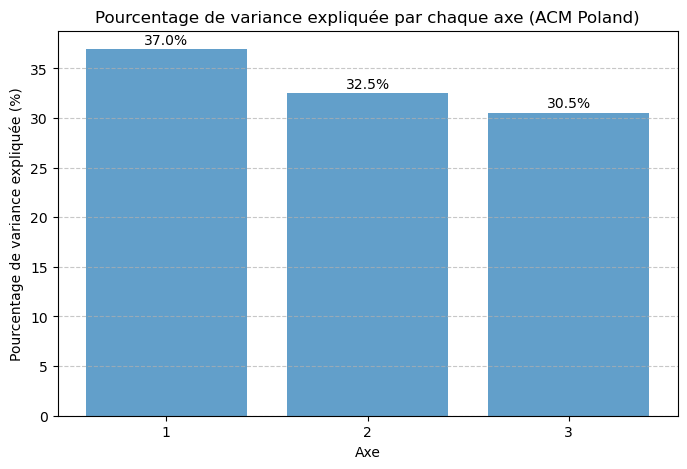

In [265]:
mca_pl = dtn.fait_acm(df_acm, "Poland", actives)
dtn.plot_var_acm(mca_pl, "Poland")

Comme avant, on se concentre sur les deux premières dimensions.

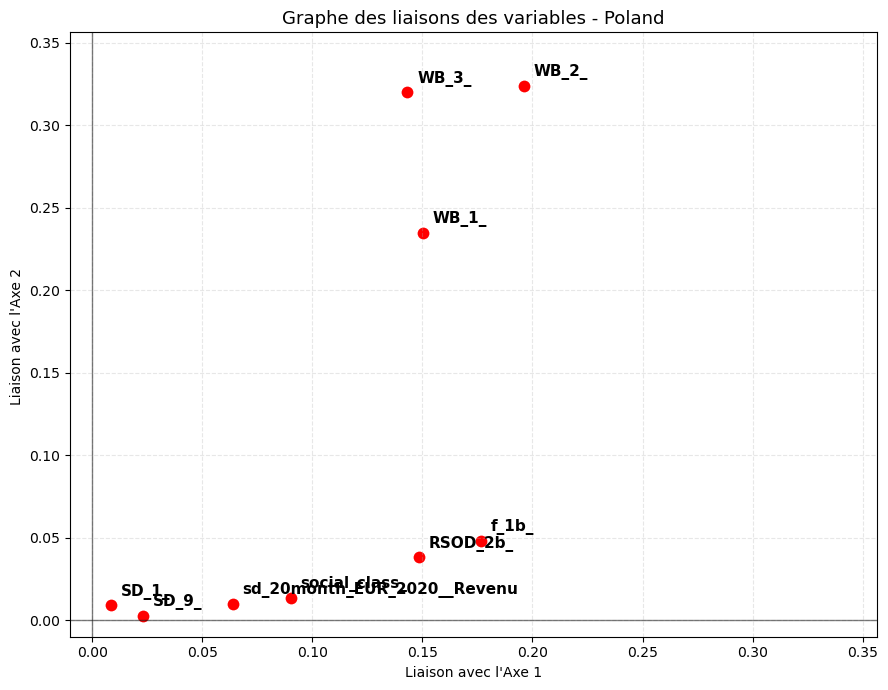

In [266]:
#graphe des contributions de chaque variables aux 2 premiers axes
dtn.tracer_graphe_liaisons(mca_pl, "Poland")

L'axe 1 est lié à de nombreuses variables mais pas très fortement: l'état de santé/ psychologique et social, le revenu, le binge drinking et la fréquence de consommation d'alcool.
L'axe 2 est plutôt lié à l'état de santé/ psychologique et social et très peu aux autres variables.

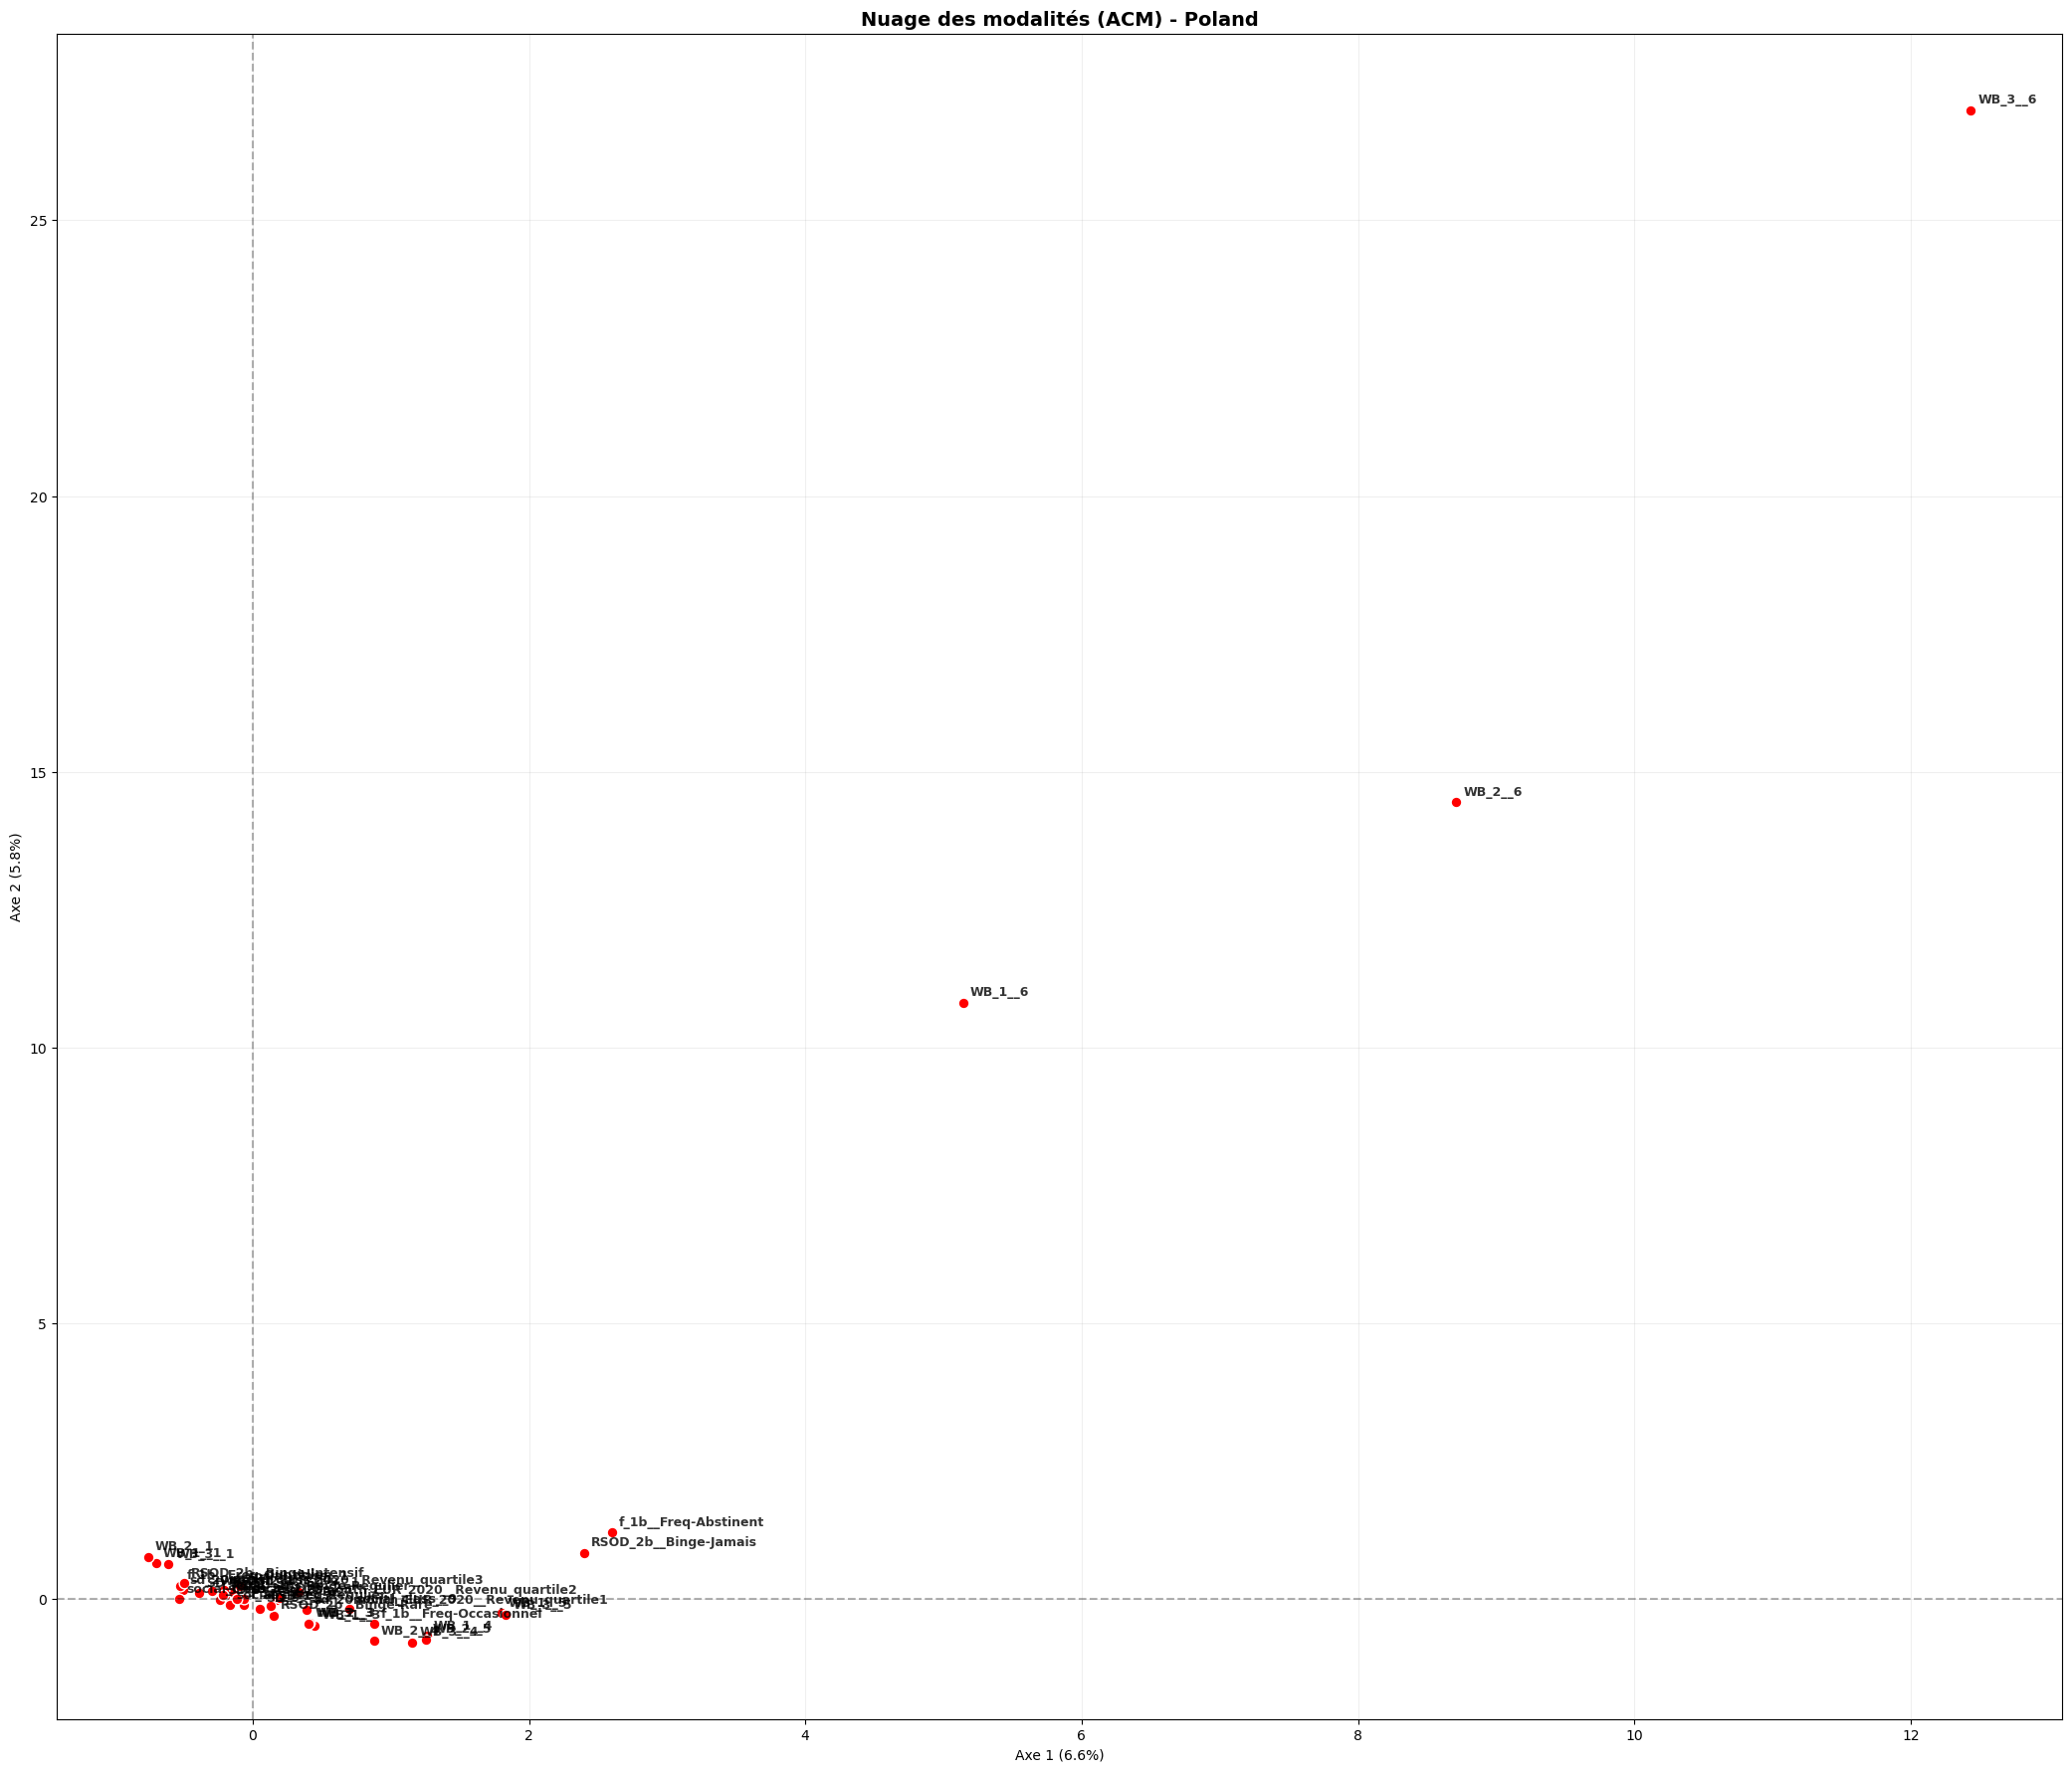

In [267]:
dtn.plot_modalites_acm_simple(df_acm,mca_pl, actives, "Poland")

Les modalités sont toutes très ramassées sans doute dû à l'écrasement induis par les non répondants aux variables WB_1à3 (code 6). Dans le prochain plot, on recentre donc le nuage des modalités sur le centre pour mieus les visualiser.

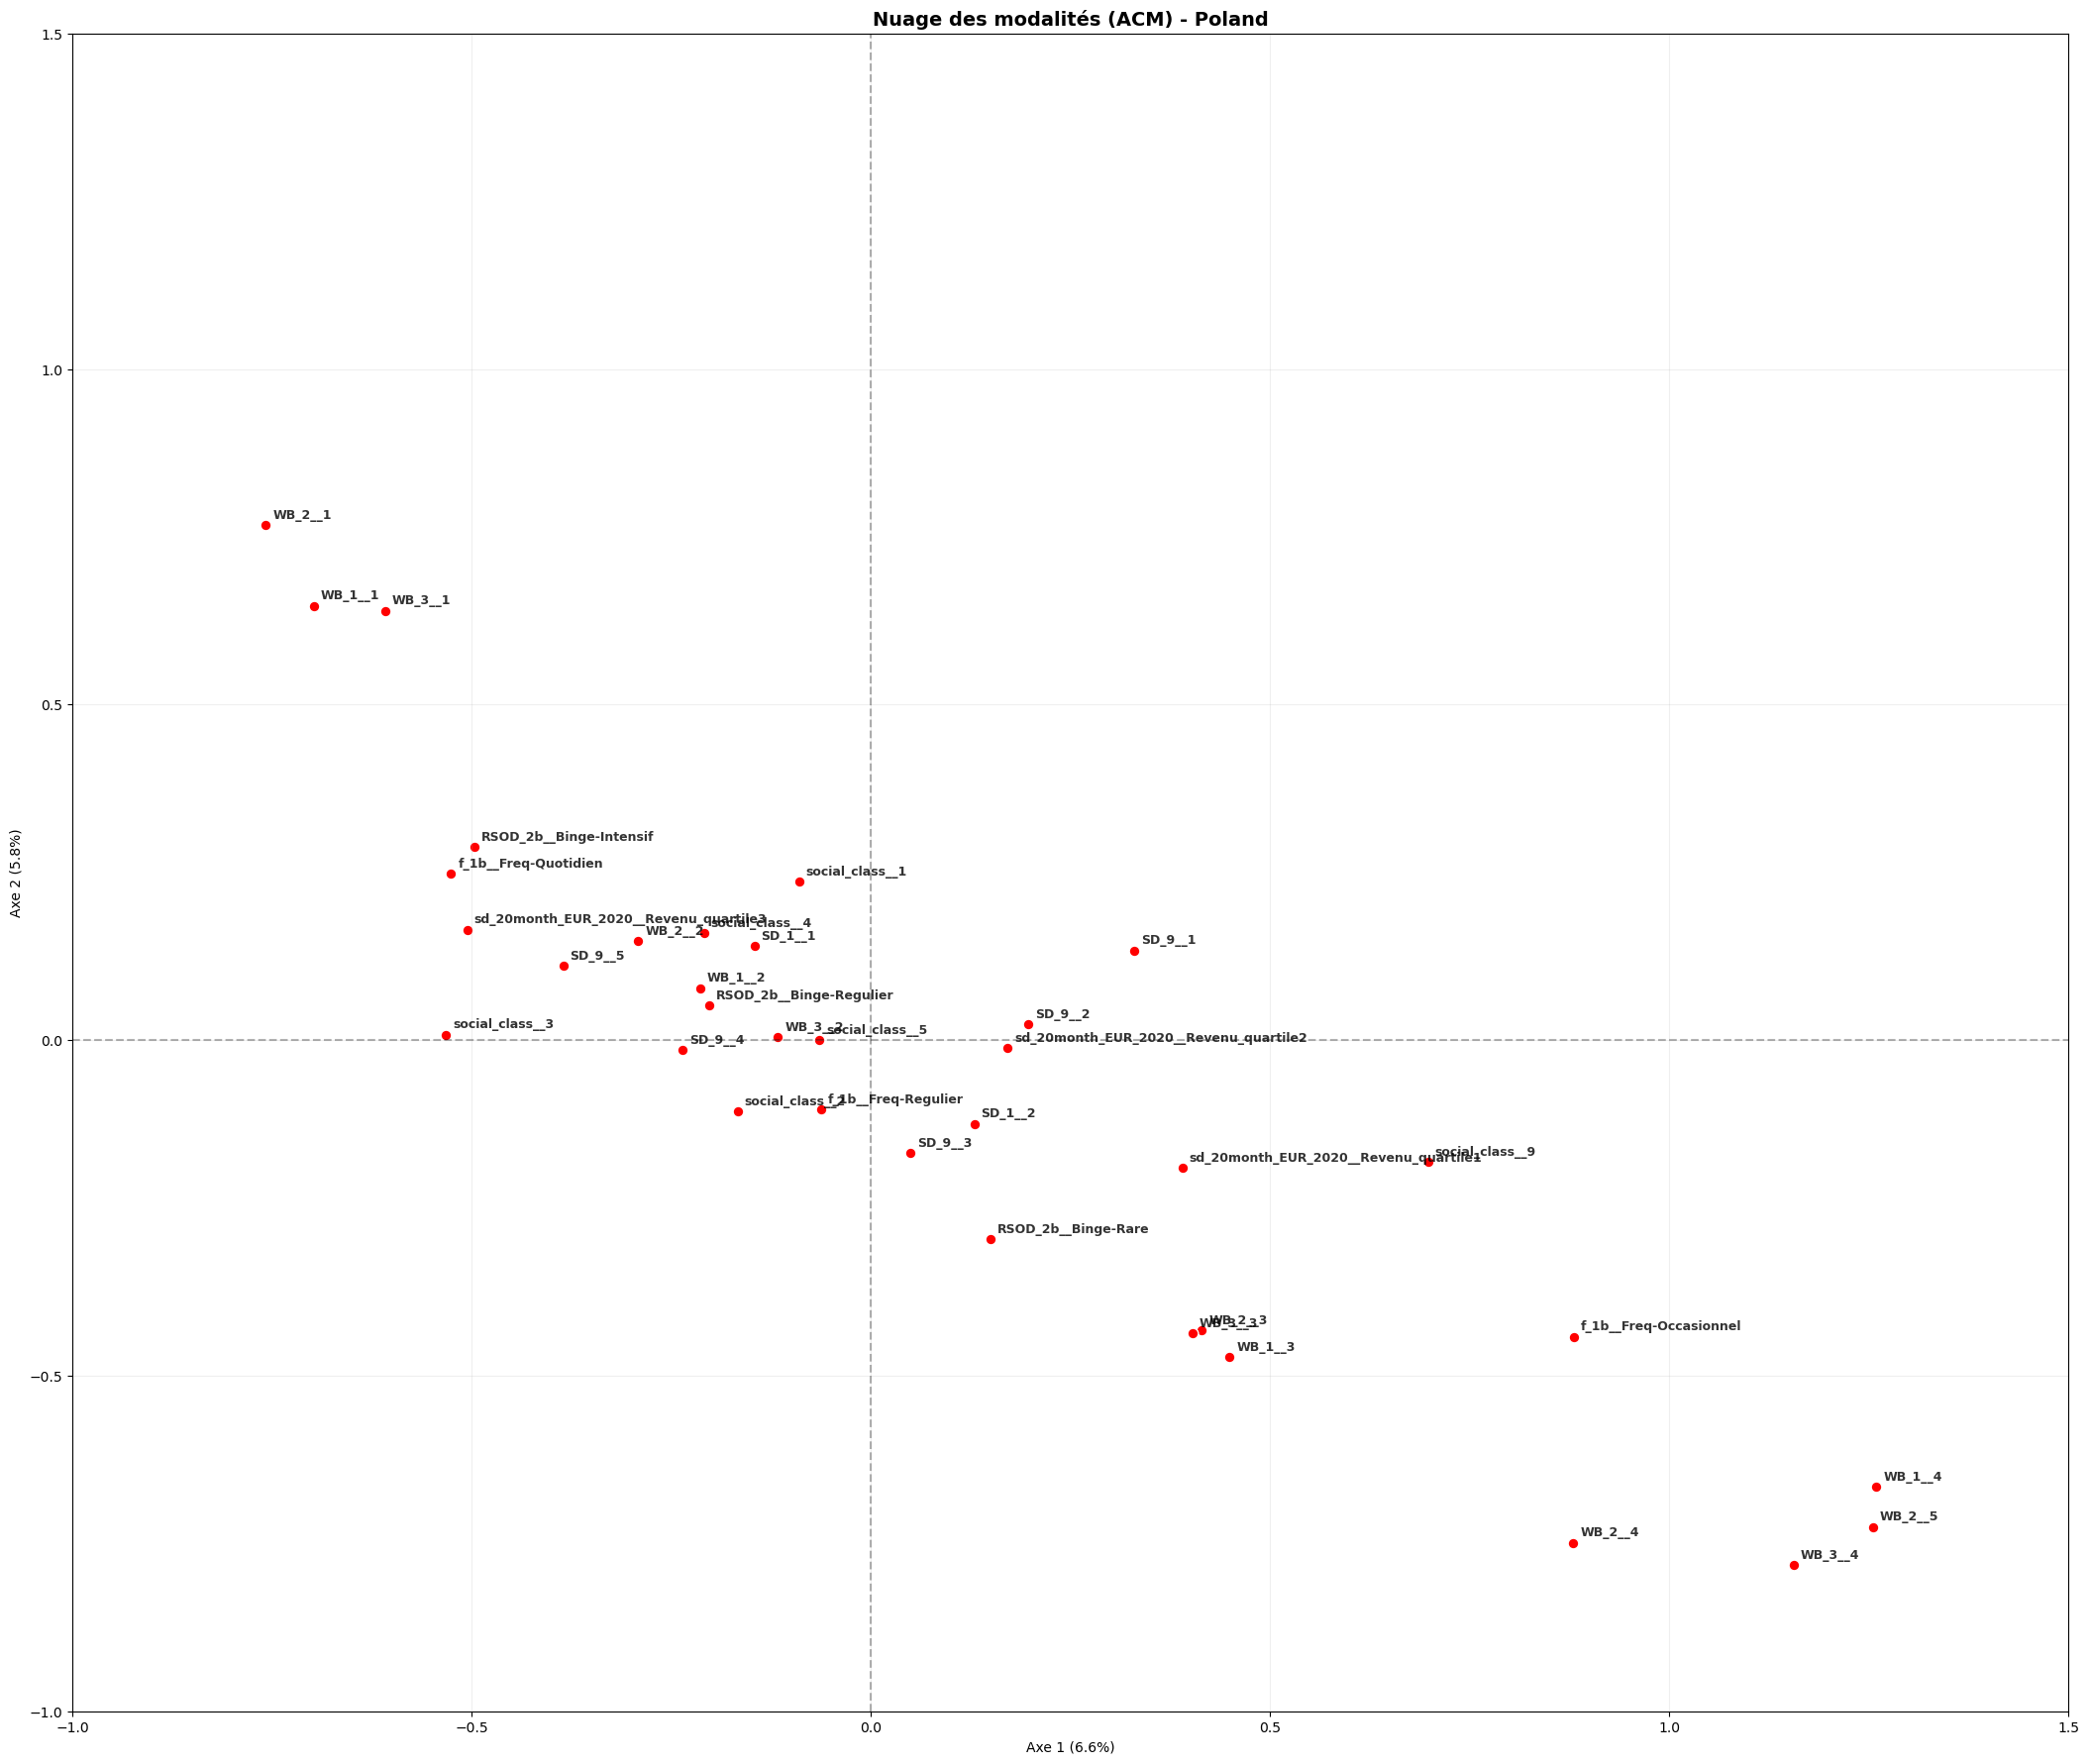

In [268]:
dtn.plot_modalites_acm_simple(df_acm,mca_pl, actives, "Poland", xlim=(-1, 1.5), ylim=(-1, 1.5))

On voit que sur l'axe Nord-Ouest / Sud-Est, les nivaux de salaires, la fréquence de consommation d'alcool et de Binge drinking et l'état de santé/ psychologique et d'épanouissement social est croissant en allant vers le Nord-Est. (La tendance pour les classes sociales n'est pas nette, on ne l'interpetera pas).

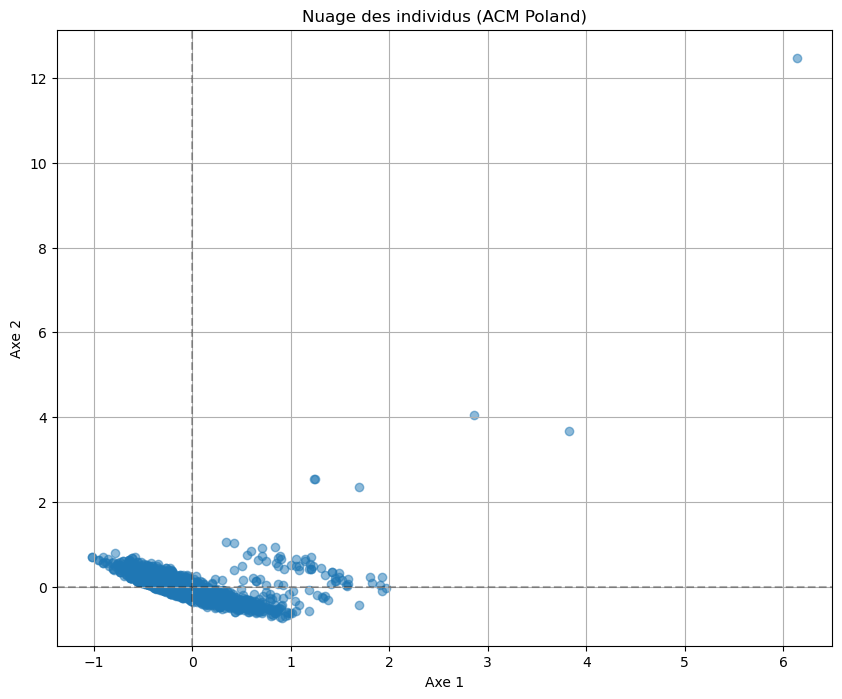

In [269]:
# Nuage des individus dans le plan des deux premiers axes de l'ACM
dtn.plot_individus_acm(mca_pl, df_acm, "Poland", actives)

Le nuage polonais se distingue par une forte cohérence interne : les dimensions économique, sanitaire et comportementale convergent vers une seule diagonale très dense.

Le profil type du consommateur polonais régulier (au Nord-Ouest) est celui d'un individu aisé et en bonne santé, tandis que les plus basses consommations (au Sud-Est) sont statistiquement associée à des indicateurs de bien-être et de revenus plus faibles. Il faut cependant s'interroger, comme pour la France, sur le rôle des non répondants aux variables WB_1à3 qui, comme vue sur le nuage des modalités, participent sans doute à créer une forme plus condensée et linéaire et à surinterpréter la cohérence des profils.

&nbsp;
<a id="partie3"></a>
# Partie III : Modélisation

### Méthodologique : Sélection des Variables Significatives

Afin d'identifier les déterminants spécifiques de la consommation d'alcool pour chaque pays, nous avons adopté une méthodologie de **régression linéaire multiple** avec une procédure de sélection de variables par **élimination descendante (Backward Elimination)**.

Pour chaque pays, la procédure s'initialise par l'ajustement d'un modèle saturé incluant l'ensemble des variables explicatives potentielles. À chaque itération, la significativité statistique de chaque co-variable est évaluée via le **test de Student**. La variable présentant la p-value la plus élevée supérieure au seuil critique fixé à **$\alpha = 0.05$** (et modifiable par argument d'une fonction) est retirée du modèle.Ce dernier est ensuite réajusté sur les variables restantes. 

Ce processus itératif est répété jusqu'à convergence, c'est-à-dire jusqu'à l'obtention d'un modèle final où tous les coefficients conservés sont **statistiquement significatifs**. Cette approche permet d'isoler les facteurs de risque propres à **chaque contexte national**.

In [270]:
import imputation as imp
from regression import regression_iterative, regression_pays,afficher

In [271]:
variables_explicatives= [
    'SD_1',  # Genre
    'SD_2',  # Age
    'SD_4',  # Statut marital
    'SD_6',  # Taille ménage
    'SD_7',  # Mineurs
    'SD_8',  # Urbanisation
    'SD_9',  # Education
    'SD_10', # Activité pro
    "sd_20month_EUR_2020", # Revenu 
    "social_class", # Classe sociale
    "CH_1",  # Histoire familiale alcool
    "WB_1",  # Santé physique
    "WB_2",  # Santé mentale
    "WB_3"   # Satisfaction relationnelle
]
resultat = regression_iterative(
    df=data, 
    target_col='bsqf_alc', 
    all_feature_cols=variables_explicatives, 
    country_col='COUNTRY', 
    liste_pays=['France', 'Poland', 'Bulgaria', 'Iceland'],
    seuil_pvalue=0.05)

Démarrage de la sélection Stepwise pour 4 pays...  Pays : coef (p_value) 



### Rapport d'Analyse des Déterminants de la Consommation d'Alcool (Approche Prudente)

### 1. Préambule Méthodologique

Les modèles de régression linéaire ci-dessous présentent des coefficients de détermination () faibles, variant de **0,4 % (Bulgarie)** à **6,7 % (Islande)**.

* **Signification :** Les variables socio-démographiques et de bien-être expliquent une part très marginale de la variance de la consommation totale. La consommation d'alcool est donc un comportement très hétérogène, influencé par des facteurs non observés ici (habitudes culturelles, prix, génétique, contexte social immédiat).
* **Portée :** L'échantillon n'étant pas statistiquement représentatif des populations nationales, les résultats suivants décrivent des **corrélations internes à la base de données** et ne doivent pas être généralisés sans réserve à l'ensemble de ces pays.

### 2. Analyse Détaillée 

#### Bilan Global de la Modélisation 

L'analyse des résultats issus de la sélection stepwise mets en évidence deux constats pour l'interprétation : 

* **Un pouvoir explicatif marginal ($R^2$)** : Les coefficients de détermination sont compris entre 0,004 (Bulgarie) et 0,067 (Islande). nous observons que les variables socio-démographiques et de bien-être expliquent une part très faible de la variance (moins de 7 % dans le meilleur des cas, et moins de 1 % pour la Bulgarie). Cela signifie que la consommation volumique d'alcool est un comportement complexe, qui échappe en grande partie aux déterminants sociologiques classiques (âge, sexe, situation familiale).
* **L'absence du revenu** : La variable financière sd_20month_EUR_2020 (Revenu du ménage) a été éliminée par l'algorithme pour l'ensemble des pays, ne franchissant pas le seuil de significativité. Cela veut dire que le niveau de richesse pure n'est pas un prédicteur direct du volume d'alcool consommé.

#### France 

Au sein de l'échantillon français, la consommation semble structurée par des déterminants "classiques" et une variable historique forte.

* **Genre (`SD_1`) :** Avec un coefficient négatif significatif (-301,71), cela signifie que les hommes consommes significativement plus d'alcool que les femmes dans ce groupe.
* **Hérédité sociale (`CH_1`) :** C'est une spécificité marquante des répondants français. La variable "Avoir vécu enfant avec un buveur excessif" (1=Oui, 2=Non) a un coefficient négatif (-360,84). Cela indique que les répondants n'ayant **pas** été exposés à l'alcoolisme familial durant l'enfance consomment significativement moins aujourd'hui.
* **Classe sociale (`social_class`) :** Le coefficient négatif (-34,84) suggère un effet protecteur du statut social : à mesure que l'on s'élève dans la catégorie (de ouvrier vers cadre), le volume déclaré tend à diminuer légèrement.

#### Pologne 
Les répondants polonais présentent des écarts de consommation très brutaux en fonction de leur environnement.

* **Genre (`SD_1`) :** L'effet du genre est massif (-2327,88), bien plus fort qu'en France. Dans cet échantillon, la consommation déclarée est très majoritairement masculine.
* **Urbanisation (`SD_8`) :** Le coefficient positif (+1389,14) indique une corrélation entre la taille de la ville et la consommation. Les répondants des grandes agglomérations déclarent boire davantage que ceux des zones rurales.


* **Structure familiale (`SD_7`) :** La présence de mineurs au foyer est associée positivement à la consommation (+1389,14). Ce résultat contre-intuitif (on s'attendrait à ce que les parents boivent moins) pourrait refléter dans cet échantillon spécifique une consommation domestique plus ancrée ou un profil de répondants plus âgés/installés qui consomment davantage que les jeunes adultes sans enfants.

#### Bulgarie 
Le modèle est extrêmement faible, ce qui indique que pour les répondants bulgares, les variables classiques (âge, sexe) ne prédisent rien. Seule la structure du foyer joue un rôle.

* **Isolement (`SD_6`) :** Le coefficient très négatif (-4660,17) sur la variable "Taille du ménage" (1=Seul, 2=Plusieurs) est crucial. Il indique que le passage de la vie en solo à la vie en groupe fait chuter la consommation. **Dans cet échantillon, les personnes vivant seules sont celles qui déclarent les plus gros volumes.**
* **Statut marital (`SD_4`) :** Le coefficient négatif (-1296,28) montre que les mariés (code 1) consomment plus que les autres statuts (codes élevés). Cela dessine une dichotomie chez les répondants bulgares : une consommation forte chez les isolés, mais aussi une consommation importante chez les couples mariés traditionnels.
* **Éducation (`SD_9`) :** L'éducation agit comme un frein (-2397,77) : les répondants les plus diplômés déclarent des volumes plus faibles.

#### 🇮🇸 Islande : Le lien Santé-Consommation ()

L'échantillon islandais est le mieux expliqué par le modèle, grâce à l'introduction des variables de santé.

* **Le Mal-être (`WB_1`, `WB_2`) :** Les coefficients sont positifs. Puisque les échelles de santé vont de 1 (Très bon) à 5 (Très mauvais), un coefficient positif signifie que **plus la santé physique et mentale déclarée est mauvaise, plus la consommation d'alcool est élevée**. L'alcool apparaît ici corrélé au mal-être.


* **Statut Marital (`SD_4`) :** Contrairement à la Bulgarie, le coefficient positif (+45,35) indique ici que ce sont les personnes seules, divorcées ou veuves (codes élevés) qui consomment plus que les personnes mariées (code 1).
* 
**Éducation (`SD_9`) :** Comme en Bulgarie, un niveau d'éducation élevé est associé à une consommation moindre (-42,52).


### 3. Synthèse Comparative

L'analyse de ces données non-représentatives permet néanmoins de dégager **quatre profils de corrélation** distincts au sein de l'étude :

1. **Le profil socio-culturel (France) :** Où la consommation est liée au genre et à l'histoire familiale.
2. **Le profil environnemental (Pologne) :** Où le lieu de vie (ville) et la composition du foyer (enfants) sont déterminants.
3. **Le profil "Solitaire" (Bulgarie) :** Où vivre seul est le facteur de risque statistique le plus fort identifié.
4. **Le profil "Symptomatique" (Islande) :** Où la consommation est significativement corrélée à une mauvaise auto-évaluation de la santé physique et mentale.

*Note de prudence finale : Ces résultats soulignent des associations statistiques au sein des répondants enquêtés. Ils ne permettent pas d'établir de causalité directe ni de décrire les habitudes de la population générale de ces pays.*

<a id="annexes"></a>
# Annexes

Annexes Partie de la partie II

In [272]:
print("matrice des corrélations ACP France")
matrice_fr = dtn.obtenir_matrice_pca(data, "France", quanti.columns)
matrice_fr


matrice des corrélations ACP France


SD_2      SD_7  sd_20month_EUR_2020  bsqf_alc  \
SD_2                 1.000596 -0.202580             0.127745 -0.043799   
SD_7                -0.202580  1.000596             0.058183  0.083295   
sd_20month_EUR_2020  0.127745  0.058183             1.000596  0.020459   
bsqf_alc            -0.043799  0.083295             0.020459  1.000596   
cbsqf_beer          -0.081333  0.086820             0.008664  0.881673   
cbsqf_spir          -0.058563  0.052204            -0.000607  0.700625   
cbsqf_wine           0.062788  0.043114             0.029069  0.667198   

                     cbsqf_beer  cbsqf_spir  cbsqf_wine  
SD_2                  -0.081333   -0.058563    0.062788  
SD_7                   0.086820    0.052204    0.043114  
sd_20month_EUR_2020    0.008664   -0.000607    0.029069  
bsqf_alc               0.881673    0.700625    0.667198  
cbsqf_beer             1.000596    0.463107    0.387182  
cbsqf_spir             0.463107    1.000596    0.342601  
cbsqf_wine             0.387182    0.342601    1.000596

In [273]:
print("matrice des corrélations ACP Bulgarie")
matrice_bg = dtn.obtenir_matrice_pca(data, "Bulgaria", quanti.columns)
matrice_bg

matrice des corrélations ACP Bulgarie


SD_2      SD_7  sd_20month_EUR_2020  bsqf_alc  \
SD_2                 1.000334 -0.143752             0.032778 -0.013679   
SD_7                -0.143752  1.000334            -0.014369  0.019948   
sd_20month_EUR_2020  0.032778 -0.014369             1.000334 -0.015067   
bsqf_alc            -0.013679  0.019948            -0.015067  1.000334   
cbsqf_beer          -0.004385  0.028491             0.040315  0.185589   
cbsqf_spir           0.063876 -0.014644             0.016704  0.059917   
cbsqf_wine          -0.012236 -0.007708             0.007130  0.064783   

                     cbsqf_beer  cbsqf_spir  cbsqf_wine  
SD_2                  -0.004385    0.063876   -0.012236  
SD_7                   0.028491   -0.014644   -0.007708  
sd_20month_EUR_2020    0.040315    0.016704    0.007130  
bsqf_alc               0.185589    0.059917    0.064783  
cbsqf_beer             1.000334    0.252698    0.238649  
cbsqf_spir             0.252698    1.000334    0.165742  
cbsqf_wine             0.238649    0.165742    1.000334

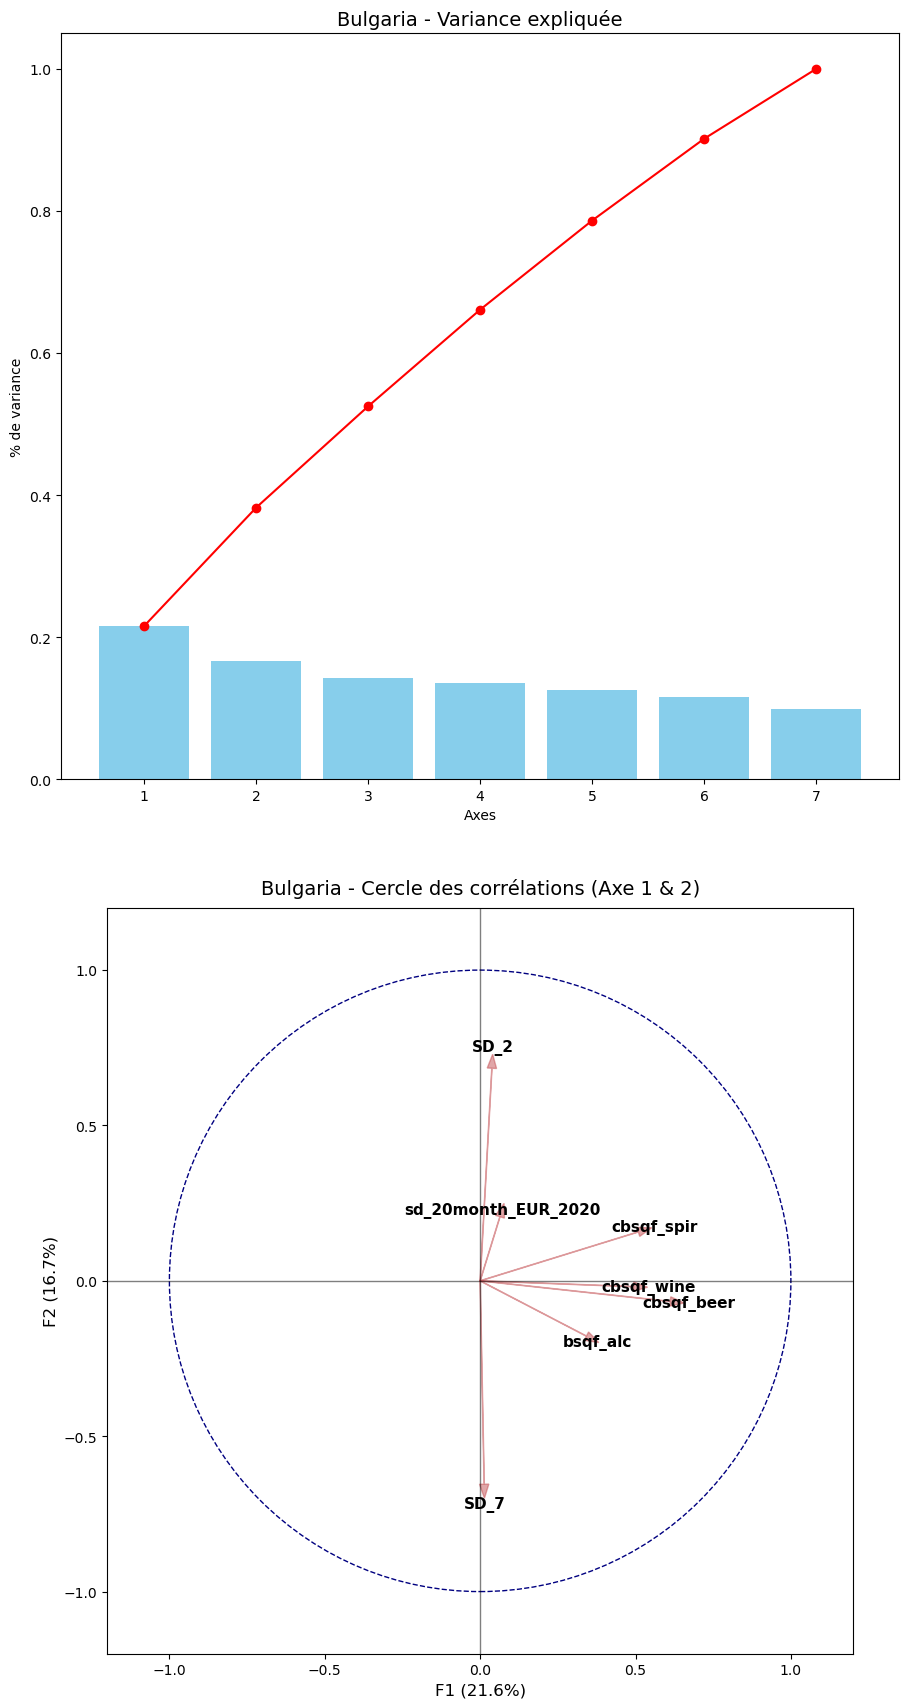

In [274]:
# On calcule l'ACP sur les quanti.colums/ variables quantitatives
pca_bg, feat_bg, cols_bg = dtn.calculer_acp_pays(data, "Bulgaria", quanti.columns)

# Et on trace
if pca_bg is not None:
    dtn.trace_cercle_et_variance(pca_bg, cols_bg, "Bulgaria")

In [275]:
print("matrice des corrélations ACP Pologne")
matrice_Pl = dtn.obtenir_matrice_pca(data, "Poland", quanti.columns)
matrice_Pl

matrice des corrélations ACP Pologne


SD_2      SD_7  sd_20month_EUR_2020  bsqf_alc  \
SD_2                 1.000642 -0.186116             0.011105 -0.007241   
SD_7                -0.186116  1.000642             0.111931  0.083747   
sd_20month_EUR_2020  0.011105  0.111931             1.000642  0.023920   
bsqf_alc            -0.007241  0.083747             0.023920  1.000642   
cbsqf_beer           0.013528  0.077937             0.046927  0.115154   
cbsqf_spir          -0.004672  0.081090             0.041686  0.194679   
cbsqf_wine          -0.048204  0.109368             0.044042  0.133516   

                     cbsqf_beer  cbsqf_spir  cbsqf_wine  
SD_2                   0.013528   -0.004672   -0.048204  
SD_7                   0.077937    0.081090    0.109368  
sd_20month_EUR_2020    0.046927    0.041686    0.044042  
bsqf_alc               0.115154    0.194679    0.133516  
cbsqf_beer             1.000642    0.414116    0.449896  
cbsqf_spir             0.414116    1.000642    0.430644  
cbsqf_wine             0.449896    0.430644    1.000642

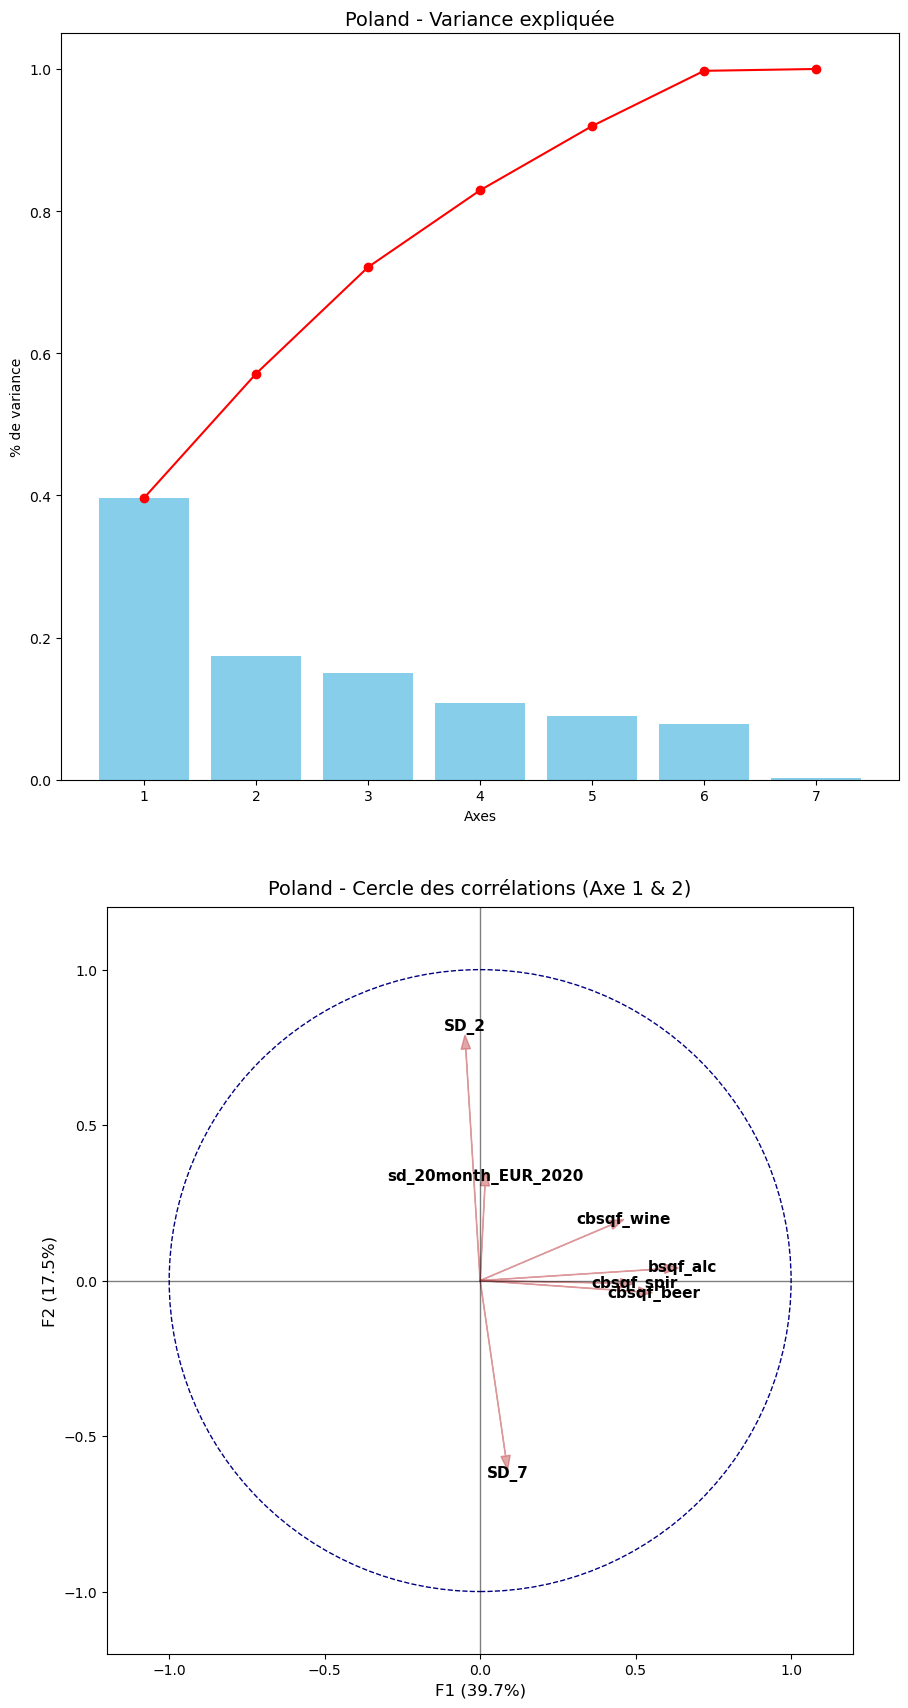

In [276]:
# On calcule l'ACP sur les quanti.colums/ variables quantitatives
pca_pl, feat_pl, cols_pl = dtn.calculer_acp_pays(data, "Poland", quanti.columns)

# Et on trace
if pca_fr is not None:
    dtn.trace_cercle_et_variance(pca_fr, cols_fr, "Poland")

In [ ]:
print("matrice des corrélations ACP Islande")
matrice_Ic = dtn.obtenir_matrice_pca(data, "Iceland", quanti.columns)
matrice_Ic

matrice des corrélations ACP Islande


SD_2      SD_7  sd_20month  bsqf_alc  cbsqf_beer  cbsqf_spir  \
SD_2        1.000693 -0.052848    0.040516 -0.017617   -0.043122   -0.034362   
SD_7       -0.052848  1.000693   -0.004408 -0.004546   -0.020647    0.017748   
sd_20month  0.040516 -0.004408    1.000693 -0.132353   -0.144057   -0.058605   
bsqf_alc   -0.017617 -0.004546   -0.132353  1.000693    0.783077    0.589530   
cbsqf_beer -0.043122 -0.020647   -0.144057  0.783077    1.000693    0.241610   
cbsqf_spir -0.034362  0.017748   -0.058605  0.589530    0.241610    1.000693   
cbsqf_wine  0.056520  0.008003   -0.065214  0.546695    0.122356    0.099296   

            cbsqf_wine  
SD_2          0.056520  
SD_7          0.008003  
sd_20month   -0.065214  
bsqf_alc      0.546695  
cbsqf_beer    0.122356  
cbsqf_spir    0.099296  
cbsqf_wine    1.000693

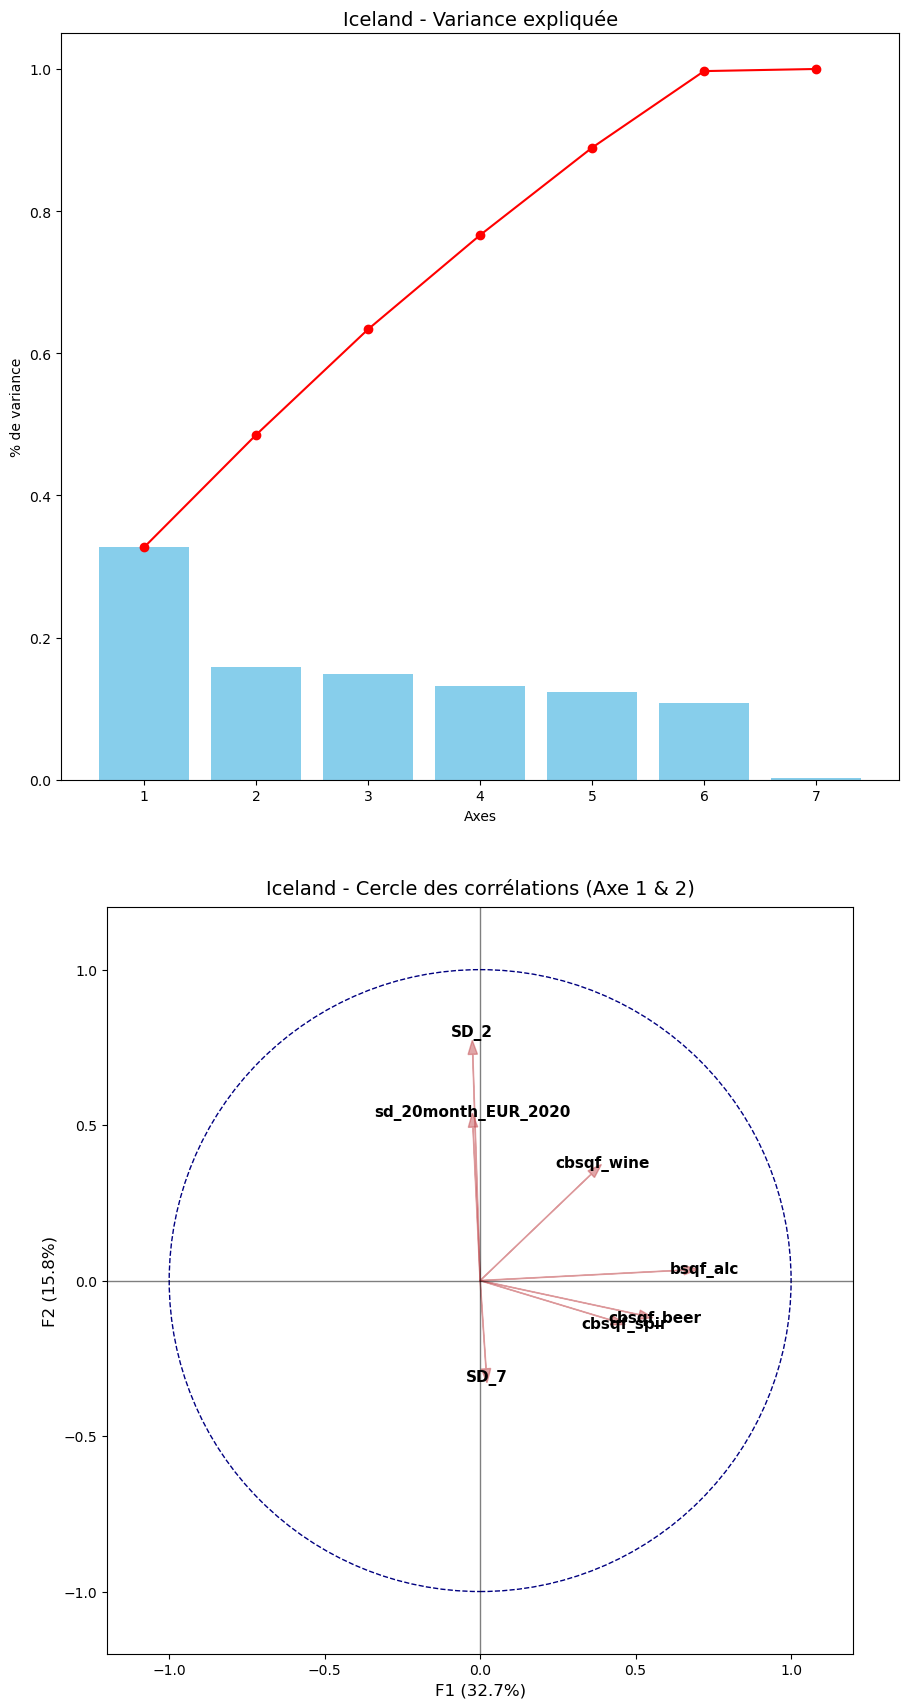

In [277]:
# On calcule l'ACP sur les quanti.colums/ variables quantitatives
pca_ic, feat_ic, cols_ic = dtn.calculer_acp_pays(data, "Iceland", quanti.columns)

# Et on trace
if pca_ic is not None:
    dtn.trace_cercle_et_variance(pca_ic, cols_ic, "Iceland")